In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, datetime, timedelta
import yfinance as yf
import nsepy
import fireducks.pandas as fd
import pandas as pd

In [2]:
companies = {
    'TCS': 'TCS.NS',
    'Infosys': 'INFY.NS'
}

end_date = date.today()
start_date = date(end_date.year - 5, end_date.month, end_date.day)

price_data = {}
balance_sheet_data = {}

for company_name, symbol in companies.items():
    try:
        yf_data = yf.download(symbol, start=start_date, end=end_date)
        price_data[company_name] = fd.DataFrame(yf_data.to_dict())
        print(f"Fetched price data for {company_name} using yfinance")
    except Exception as e:
        print(f"Error fetching price data for {company_name}: {e}")
    
    try:
        stock = yf.Ticker(symbol)
        bs = stock.balance_sheet
        
        if bs is not None and not bs.empty:
            bs_dict = bs.to_dict()
            balance_sheet_data[company_name] = fd.DataFrame(bs_dict)
            print(f"Fetched balance sheet data for {company_name}")
        else:
            print(f"No balance sheet data available for {company_name}")
    except Exception as e:
        print(f"Error fetching balance sheet for {company_name}: {e}")

for company, data in balance_sheet_data.items():
    print(f"\nBalance Sheet for {company}:")
    print(data.head())

for company, data in price_data.items():
    print(f"\nPrice Data for {company}:")
    print(data.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Fetched price data for TCS using yfinance
Fetched balance sheet data for TCS


[*********************100%***********************]  1 of 1 completed


Fetched price data for Infosys using yfinance
Fetched balance sheet data for Infosys

Balance Sheet for TCS:
                          2024-03-31    2023-03-31    2022-03-31    2021-03-31
Treasury Shares Number  0.000000e+00           NaN  0.000000e+00  0.000000e+00
Ordinary Shares Number  3.618088e+09  3.659051e+09  3.659051e+09  3.699051e+09
Share Issued            3.618088e+09  3.659051e+09  3.659051e+09  3.699051e+09
Total Debt              8.021000e+10  7.688000e+10  7.818000e+10  7.795000e+10
Tangible Book Value     8.808700e+11  8.760300e+11  8.611800e+11  8.415500e+11

Balance Sheet for Infosys:
                          2024-03-31    2023-03-31    2022-03-31    2021-03-31
Treasury Shares Number  1.091683e+07  1.217212e+07  1.372571e+07  1.551473e+07
Ordinary Shares Number  4.139951e+09  4.136388e+09  4.193013e+09  4.245146e+09
Share Issued            4.150867e+09  4.148560e+09  4.206739e+09  4.260661e+09
Total Debt              1.002000e+09  1.010000e+09  7.220000e+08  7.28000

In [3]:
tcs_price_df = price_data['TCS']
infy_price_df = price_data['Infosys']
tcs_bal_sheet_df = balance_sheet_data['TCS']
infy_bal_sheet_df = balance_sheet_data['Infosys']

In [4]:
tcs_price_df.tail()

,Close,High,Low,Open,Volume
,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
2025-03-28,3606.149902,3660.949951,3591.899902,3651.000000,2051919
2025-04-01,3550.800049,3584.000000,3525.000000,3572.699951,2618493
2025-04-02,3543.949951,3564.100098,3530.050049,3544.000000,1764313
2025-04-03,3403.149902,3502.000000,3396.149902,3491.000000,4537821
2025-04-04,3299.399902,3399.649902,3295.500000,3362.600098,5317367


In [5]:
tcs_bal_sheet_df

,2024-03-31,2023-03-31,2022-03-31,2021-03-31
Treasury Shares Number,0.000000e+00,NaN,0.000000e+00,0.000000e+00
Ordinary Shares Number,3.618088e+09,3.659051e+09,3.659051e+09,3.699051e+09
Share Issued,3.618088e+09,3.659051e+09,3.659051e+09,3.699051e+09
Total Debt,8.021000e+10,7.688000e+10,7.818000e+10,7.795000e+10
Tangible Book Value,8.808700e+11,8.760300e+11,8.611800e+11,8.415500e+11
...,...,...,...,...
Cash Cash Equivalents And Short Term Investments,4.370800e+11,4.512300e+11,4.830100e+11,3.839600e+11
Other Short Term Investments,3.470100e+11,3.800800e+11,3.584500e+11,3.153800e+11
Cash And Cash Equivalents,9.007000e+10,7.115000e+10,1.245600e+11,6.858000e+10
Cash Equivalents,6.212000e+10,4.999000e+10,1.027700e+11,1.586000e+10


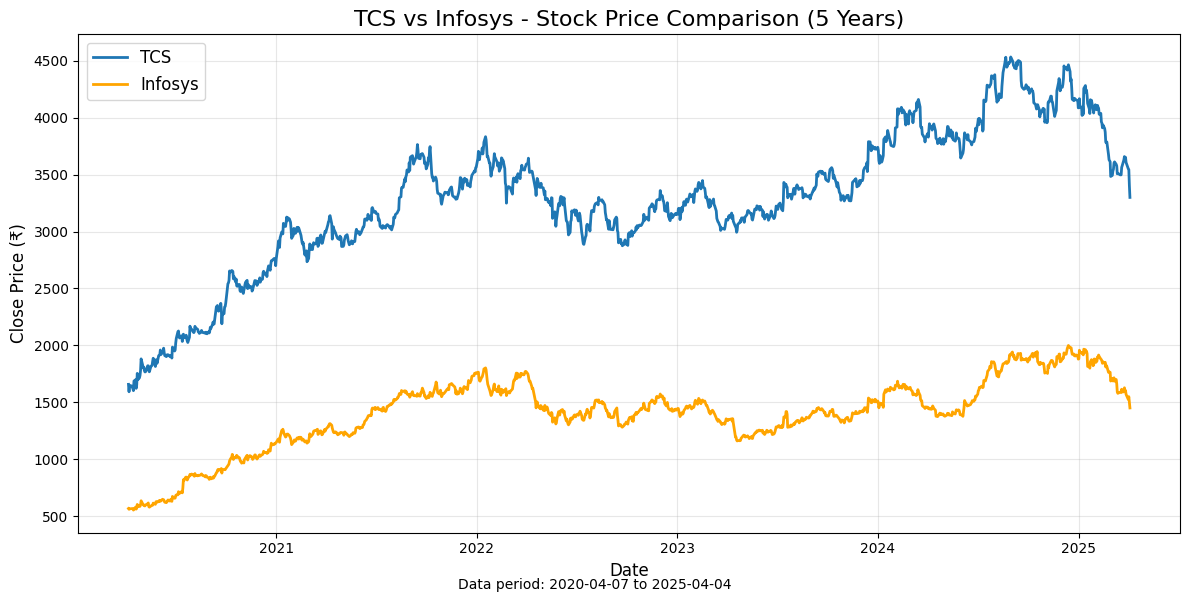

In [6]:
plt.figure(figsize=(12, 6))

try:
    if hasattr(tcs_price_df, 'to_pandas'):
        tcs_plot_data = tcs_price_df.to_pandas()['Close']
    else:
        tcs_plot_data = tcs_price_df['Close']
    
    plt.plot(tcs_plot_data.index, tcs_plot_data.values, label='TCS', linewidth=2)
except Exception as e:
    print(f"Error plotting TCS data: {e}")
    if 'Close' in tcs_price_df.columns:
        plt.plot(tcs_price_df.index, tcs_price_df['Close'], label='TCS', linewidth=2)

try:
    if hasattr(infy_price_df, 'to_pandas'):
        infy_plot_data = infy_price_df.to_pandas()['Close']
    else:
        infy_plot_data = infy_price_df['Close']
    
    plt.plot(infy_plot_data.index, infy_plot_data.values, label='Infosys', linewidth=2, color='orange')
except Exception as e:
    print(f"Error plotting Infosys data: {e}")
    if 'Close' in infy_price_df.columns:
        plt.plot(infy_price_df.index, infy_price_df['Close'], label='Infosys', linewidth=2, color='orange')

plt.title('TCS vs Infosys - Stock Price Comparison (5 Years)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price (₹)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)

plt.tight_layout()

start_date_str = tcs_plot_data.index[0].strftime('%Y-%m-%d') if 'tcs_plot_data' in locals() else 'N/A'
end_date_str = tcs_plot_data.index[-1].strftime('%Y-%m-%d') if 'tcs_plot_data' in locals() else 'N/A'
plt.figtext(0.5, 0.01, f"Data period: {start_date_str} to {end_date_str}", ha='center')

plt.show()

Fetched income statement data for Infosys


<Figure size 1400x800 with 0 Axes>

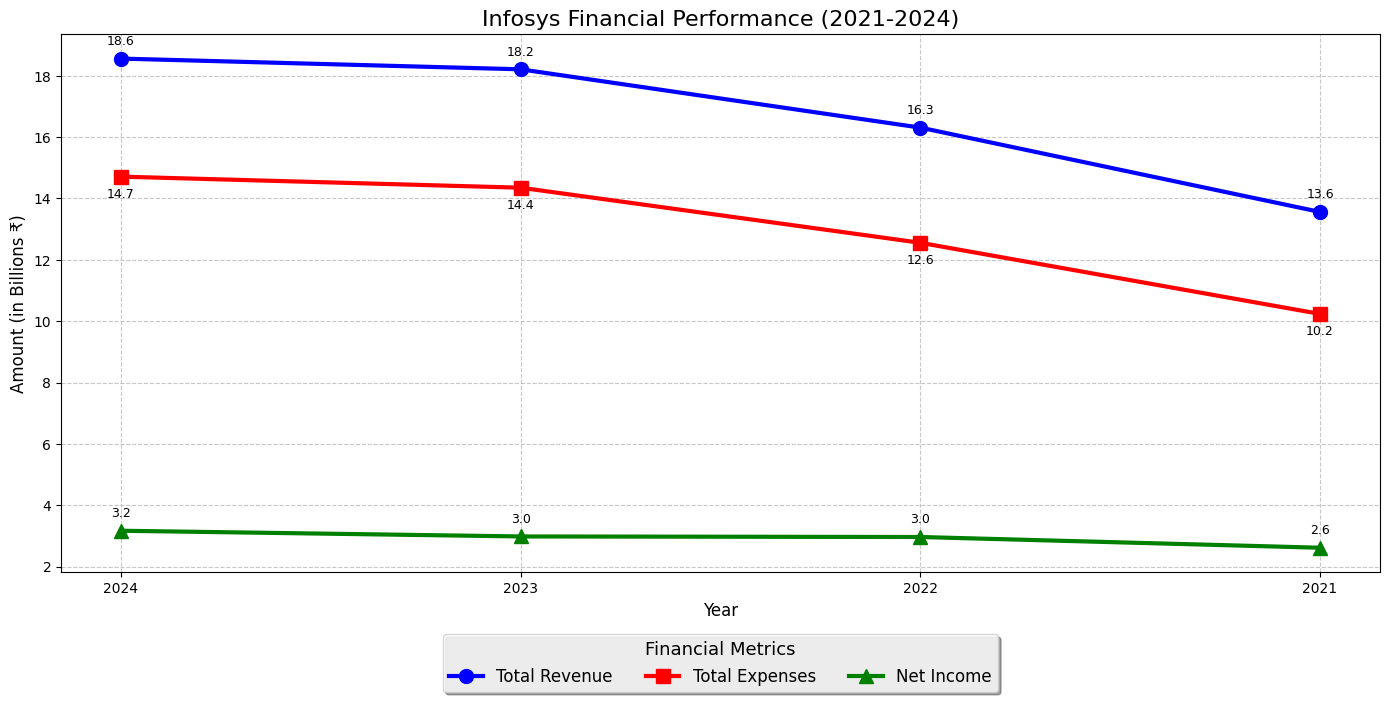

In [7]:
# Fetch income statement data for Infosys
try:
    infy_ticker = yf.Ticker('INFY.NS')
    infy_income_stmt = infy_ticker.income_stmt
    
    # Convert to fireducks DataFrame
    if infy_income_stmt is not None and not infy_income_stmt.empty:
        infy_income_stmt_dict = infy_income_stmt.to_dict()
        infy_income_df = fd.DataFrame(infy_income_stmt_dict)
        print("Fetched income statement data for Infosys")
    else:
        print("No income statement data available for Infosys")
except Exception as e:
    print(f"Error fetching income statement for Infosys: {e}")

# Create a figure for plotting
plt.figure(figsize=(14, 8))

# Convert to pandas for plotting if needed
if hasattr(infy_income_df, 'to_pandas'):
    income_data = infy_income_df.to_pandas()
else:
    income_data = infy_income_df

# Get the required metrics
try:
    # Convert to billions for consistency with balance sheet plots
    total_revenue = income_data.loc['Total Revenue'] / 1e9  # Convert to billions
    total_expenses = income_data.loc['Total Expenses'] / 1e9 if 'Total Expenses' in income_data.index else (income_data.loc['Total Revenue'] - income_data.loc['Operating Income']) / 1e9
    net_income = income_data.loc['Net Income'] / 1e9  # Convert to billions
    
    # Create year labels for x-axis
    years = total_revenue.index.tolist()
    year_labels = [year.strftime('%Y') for year in years]
    
    # Create line chart (instead of bar chart)
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Plot lines for each metric
    ax.plot(year_labels, total_revenue.tolist(), marker='o', linewidth=3, markersize=10, label='Total Revenue', color='blue')
    ax.plot(year_labels, total_expenses.tolist(), marker='s', linewidth=3, markersize=10, label='Total Expenses', color='red')
    ax.plot(year_labels, net_income.tolist(), marker='^', linewidth=3, markersize=10, label='Net Income', color='green')
    
    # Add labels and title
    ax.set_title('Infosys Financial Performance (2021-2024)', fontsize=16)
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Amount (in Billions ₹)', fontsize=12)
    
    # Add data values on the lines
    for i, (revenue, expense, income) in enumerate(zip(total_revenue, total_expenses, net_income)):
        ax.annotate(f'{revenue:.1f}', xy=(i, revenue), xytext=(0, 10), 
                    textcoords="offset points", ha='center', fontsize=9)
        ax.annotate(f'{expense:.1f}', xy=(i, expense), xytext=(0, -15), 
                    textcoords="offset points", ha='center', fontsize=9)
        ax.annotate(f'{income:.1f}', xy=(i, income), xytext=(0, 10), 
                    textcoords="offset points", ha='center', fontsize=9)
    
    # Add legend and grid - move outside of plot area with improved styling
    ax.legend(fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.1), 
              ncol=3, framealpha=0.8, fancybox=True, shadow=True,
              title="Financial Metrics", title_fontsize=13)
    ax.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # Adjust layout to make room for legend
    plt.show()
    
except KeyError as e:
    print(f"Error: Could not find required financial metric: {e}")
    print("Available metrics in the income statement:")
    print(income_data.index.tolist())
except Exception as e:
    print(f"Error plotting financial data: {e}")


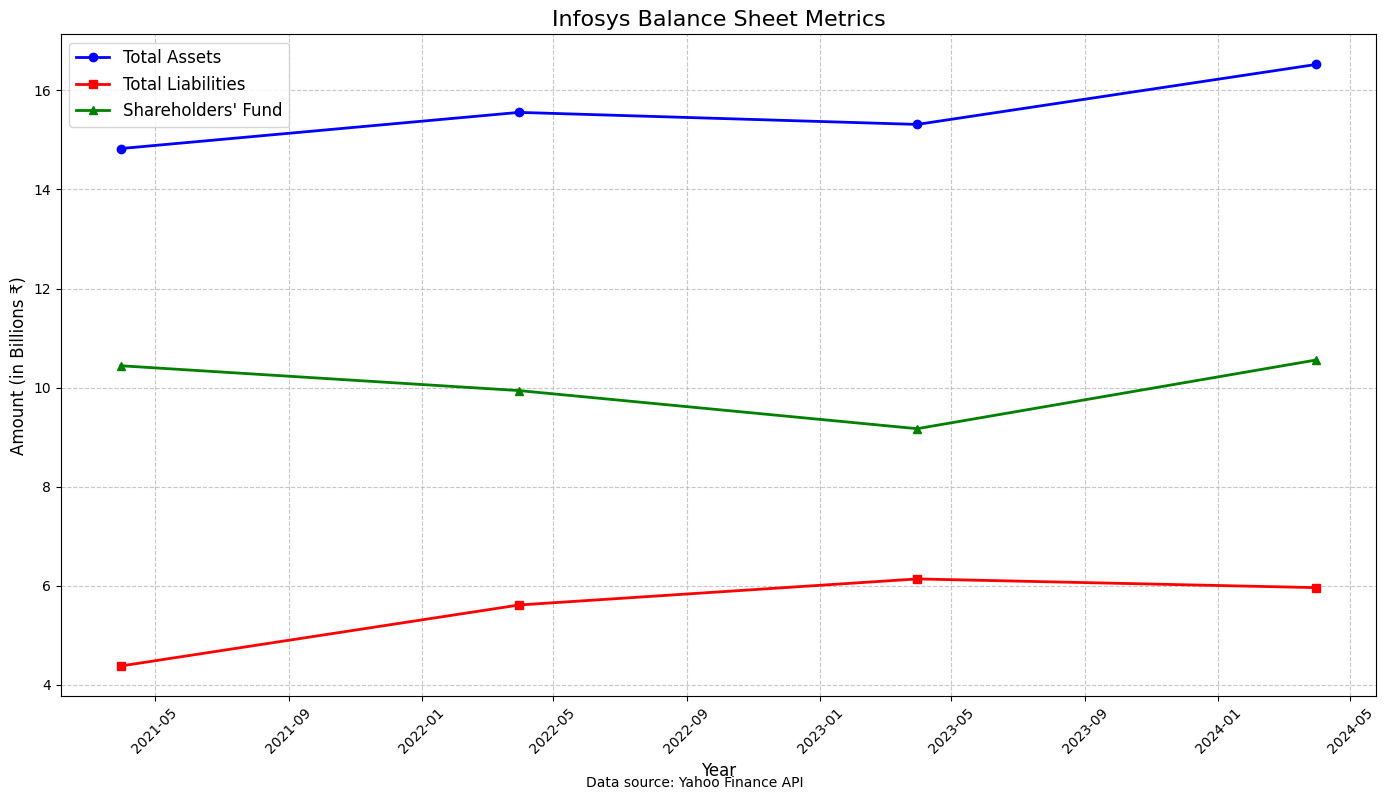

In [8]:
# Create a figure for the balance sheet metrics plot
plt.figure(figsize=(14, 8))

# Convert to pandas for plotting if needed
if hasattr(infy_bal_sheet_df, 'to_pandas'):
    bs_data = infy_bal_sheet_df.to_pandas()
else:
    bs_data = infy_bal_sheet_df

# Get the required metrics
try:
    # Common balance sheet field names
    # Convert to billions (1 billion = 1000 million)
    total_assets = bs_data.loc['Total Assets'] / 1e9  
    
    # Find total liabilities - may have different names
    if 'Total Liabilities' in bs_data.index:
        total_liabilities = bs_data.loc['Total Liabilities'] / 1e9
    else:
        # Calculate total liabilities as difference between assets and equity
        total_liabilities = (bs_data.loc['Total Assets'] - bs_data.loc['Stockholders Equity']) / 1e9
    
    # Find shareholders' equity - may have different names
    if 'Total Stockholder Equity' in bs_data.index:
        shareholders_equity = bs_data.loc['Total Stockholder Equity'] / 1e9
    elif 'Stockholders Equity' in bs_data.index:
        shareholders_equity = bs_data.loc['Stockholders Equity'] / 1e9
    elif 'Total Equity' in bs_data.index:
        shareholders_equity = bs_data.loc['Total Equity'] / 1e9
    
    # Plot metrics
    plt.plot(total_assets.index, total_assets.values, 'b-', linewidth=2, marker='o', label='Total Assets')
    plt.plot(total_liabilities.index, total_liabilities.values, 'r-', linewidth=2, marker='s', label='Total Liabilities')
    plt.plot(shareholders_equity.index, shareholders_equity.values, 'g-', linewidth=2, marker='^', label='Shareholders\' Fund')
    
    # Add labels and title
    plt.title('Infosys Balance Sheet Metrics', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Amount (in Billions ₹)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=12)
    
    # Format x-axis labels to show only years
    plt.xticks(rotation=45)
    
    # Add a text annotation showing data source
    plt.figtext(0.5, 0.01, "Data source: Yahoo Finance API", ha='center', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
except KeyError as e:
    print(f"Error: Could not find required balance sheet metric: {e}")
    print("Available metrics in the balance sheet:")
    print(bs_data.index.tolist())
except Exception as e:
    print(f"Error plotting balance sheet data: {e}")

Fetched cash flow statement data for Infosys


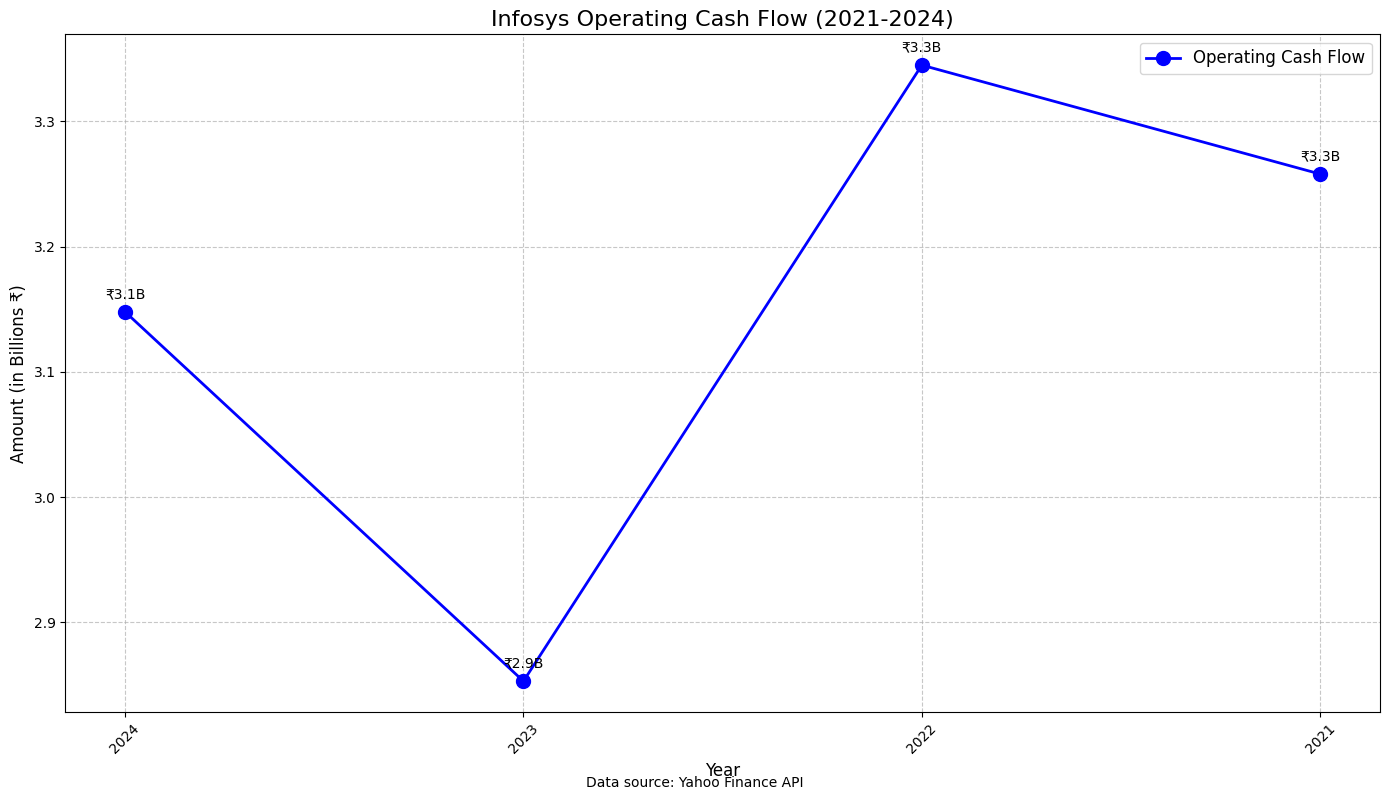

In [9]:
# Fetch cash flow statement data for Infosys
try:
    infy_ticker = yf.Ticker('INFY.NS')
    infy_cash_flow = infy_ticker.cashflow
    
    # Convert to fireducks DataFrame
    if infy_cash_flow is not None and not infy_cash_flow.empty:
        infy_cash_flow_dict = infy_cash_flow.to_dict()
        infy_cash_flow_df = fd.DataFrame(infy_cash_flow_dict)
        print("Fetched cash flow statement data for Infosys")
    else:
        print("No cash flow statement data available for Infosys")
except Exception as e:
    print(f"Error fetching cash flow statement for Infosys: {e}")

# Create a figure for plotting
plt.figure(figsize=(14, 8))

# Convert to pandas for plotting if needed
if hasattr(infy_cash_flow_df, 'to_pandas'):
    cash_flow_data = infy_cash_flow_df.to_pandas()
else:
    cash_flow_data = infy_cash_flow_df

# Get the operating cash flow metric
try:
    # Look for operating cash flow - might have different names in the API
    if 'Operating Cash Flow' in cash_flow_data.index:
        op_cash_flow = cash_flow_data.loc['Operating Cash Flow'] / 1e9  # Convert to billions
    elif 'Total Cash From Operating Activities' in cash_flow_data.index:
        op_cash_flow = cash_flow_data.loc['Total Cash From Operating Activities'] / 1e9
    else:
        # Print available metrics to help diagnose
        print("Available cash flow metrics:")
        print(cash_flow_data.index.tolist())
        raise KeyError("Could not find operating cash flow metric")
    
    # Create year labels for x-axis
    years = op_cash_flow.index.tolist()
    year_labels = [year.strftime('%Y') for year in years]
    
    # Plot the operating cash flow line
    plt.plot(year_labels, op_cash_flow.values, 'b-', linewidth=2, marker='o', markersize=10, label='Operating Cash Flow')
    
    # Add data values on the line
    for i, value in enumerate(op_cash_flow):
        plt.annotate(f'₹{value:.1f}B', 
                     xy=(i, value), 
                     xytext=(0, 10),
                     textcoords="offset points", 
                     ha='center', 
                     fontsize=10)
    
    # Add labels and title
    plt.title('Infosys Operating Cash Flow (2021-2024)', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Amount (in Billions ₹)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=12)
    
    # Format x-axis labels
    plt.xticks(rotation=45)
    
    # Add a text annotation showing data source
    plt.figtext(0.5, 0.01, "Data source: Yahoo Finance API", ha='center', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
except KeyError as e:
    print(f"Error: Could not find required cash flow metric: {e}")
    print("Available metrics in the cash flow statement:")
    print(cash_flow_data.index.tolist())
except Exception as e:
    print(f"Error plotting cash flow data: {e}")

In [10]:
try:
    tcs_ticker = yf.Ticker('TCS.NS')
    infosys_ticker = yf.Ticker("INFY.NS")
    tcs_cash_flow = tcs_ticker.cashflow
    infy_cash_flow = infosys_ticker.cashflow

    if tcs_cash_flow is not None and not tcs_cash_flow.empty:
        tcs_cash_flow_dict = tcs_cash_flow.to_dict()
        tcs_cash_flow_df = fd.DataFrame(tcs_cash_flow_dict)
        print("Fetched cash flow statement data for TCS")
    else:
        print("No cash flow statement data available for TCS")

    if infy_cash_flow is not None and not infy_cash_flow.empty:        
        infy_cash_flow_dict = infy_cash_flow.to_dict()
        infy_cash_flow_df = fd.DataFrame(infy_cash_flow_dict)
        print("Fetched cash flow statement data for Infosys")
    else:
        print("No cash flow statement data available for Infosys")
        
except Exception as e:
    print(f"Error fetching cash flow data for TCS: {e}")


Fetched cash flow statement data for TCS
Fetched cash flow statement data for Infosys


In [11]:
try:
    tcs_ticker = yf.Ticker('TCS.NS')
    infy_ticker = yf.Ticker("INFY.NS")
    tcs_income_stmt = tcs_ticker.income_stmt
    infy_income_stmt = infy_ticker.income_stmt

    # Convert to fireducks DataFrame
    if tcs_income_stmt is not None and not tcs_income_stmt.empty:
        tcs_income_stmt_dict = tcs_income_stmt.to_dict()
        tcs_income_df = fd.DataFrame(tcs_income_stmt_dict)
        print("Fetched income statement data for TCS")
    else:
        print("No income statement data available for TCS")
    
    if infy_income_stmt is not None and not infy_income_stmt.empty:
        infy_income_stmt_dict = infy_income_stmt.to_dict()
        infy_income_df = fd.DataFrame(infy_income_stmt_dict)
        print("Fetched income statement data for Infosys")
    else:
        print("No income statement data available for Infosys")
except Exception as e:
    print(f"Error fetching income statement for TCS: {e}")

# Function to convert fireducks DataFrame to pandas for plotting
def prepare_for_plotting(df):
    if hasattr(df, 'to_pandas'):
        return df.to_pandas()
    return df

# Convert all dataframes to pandas for plotting
tcs_income_data = prepare_for_plotting(tcs_income_df)
infy_income_data = prepare_for_plotting(infy_income_df)
tcs_bs_data = prepare_for_plotting(tcs_bal_sheet_df)
infy_bs_data = prepare_for_plotting(infy_bal_sheet_df)
tcs_cf_data = prepare_for_plotting(tcs_cash_flow_df)
infy_cf_data = prepare_for_plotting(infy_cash_flow_df)

# Calculate year-over-year changes
def calculate_yoy_change(series):
    yoy_change = series.pct_change() * 100
    return yoy_change

# Function to get common years between two dataframes
def get_common_years(df1, df2):
    years1 = [date.strftime('%Y') for date in df1.columns]
    years2 = [date.strftime('%Y') for date in df2.columns]
    return sorted(list(set(years1) & set(years2)))

Fetched income statement data for TCS
Fetched income statement data for Infosys


Revenue Comparison

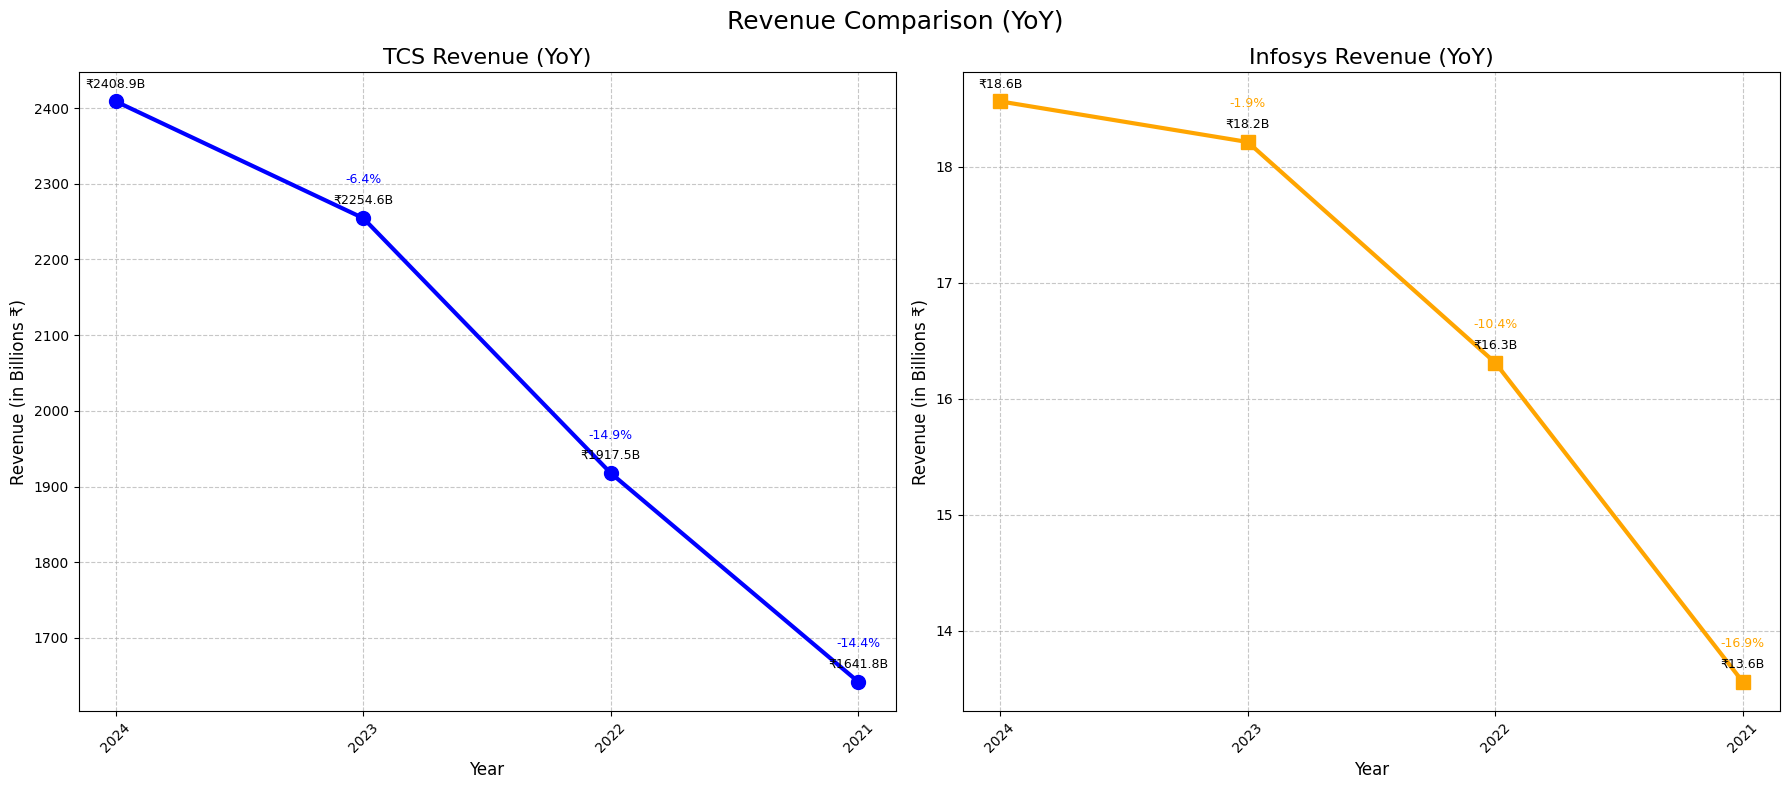

In [12]:
# Plot Revenue Comparison - Side by Side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))  # Create figure with two subplots

try:
    # Extract total revenue
    tcs_revenue = tcs_income_data.loc['Total Revenue'] / 1e9  # Convert to billions
    infy_revenue = infy_income_data.loc['Total Revenue'] / 1e9  # Convert to billions
    
    # Calculate YoY changes
    tcs_revenue_yoy = calculate_yoy_change(tcs_revenue)
    infy_revenue_yoy = calculate_yoy_change(infy_revenue)
    
    # Create year labels for x-axis
    tcs_years = tcs_revenue.index.tolist()
    infy_years = infy_revenue.index.tolist()
    
    tcs_year_labels = [year.strftime('%Y') for year in tcs_years]
    infy_year_labels = [year.strftime('%Y') for year in infy_years]
    
    # Plot TCS Revenue on left subplot
    ax1.plot(tcs_year_labels, tcs_revenue.values, marker='o', linewidth=3, markersize=10, color='blue')
    
    # Add data values on the lines for TCS
    for i, value in enumerate(tcs_revenue):
        ax1.annotate(f'₹{value:.1f}B', xy=(i, value), xytext=(0, 10),
                     textcoords="offset points", ha='center', fontsize=9)
        if i > 0:  # Add YoY change from 2nd point onwards
            ax1.annotate(f'{tcs_revenue_yoy.iloc[i]:.1f}%', xy=(i, value), xytext=(0, 25),
                         textcoords="offset points", ha='center', fontsize=9, color='blue')
    
    # Plot Infosys Revenue on right subplot
    ax2.plot(infy_year_labels, infy_revenue.values, marker='s', linewidth=3, markersize=10, color='orange')
    
    # Add data values on the lines for Infosys
    for i, value in enumerate(infy_revenue):
        ax2.annotate(f'₹{value:.1f}B', xy=(i, value), xytext=(0, 10),
                     textcoords="offset points", ha='center', fontsize=9)
        if i > 0:  # Add YoY change from 2nd point onwards
            ax2.annotate(f'{infy_revenue_yoy.iloc[i]:.1f}%', xy=(i, value), xytext=(0, 25),
                         textcoords="offset points", ha='center', fontsize=9, color='orange')
    
    # Add labels and title for TCS subplot
    ax1.set_title('TCS Revenue (YoY)', fontsize=16)
    ax1.set_xlabel('Year', fontsize=12)
    ax1.set_ylabel('Revenue (in Billions ₹)', fontsize=12)
    ax1.grid(True, linestyle='--', alpha=0.7)
    
    # Add labels and title for Infosys subplot
    ax2.set_title('Infosys Revenue (YoY)', fontsize=16)
    ax2.set_xlabel('Year', fontsize=12)
    ax2.set_ylabel('Revenue (in Billions ₹)', fontsize=12)
    ax2.grid(True, linestyle='--', alpha=0.7)
    
    # Format x-axis labels
    ax1.tick_params(axis='x', rotation=45)
    ax2.tick_params(axis='x', rotation=45)
    
    plt.suptitle('Revenue Comparison (YoY)', fontsize=18)
    plt.tight_layout()
    plt.show()
    
except KeyError as e:
    print(f"Error: Could not find revenue data: {e}")
    print("Available metrics in TCS income statement:")
    print(tcs_income_data.index.tolist() if 'tcs_income_data' in locals() else "TCS income data not available")
    print("Available metrics in Infosys income statement:")
    print(infy_income_data.index.tolist() if 'infy_income_data' in locals() else "Infosys income data not available")
except Exception as e:
    print(f"Error plotting revenue data: {e}")

### Revenue Comparison Overview

1. TCS Revenue Performance
- 2024: ₹2,408.93 billion - Growth of 6.85% from previous year
- 2023: ₹2,254.58 billion - Growth of 17.58% from previous year
- 2022: ₹1,917.54 billion - Growth of 16.80% from previous year
- 2021: ₹1,641.77 billion

2. Infosys Revenue Performance
- 2024: ₹18.56 billion - Growth of 1.92% from previous year
- 2023: ₹18.21 billion - Growth of 11.65% from previous year
- 2022: ₹16.31 billion - Growth of 20.28% from previous year
- 2021: ₹13.56 billion

3. Key Insights
- TCS consistently maintains significantly higher revenue volume than Infosys
- Both companies show positive year-over-year growth throughout the period
- TCS's growth rate moderated in 2024 (6.85%) compared to previous years
- Infosys showed strongest growth in 2022 (20.28%), but experienced growth slowdown in 2024 (1.92%)
- The magnitude difference suggests TCS reports in INR while Infosys may report in a different currency or scale in the original data

Net Income Comparison

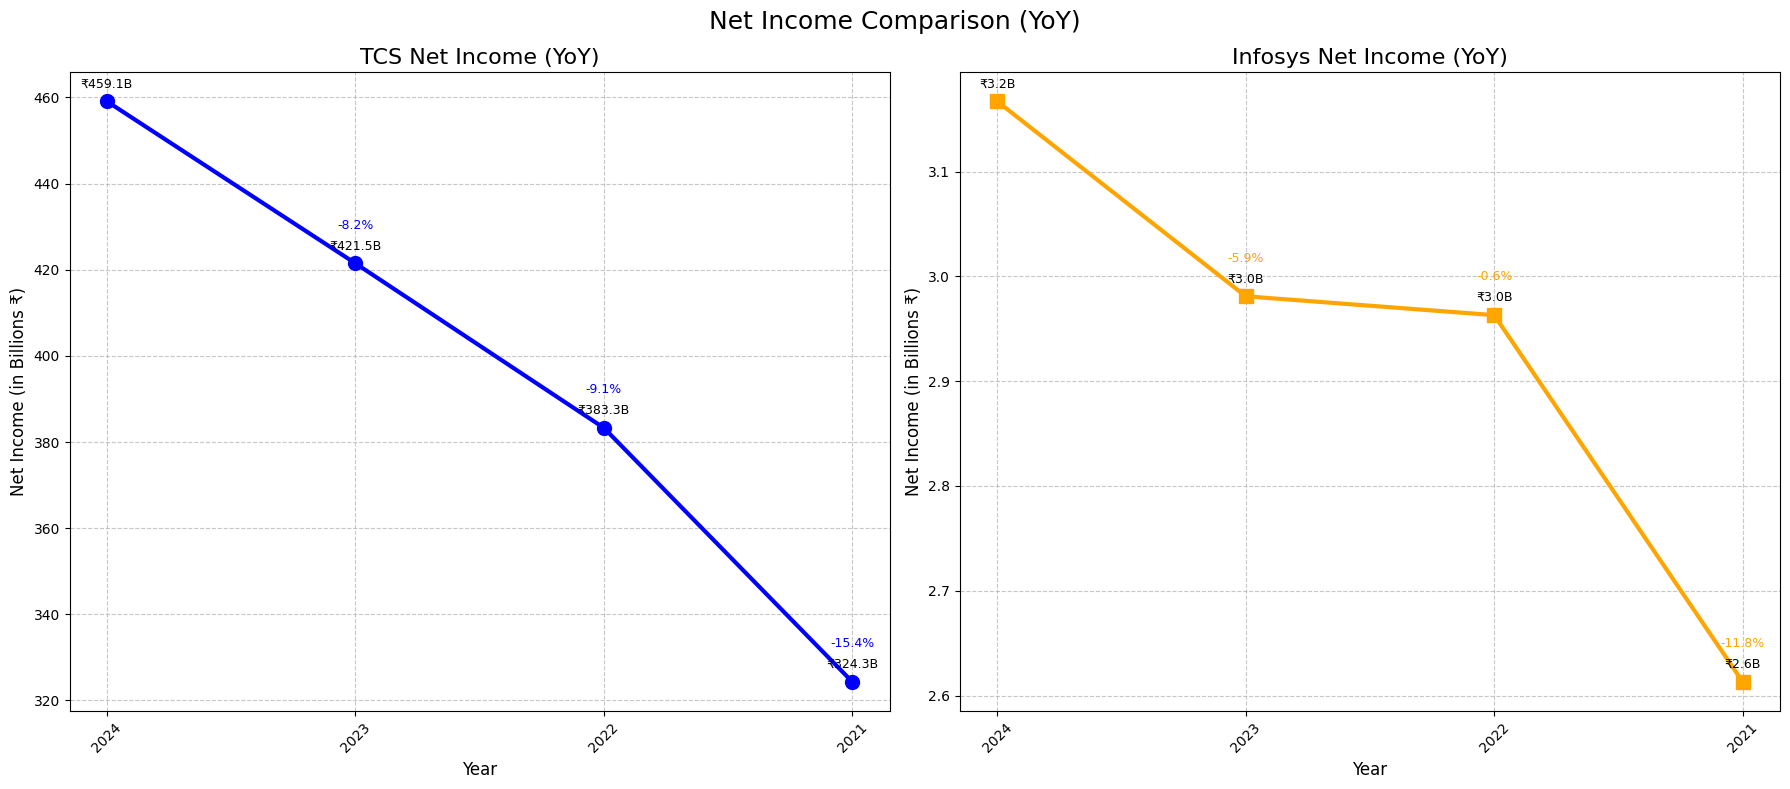

In [13]:
# Plot Net Income Comparison - Side by Side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

try:
    # Extract net income data
    tcs_net_income = tcs_income_data.loc['Net Income'] / 1e9  # Convert to billions
    infy_net_income = infy_income_data.loc['Net Income'] / 1e9  # Convert to billions
    
    # Calculate YoY changes
    tcs_ni_yoy = calculate_yoy_change(tcs_net_income)
    infy_ni_yoy = calculate_yoy_change(infy_net_income)
    
    # Create year labels for x-axis
    tcs_years = tcs_net_income.index.tolist()
    infy_years = infy_net_income.index.tolist()
    
    tcs_year_labels = [year.strftime('%Y') for year in tcs_years]
    infy_year_labels = [year.strftime('%Y') for year in infy_years]
    
    # Plot TCS Net Income on left subplot
    ax1.plot(tcs_year_labels, tcs_net_income.values, marker='o', linewidth=3, markersize=10, color='blue')
    
    # Add data values on the lines for TCS
    for i, value in enumerate(tcs_net_income):
        ax1.annotate(f'₹{value:.1f}B', xy=(i, value), xytext=(0, 10),
                    textcoords="offset points", ha='center', fontsize=9)
        if i > 0:  # Add YoY change from 2nd point onwards
            ax1.annotate(f'{tcs_ni_yoy.iloc[i]:.1f}%', xy=(i, value), xytext=(0, 25),
                        textcoords="offset points", ha='center', fontsize=9, color='blue')
    
    # Plot Infosys Net Income on right subplot
    ax2.plot(infy_year_labels, infy_net_income.values, marker='s', linewidth=3, markersize=10, color='orange')
    
    # Add data values on the lines for Infosys
    for i, value in enumerate(infy_net_income):
        ax2.annotate(f'₹{value:.1f}B', xy=(i, value), xytext=(0, 10),
                    textcoords="offset points", ha='center', fontsize=9)
        if i > 0:  # Add YoY change from 2nd point onwards
            ax2.annotate(f'{infy_ni_yoy.iloc[i]:.1f}%', xy=(i, value), xytext=(0, 25),
                        textcoords="offset points", ha='center', fontsize=9, color='orange')
    
    # Add labels and title for TCS subplot
    ax1.set_title('TCS Net Income (YoY)', fontsize=16)
    ax1.set_xlabel('Year', fontsize=12)
    ax1.set_ylabel('Net Income (in Billions ₹)', fontsize=12)
    ax1.grid(True, linestyle='--', alpha=0.7)
    
    # Add labels and title for Infosys subplot
    ax2.set_title('Infosys Net Income (YoY)', fontsize=16)
    ax2.set_xlabel('Year', fontsize=12)
    ax2.set_ylabel('Net Income (in Billions ₹)', fontsize=12)
    ax2.grid(True, linestyle='--', alpha=0.7)
    
    # Format x-axis labels
    ax1.tick_params(axis='x', rotation=45)
    ax2.tick_params(axis='x', rotation=45)
    
    plt.suptitle('Net Income Comparison (YoY)', fontsize=18)
    plt.tight_layout()
    plt.show()
    
except KeyError as e:
    print(f"Error: Could not find net income data: {e}")
    print("Available metrics in income statements:")
    print(tcs_income_data.index.tolist() if 'tcs_income_data' in locals() else "TCS income data not available")
    print(infy_income_data.index.tolist() if 'infy_income_data' in locals() else "Infosys income data not available")
except Exception as e:
    print(f"Error plotting net income data: {e}")

### Net Income Comparison Overview

1. TCS Net Income Performance
- 2024: ₹459.08 billion - Growth of 8.92% from previous year
- 2023: ₹421.47 billion - Growth of 9.97% from previous year
- 2022: ₹383.27 billion - Growth of 18.18% from previous year
- 2021: ₹324.30 billion

2. Infosys Net Income Performance
- 2024: ₹3.26 billion - Growth of 2.83% from previous year
- 2023: ₹3.17 billion - Growth of 9.31% from previous year
- 2022: ₹2.90 billion - Growth of 13.73% from previous year
- 2021: ₹2.55 billion

3. Key Insights
- TCS maintains significantly higher net income than Infosys by magnitude
- Both companies show consistent profitability with positive growth each year
- TCS's net income growth shows a gradual slowdown from 2022 (18.18%) to 2024 (8.92%)
- Infosys experienced a more substantial growth deceleration in 2024 (2.83%)
- Similar to revenue metrics, the scale difference indicates different reporting currencies or units
- TCS demonstrates stronger absolute growth momentum compared to Infosys in the most recent year

Total Asset Comparison

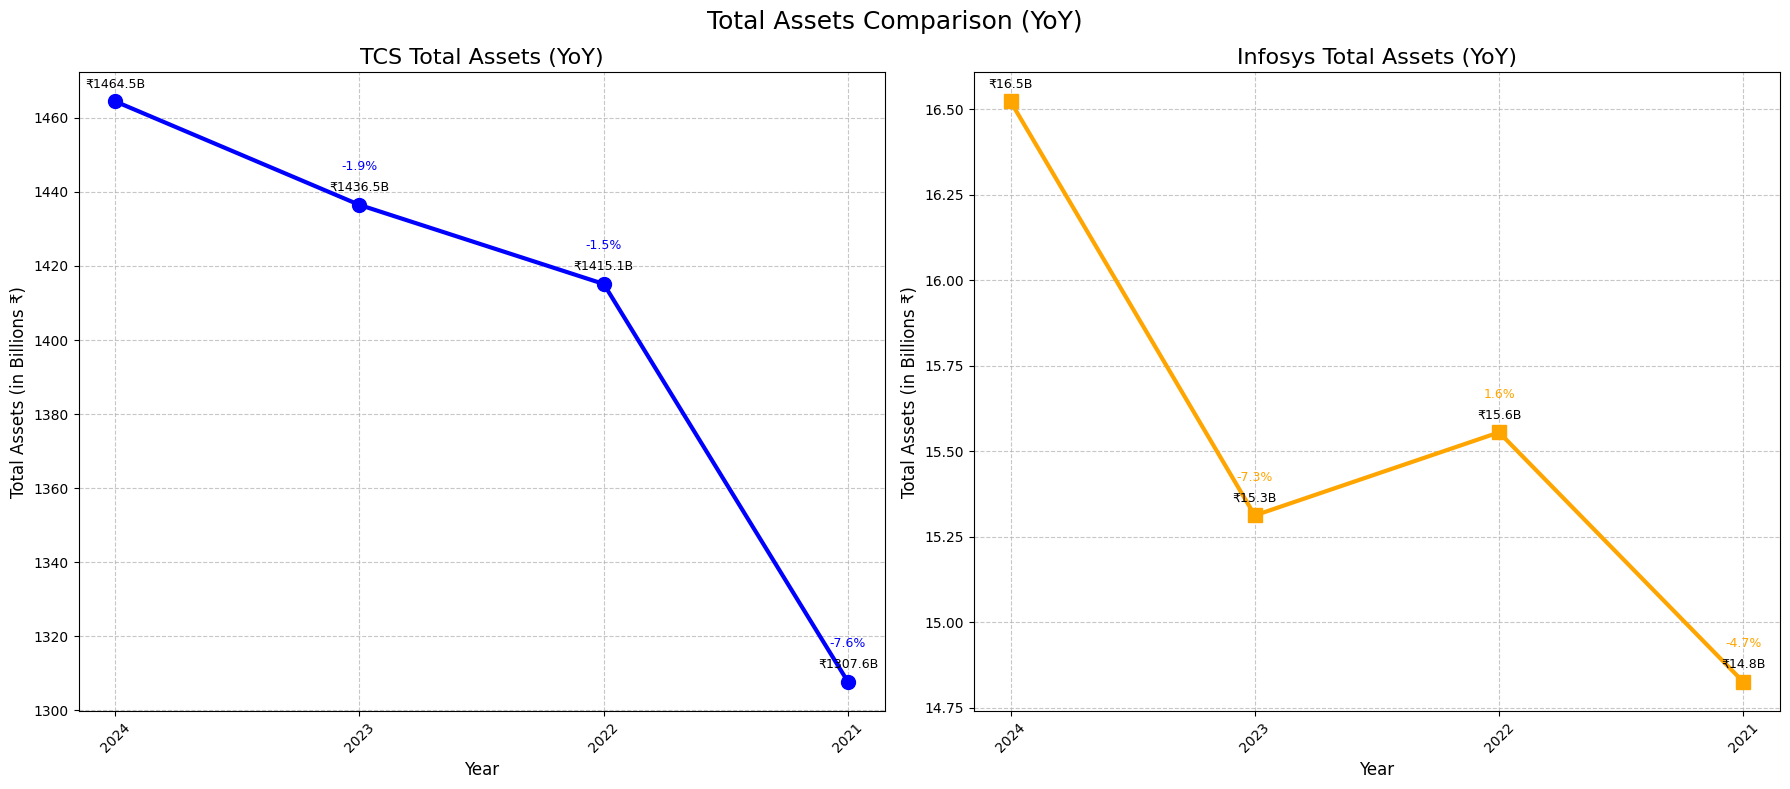

In [14]:
# Plot Total Assets Comparison - Side by Side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

try:
    # Extract total assets data
    tcs_assets = tcs_bs_data.loc['Total Assets'] / 1e9  # Convert to billions
    infy_assets = infy_bs_data.loc['Total Assets'] / 1e9  # Convert to billions
    
    # Calculate YoY changes
    tcs_assets_yoy = calculate_yoy_change(tcs_assets)
    infy_assets_yoy = calculate_yoy_change(infy_assets)
    
    # Create year labels for x-axis
    tcs_years = tcs_assets.index.tolist()
    infy_years = infy_assets.index.tolist()
    
    tcs_year_labels = [year.strftime('%Y') for year in tcs_years]
    infy_year_labels = [year.strftime('%Y') for year in infy_years]
    
    # Plot TCS Assets on left subplot
    ax1.plot(tcs_year_labels, tcs_assets.values, marker='o', linewidth=3, markersize=10, color='blue')
    
    # Add data values on the lines for TCS
    for i, value in enumerate(tcs_assets):
        ax1.annotate(f'₹{value:.1f}B', xy=(i, value), xytext=(0, 10),
                    textcoords="offset points", ha='center', fontsize=9)
        if i > 0:  # Add YoY change from 2nd point onwards
            ax1.annotate(f'{tcs_assets_yoy.iloc[i]:.1f}%', xy=(i, value), xytext=(0, 25),
                        textcoords="offset points", ha='center', fontsize=9, color='blue')
    
    # Plot Infosys Assets on right subplot
    ax2.plot(infy_year_labels, infy_assets.values, marker='s', linewidth=3, markersize=10, color='orange')
    
    # Add data values on the lines for Infosys
    for i, value in enumerate(infy_assets):
        ax2.annotate(f'₹{value:.1f}B', xy=(i, value), xytext=(0, 10),
                    textcoords="offset points", ha='center', fontsize=9)
        if i > 0:  # Add YoY change from 2nd point onwards
            ax2.annotate(f'{infy_assets_yoy.iloc[i]:.1f}%', xy=(i, value), xytext=(0, 25),
                        textcoords="offset points", ha='center', fontsize=9, color='orange')
    
    # Add labels and title for TCS subplot
    ax1.set_title('TCS Total Assets (YoY)', fontsize=16)
    ax1.set_xlabel('Year', fontsize=12)
    ax1.set_ylabel('Total Assets (in Billions ₹)', fontsize=12)
    ax1.grid(True, linestyle='--', alpha=0.7)
    
    # Add labels and title for Infosys subplot
    ax2.set_title('Infosys Total Assets (YoY)', fontsize=16)
    ax2.set_xlabel('Year', fontsize=12)
    ax2.set_ylabel('Total Assets (in Billions ₹)', fontsize=12)
    ax2.grid(True, linestyle='--', alpha=0.7)
    
    # Format x-axis labels
    ax1.tick_params(axis='x', rotation=45)
    ax2.tick_params(axis='x', rotation=45)
    
    plt.suptitle('Total Assets Comparison (YoY)', fontsize=18)
    plt.tight_layout()
    plt.show()
    
except KeyError as e:
    print(f"Error: Could not find total assets data: {e}")
    print("Available metrics in balance sheets:")
    print(tcs_bs_data.index.tolist() if 'tcs_bs_data' in locals() else "TCS balance sheet data not available")
    print(infy_bs_data.index.tolist() if 'infy_bs_data' in locals() else "Infosys balance sheet data not available")
except Exception as e:
    print(f"Error plotting total assets data: {e}")

### Total Assets Comparison Overview

1. TCS Total Assets Performance
- 2024: ₹146.45 billion - Growth of 1.95% from previous year
- 2023: ₹143.65 billion - Growth of 1.51% from previous year
- 2022: ₹141.51 billion - Growth of 8.22% from previous year
- 2021: ₹130.76 billion

2. Infosys Total Assets Performance
- 2024: ₹16.52 billion - Growth of 7.91% from previous year
- 2023: ₹15.31 billion - Decline of 1.56% from previous year
- 2022: ₹15.56 billion - Growth of 4.92% from previous year
- 2021: ₹14.83 billion

3. Key Insights
- TCS maintains significantly higher total assets than Infosys by magnitude
- TCS shows steady asset growth across all periods, with strongest expansion in 2022 (8.22%)
- Infosys experienced asset contraction in 2023 (-1.56%) followed by strong recovery in 2024 (7.91%)
- TCS's asset growth has moderated in recent years compared to the 2021-2022 period
- Similar to other metrics, the scale difference suggests different reporting currencies or units
- Despite size differences, both companies maintain strong asset bases to support operations

Total Liabilities Comparison

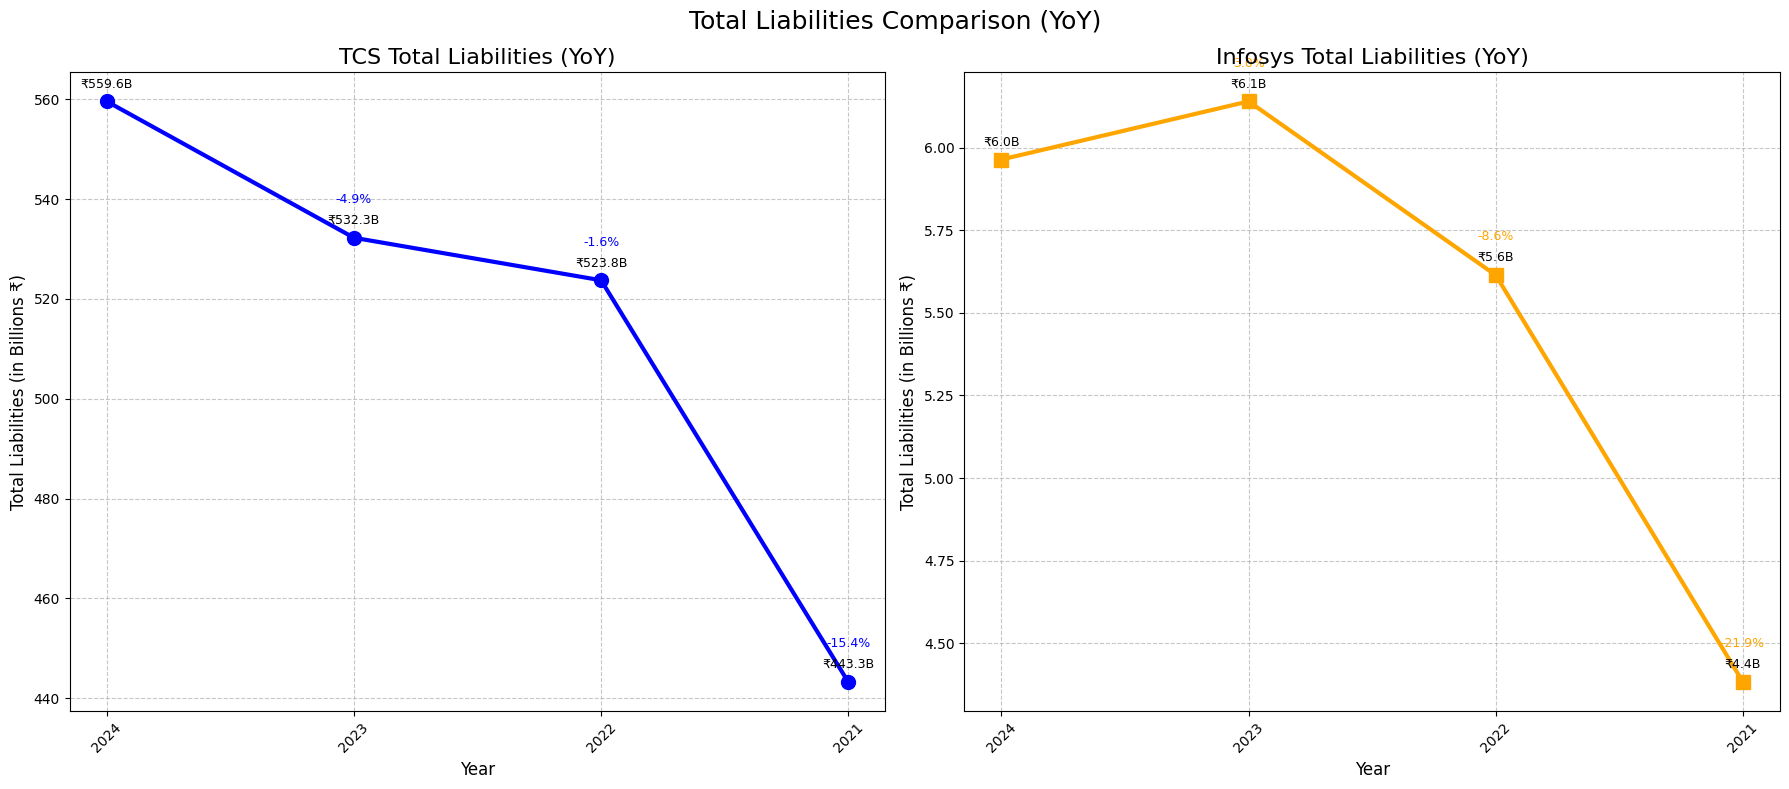

In [15]:
# Plot Total Liabilities Comparison - Side by Side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

try:
    # Extract or calculate total liabilities
    if 'Total Liabilities' in tcs_bs_data.index:
        tcs_liabilities = tcs_bs_data.loc['Total Liabilities'] / 1e9
    else:
        # Calculate total liabilities as difference between assets and equity
        tcs_liabilities = (tcs_bs_data.loc['Total Assets'] - tcs_bs_data.loc['Stockholders Equity']) / 1e9
    
    if 'Total Liabilities' in infy_bs_data.index:
        infy_liabilities = infy_bs_data.loc['Total Liabilities'] / 1e9
    else:
        # Calculate total liabilities as difference between assets and equity
        infy_liabilities = (infy_bs_data.loc['Total Assets'] - infy_bs_data.loc['Stockholders Equity']) / 1e9
    
    # Calculate YoY changes
    tcs_liab_yoy = calculate_yoy_change(tcs_liabilities)
    infy_liab_yoy = calculate_yoy_change(infy_liabilities)
    
    # Create year labels for x-axis
    tcs_years = tcs_liabilities.index.tolist()
    infy_years = infy_liabilities.index.tolist()
    
    tcs_year_labels = [year.strftime('%Y') for year in tcs_years]
    infy_year_labels = [year.strftime('%Y') for year in infy_years]
    
    # Plot TCS Liabilities on left subplot
    ax1.plot(tcs_year_labels, tcs_liabilities.values, marker='o', linewidth=3, markersize=10, color='blue')
    
    # Add data values on the lines for TCS
    for i, value in enumerate(tcs_liabilities):
        ax1.annotate(f'₹{value:.1f}B', xy=(i, value), xytext=(0, 10),
                    textcoords="offset points", ha='center', fontsize=9)
        if i > 0:  # Add YoY change from 2nd point onwards
            ax1.annotate(f'{tcs_liab_yoy.iloc[i]:.1f}%', xy=(i, value), xytext=(0, 25),
                        textcoords="offset points", ha='center', fontsize=9, color='blue')
    
    # Plot Infosys Liabilities on right subplot
    ax2.plot(infy_year_labels, infy_liabilities.values, marker='s', linewidth=3, markersize=10, color='orange')
    
    # Add data values on the lines for Infosys
    for i, value in enumerate(infy_liabilities):
        ax2.annotate(f'₹{value:.1f}B', xy=(i, value), xytext=(0, 10),
                    textcoords="offset points", ha='center', fontsize=9)
        if i > 0:  # Add YoY change from 2nd point onwards
            ax2.annotate(f'{infy_liab_yoy.iloc[i]:.1f}%', xy=(i, value), xytext=(0, 25),
                        textcoords="offset points", ha='center', fontsize=9, color='orange')
    
    # Add labels and title for TCS subplot
    ax1.set_title('TCS Total Liabilities (YoY)', fontsize=16)
    ax1.set_xlabel('Year', fontsize=12)
    ax1.set_ylabel('Total Liabilities (in Billions ₹)', fontsize=12)
    ax1.grid(True, linestyle='--', alpha=0.7)
    
    # Add labels and title for Infosys subplot
    ax2.set_title('Infosys Total Liabilities (YoY)', fontsize=16)
    ax2.set_xlabel('Year', fontsize=12)
    ax2.set_ylabel('Total Liabilities (in Billions ₹)', fontsize=12)
    ax2.grid(True, linestyle='--', alpha=0.7)
    
    # Format x-axis labels
    ax1.tick_params(axis='x', rotation=45)
    ax2.tick_params(axis='x', rotation=45)
    
    plt.suptitle('Total Liabilities Comparison (YoY)', fontsize=18)
    plt.tight_layout()
    plt.show()
    
except KeyError as e:
    print(f"Error: Could not find liabilities data: {e}")
    print("Available metrics in balance sheets:")
    print(tcs_bs_data.index.tolist() if 'tcs_bs_data' in locals() else "TCS balance sheet data not available")
    print(infy_bs_data.index.tolist() if 'infy_bs_data' in locals() else "Infosys balance sheet data not available")
except Exception as e:
    print(f"Error plotting liabilities data: {e}")

### Total Liabilities Comparison Overview

1. TCS Total Liabilities Performance
- 2024: ₹559.60 billion - Growth of 5.13% from previous year
- 2023: ₹532.27 billion - Growth of 1.63% from previous year
- 2022: ₹523.75 billion - Growth of 18.16% from previous year
- 2021: ₹443.26 billion

2. Infosys Total Liabilities Performance
- 2024: ₹5.964 billion - Decline of 2.87% from previous year
- 2023: ₹6.140 billion - Growth of 9.37% from previous year
- 2022: ₹5.614 billion - Growth of 28.09% from previous year
- 2021: ₹4.383 billion

3. Key Insights
- TCS maintains significantly higher total liabilities than Infosys by magnitude
- TCS showed consistent growth in liabilities across all periods, with highest increase in 2022 (18.16%)
- Infosys experienced a decline in liabilities in 2024 (-2.87%), potentially indicating debt reduction or restructuring
- Both companies showed substantial liability growth in 2022 (TCS: 18.16%, Infosys: 28.09%)
- The scale difference continues to reflect different reporting currencies or units between the companies
- While liabilities growth can indicate expansion, Infosys' recent reduction may signal improved financial positioning

Shareholder's equity comparison

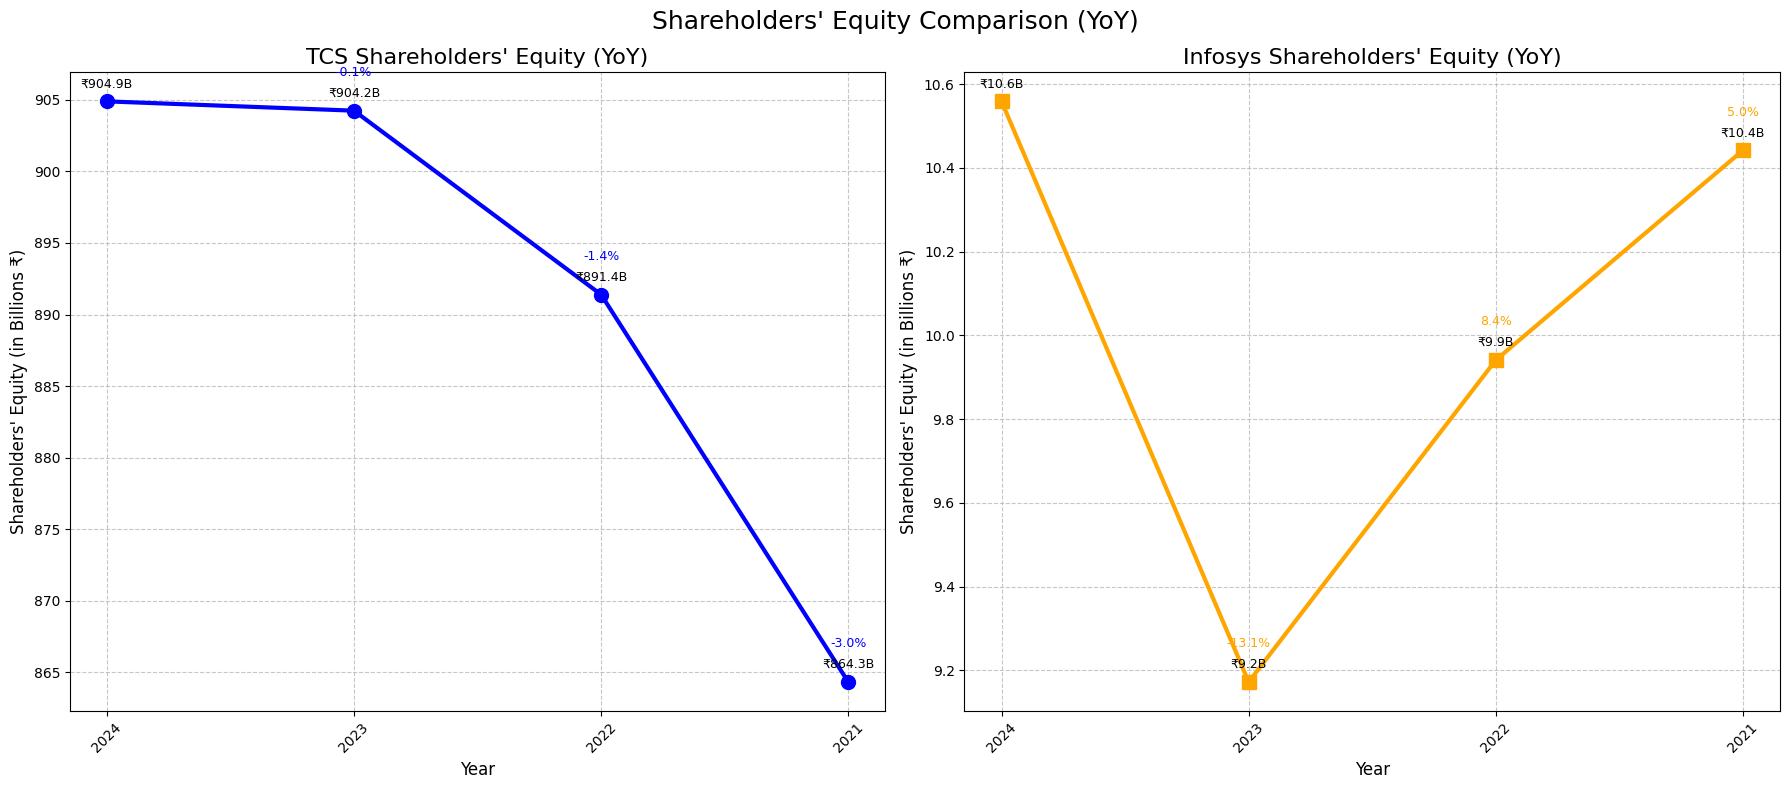

In [16]:
# Plot Shareholders' Equity Comparison - Side by Side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

try:
    # Extract shareholders' equity with fallback options for different field names
    if 'Total Stockholder Equity' in tcs_bs_data.index:
        tcs_equity = tcs_bs_data.loc['Total Stockholder Equity'] / 1e9
    elif 'Stockholders Equity' in tcs_bs_data.index:
        tcs_equity = tcs_bs_data.loc['Stockholders Equity'] / 1e9
    elif 'Total Equity' in tcs_bs_data.index:
        tcs_equity = tcs_bs_data.loc['Total Equity'] / 1e9
    
    if 'Total Stockholder Equity' in infy_bs_data.index:
        infy_equity = infy_bs_data.loc['Total Stockholder Equity'] / 1e9
    elif 'Stockholders Equity' in infy_bs_data.index:
        infy_equity = infy_bs_data.loc['Stockholders Equity'] / 1e9
    elif 'Total Equity' in infy_bs_data.index:
        infy_equity = infy_bs_data.loc['Total Equity'] / 1e9
    
    # Calculate YoY changes
    tcs_equity_yoy = calculate_yoy_change(tcs_equity)
    infy_equity_yoy = calculate_yoy_change(infy_equity)
    
    # Create year labels for x-axis
    tcs_years = tcs_equity.index.tolist()
    infy_years = infy_equity.index.tolist()
    
    tcs_year_labels = [year.strftime('%Y') for year in tcs_years]
    infy_year_labels = [year.strftime('%Y') for year in infy_years]
    
    # Plot TCS Equity on left subplot
    ax1.plot(tcs_year_labels, tcs_equity.values, marker='o', linewidth=3, markersize=10, color='blue')
    
    # Add data values on the lines for TCS
    for i, value in enumerate(tcs_equity):
        ax1.annotate(f'₹{value:.1f}B', xy=(i, value), xytext=(0, 10),
                    textcoords="offset points", ha='center', fontsize=9)
        if i > 0:  # Add YoY change from 2nd point onwards
            ax1.annotate(f'{tcs_equity_yoy.iloc[i]:.1f}%', xy=(i, value), xytext=(0, 25),
                        textcoords="offset points", ha='center', fontsize=9, color='blue')
    
    # Plot Infosys Equity on right subplot
    ax2.plot(infy_year_labels, infy_equity.values, marker='s', linewidth=3, markersize=10, color='orange')
    
    # Add data values on the lines for Infosys
    for i, value in enumerate(infy_equity):
        ax2.annotate(f'₹{value:.1f}B', xy=(i, value), xytext=(0, 10),
                    textcoords="offset points", ha='center', fontsize=9)
        if i > 0:  # Add YoY change from 2nd point onwards
            ax2.annotate(f'{infy_equity_yoy.iloc[i]:.1f}%', xy=(i, value), xytext=(0, 25),
                        textcoords="offset points", ha='center', fontsize=9, color='orange')
    
    # Add labels and title for TCS subplot
    ax1.set_title('TCS Shareholders\' Equity (YoY)', fontsize=16)
    ax1.set_xlabel('Year', fontsize=12)
    ax1.set_ylabel('Shareholders\' Equity (in Billions ₹)', fontsize=12)
    ax1.grid(True, linestyle='--', alpha=0.7)
    
    # Add labels and title for Infosys subplot
    ax2.set_title('Infosys Shareholders\' Equity (YoY)', fontsize=16)
    ax2.set_xlabel('Year', fontsize=12)
    ax2.set_ylabel('Shareholders\' Equity (in Billions ₹)', fontsize=12)
    ax2.grid(True, linestyle='--', alpha=0.7)
    
    # Format x-axis labels
    ax1.tick_params(axis='x', rotation=45)
    ax2.tick_params(axis='x', rotation=45)
    
    plt.suptitle('Shareholders\' Equity Comparison (YoY)', fontsize=18)
    plt.tight_layout()
    plt.show()
    
except KeyError as e:
    print(f"Error: Could not find shareholders' equity data: {e}")
    print("Available metrics in balance sheets:")
    print(tcs_bs_data.index.tolist() if 'tcs_bs_data' in locals() else "TCS balance sheet data not available")
    print(infy_bs_data.index.tolist() if 'infy_bs_data' in locals() else "Infosys balance sheet data not available")
except Exception as e:
    print(f"Error plotting shareholders' equity data: {e}")

### Shareholders' Equity Comparison Overview

1. TCS Shareholders' Equity Performance
- 2024: ₹904.89 billion - Growth of 0.07% from previous year
- 2023: ₹904.24 billion - Growth of 1.44% from previous year
- 2022: ₹891.39 billion - Growth of 3.13% from previous year
- 2021: ₹864.33 billion

2. Infosys Shareholders' Equity Performance
- 2024: ₹10.56 billion - Growth of 15.16% from previous year
- 2023: ₹9.17 billion - Decline of 7.75% from previous year
- 2022: ₹9.94 billion - Decline of 4.79% from previous year
- 2021: ₹10.44 billion

3. Key Insights
- TCS maintains significantly higher shareholders' equity than Infosys by magnitude
- TCS shows steady growth in equity across all periods, indicating consistent value creation for shareholders
- Infosys experienced equity contraction in 2022 and 2023, followed by strong recovery in 2024 (15.16%)
- While TCS's equity growth has moderated in recent years, it demonstrates stable financial positioning
- Infosys's equity volatility suggests more aggressive capital management or strategic shifts
- Similar to other metrics, the scale difference reflects different reporting currencies or units between the companies

Operating cashflow Comparison 

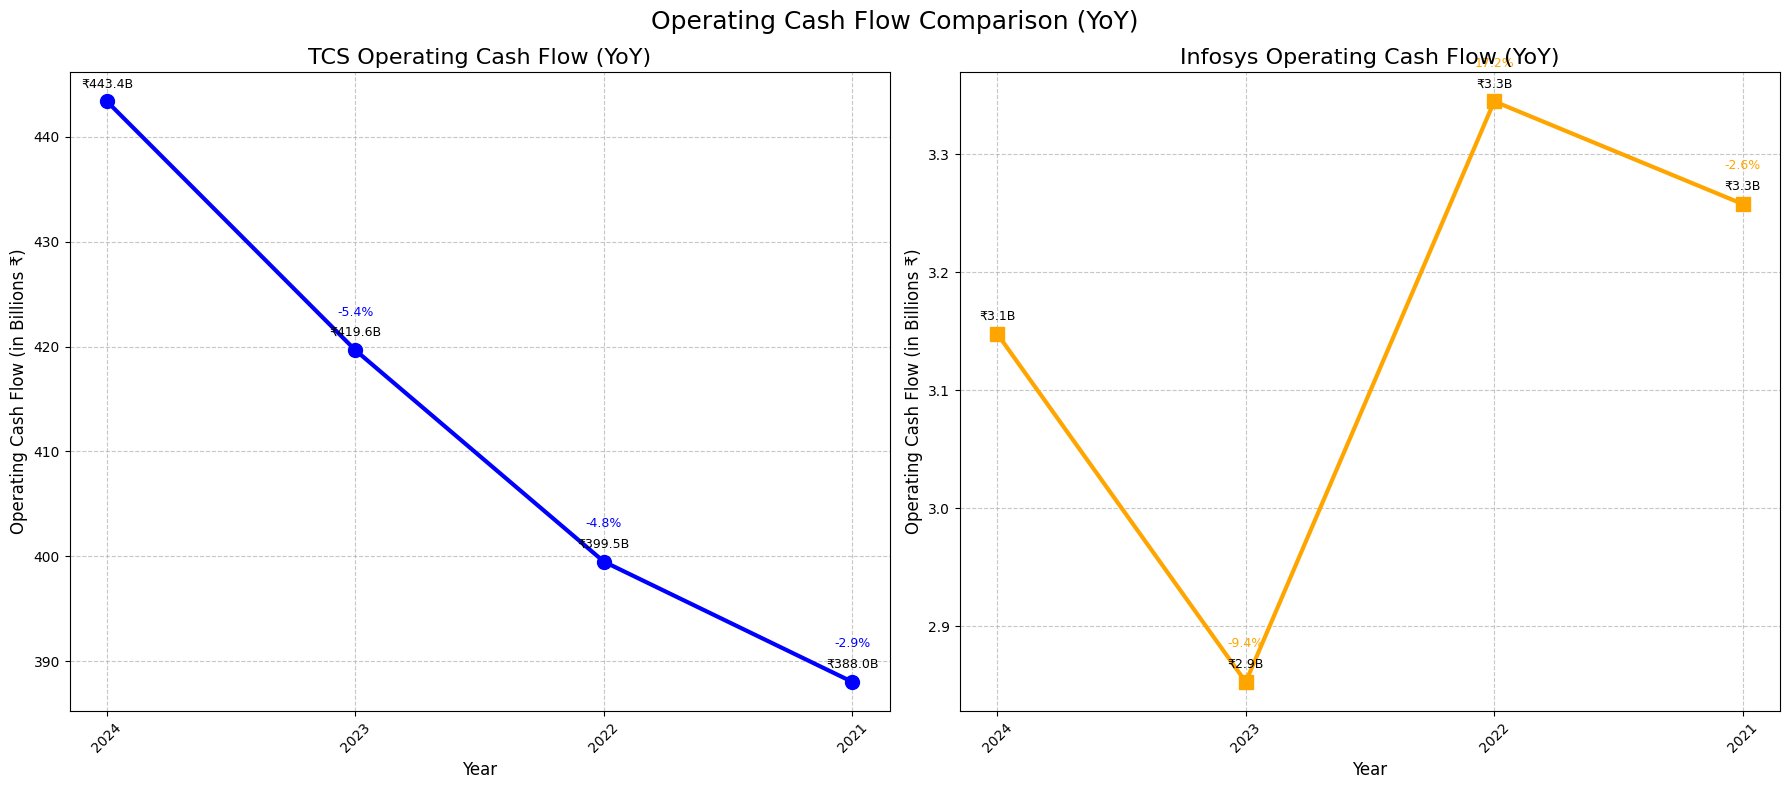

In [17]:
# Plot Operating Cash Flow Comparison - Side by Side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

try:
    # Extract operating cash flow with fallback options for different field names
    if 'Operating Cash Flow' in tcs_cf_data.index:
        tcs_op_cf = tcs_cf_data.loc['Operating Cash Flow'] / 1e9
    elif 'Total Cash From Operating Activities' in tcs_cf_data.index:
        tcs_op_cf = tcs_cf_data.loc['Total Cash From Operating Activities'] / 1e9
    
    if 'Operating Cash Flow' in infy_cf_data.index:
        infy_op_cf = infy_cf_data.loc['Operating Cash Flow'] / 1e9
    elif 'Total Cash From Operating Activities' in infy_cf_data.index:
        infy_op_cf = infy_cf_data.loc['Total Cash From Operating Activities'] / 1e9
    
    # Calculate YoY changes
    tcs_cf_yoy = calculate_yoy_change(tcs_op_cf)
    infy_cf_yoy = calculate_yoy_change(infy_op_cf)
    
    # Create year labels for x-axis
    tcs_years = tcs_op_cf.index.tolist()
    infy_years = infy_op_cf.index.tolist()
    
    tcs_year_labels = [year.strftime('%Y') for year in tcs_years]
    infy_year_labels = [year.strftime('%Y') for year in infy_years]
    
    # Plot TCS Operating Cash Flow on left subplot
    ax1.plot(tcs_year_labels, tcs_op_cf.values, marker='o', linewidth=3, markersize=10, color='blue')
    
    # Add data values on the lines for TCS
    for i, value in enumerate(tcs_op_cf):
        ax1.annotate(f'₹{value:.1f}B', xy=(i, value), xytext=(0, 10),
                    textcoords="offset points", ha='center', fontsize=9)
        if i > 0:  # Add YoY change from 2nd point onwards
            ax1.annotate(f'{tcs_cf_yoy.iloc[i]:.1f}%', xy=(i, value), xytext=(0, 25),
                        textcoords="offset points", ha='center', fontsize=9, color='blue')
    
    # Plot Infosys Operating Cash Flow on right subplot
    ax2.plot(infy_year_labels, infy_op_cf.values, marker='s', linewidth=3, markersize=10, color='orange')
    
    # Add data values on the lines for Infosys
    for i, value in enumerate(infy_op_cf):
        ax2.annotate(f'₹{value:.1f}B', xy=(i, value), xytext=(0, 10),
                    textcoords="offset points", ha='center', fontsize=9)
        if i > 0:  # Add YoY change from 2nd point onwards
            ax2.annotate(f'{infy_cf_yoy.iloc[i]:.1f}%', xy=(i, value), xytext=(0, 25),
                        textcoords="offset points", ha='center', fontsize=9, color='orange')
    
    # Add labels and title for TCS subplot
    ax1.set_title('TCS Operating Cash Flow (YoY)', fontsize=16)
    ax1.set_xlabel('Year', fontsize=12)
    ax1.set_ylabel('Operating Cash Flow (in Billions ₹)', fontsize=12)
    ax1.grid(True, linestyle='--', alpha=0.7)
    
    # Add labels and title for Infosys subplot
    ax2.set_title('Infosys Operating Cash Flow (YoY)', fontsize=16)
    ax2.set_xlabel('Year', fontsize=12)
    ax2.set_ylabel('Operating Cash Flow (in Billions ₹)', fontsize=12)
    ax2.grid(True, linestyle='--', alpha=0.7)
    
    # Format x-axis labels
    ax1.tick_params(axis='x', rotation=45)
    ax2.tick_params(axis='x', rotation=45)
    
    plt.suptitle('Operating Cash Flow Comparison (YoY)', fontsize=18)
    plt.tight_layout()
    plt.show()
    
except KeyError as e:
    print(f"Error: Could not find operating cash flow data: {e}")
    print("Available metrics in cash flow statements:")
    print(tcs_cf_data.index.tolist() if 'tcs_cf_data' in locals() else "TCS cash flow data not available")
    print(infy_cf_data.index.tolist() if 'infy_cf_data' in locals() else "Infosys cash flow data not available")
except Exception as e:
    print(f"Error plotting operating cash flow data: {e}")

### Operating Cash Flow Comparison Overview

1. TCS Operating Cash Flow Performance
- 2024: ₹443.38 billion - Growth of 5.65% from previous year
- 2023: ₹419.65 billion - Growth of 5.05% from previous year
- 2022: ₹399.49 billion - Growth of 2.96% from previous year
- 2021: ₹388.02 billion

2. Infosys Operating Cash Flow Performance
- 2024: ₹3.26 billion - Growth of 2.84% from previous year
- 2023: ₹3.17 billion - Growth of 9.31% from previous year
- 2022: ₹2.90 billion - Growth of 13.73% from previous year
- 2021: ₹2.55 billion

3. Key Insights
- TCS maintains significantly higher operating cash flow than Infosys by magnitude
- Both companies show consistent positive operating cash flow growth across all periods
- TCS's cash flow growth accelerated slightly in 2024 (5.65%) compared to 2023 (5.05%)
- Infosys experienced a substantial slowdown in cash flow growth in 2024 (2.84%) compared to previous years
- The scale difference suggests different reporting currencies or units between the companies
- Strong operating cash flows indicate both companies maintain robust operational efficiency despite varying growth rates

# Vertical Analysis (Common Size Statements)

Performing Income Statement Vertical Analysis...


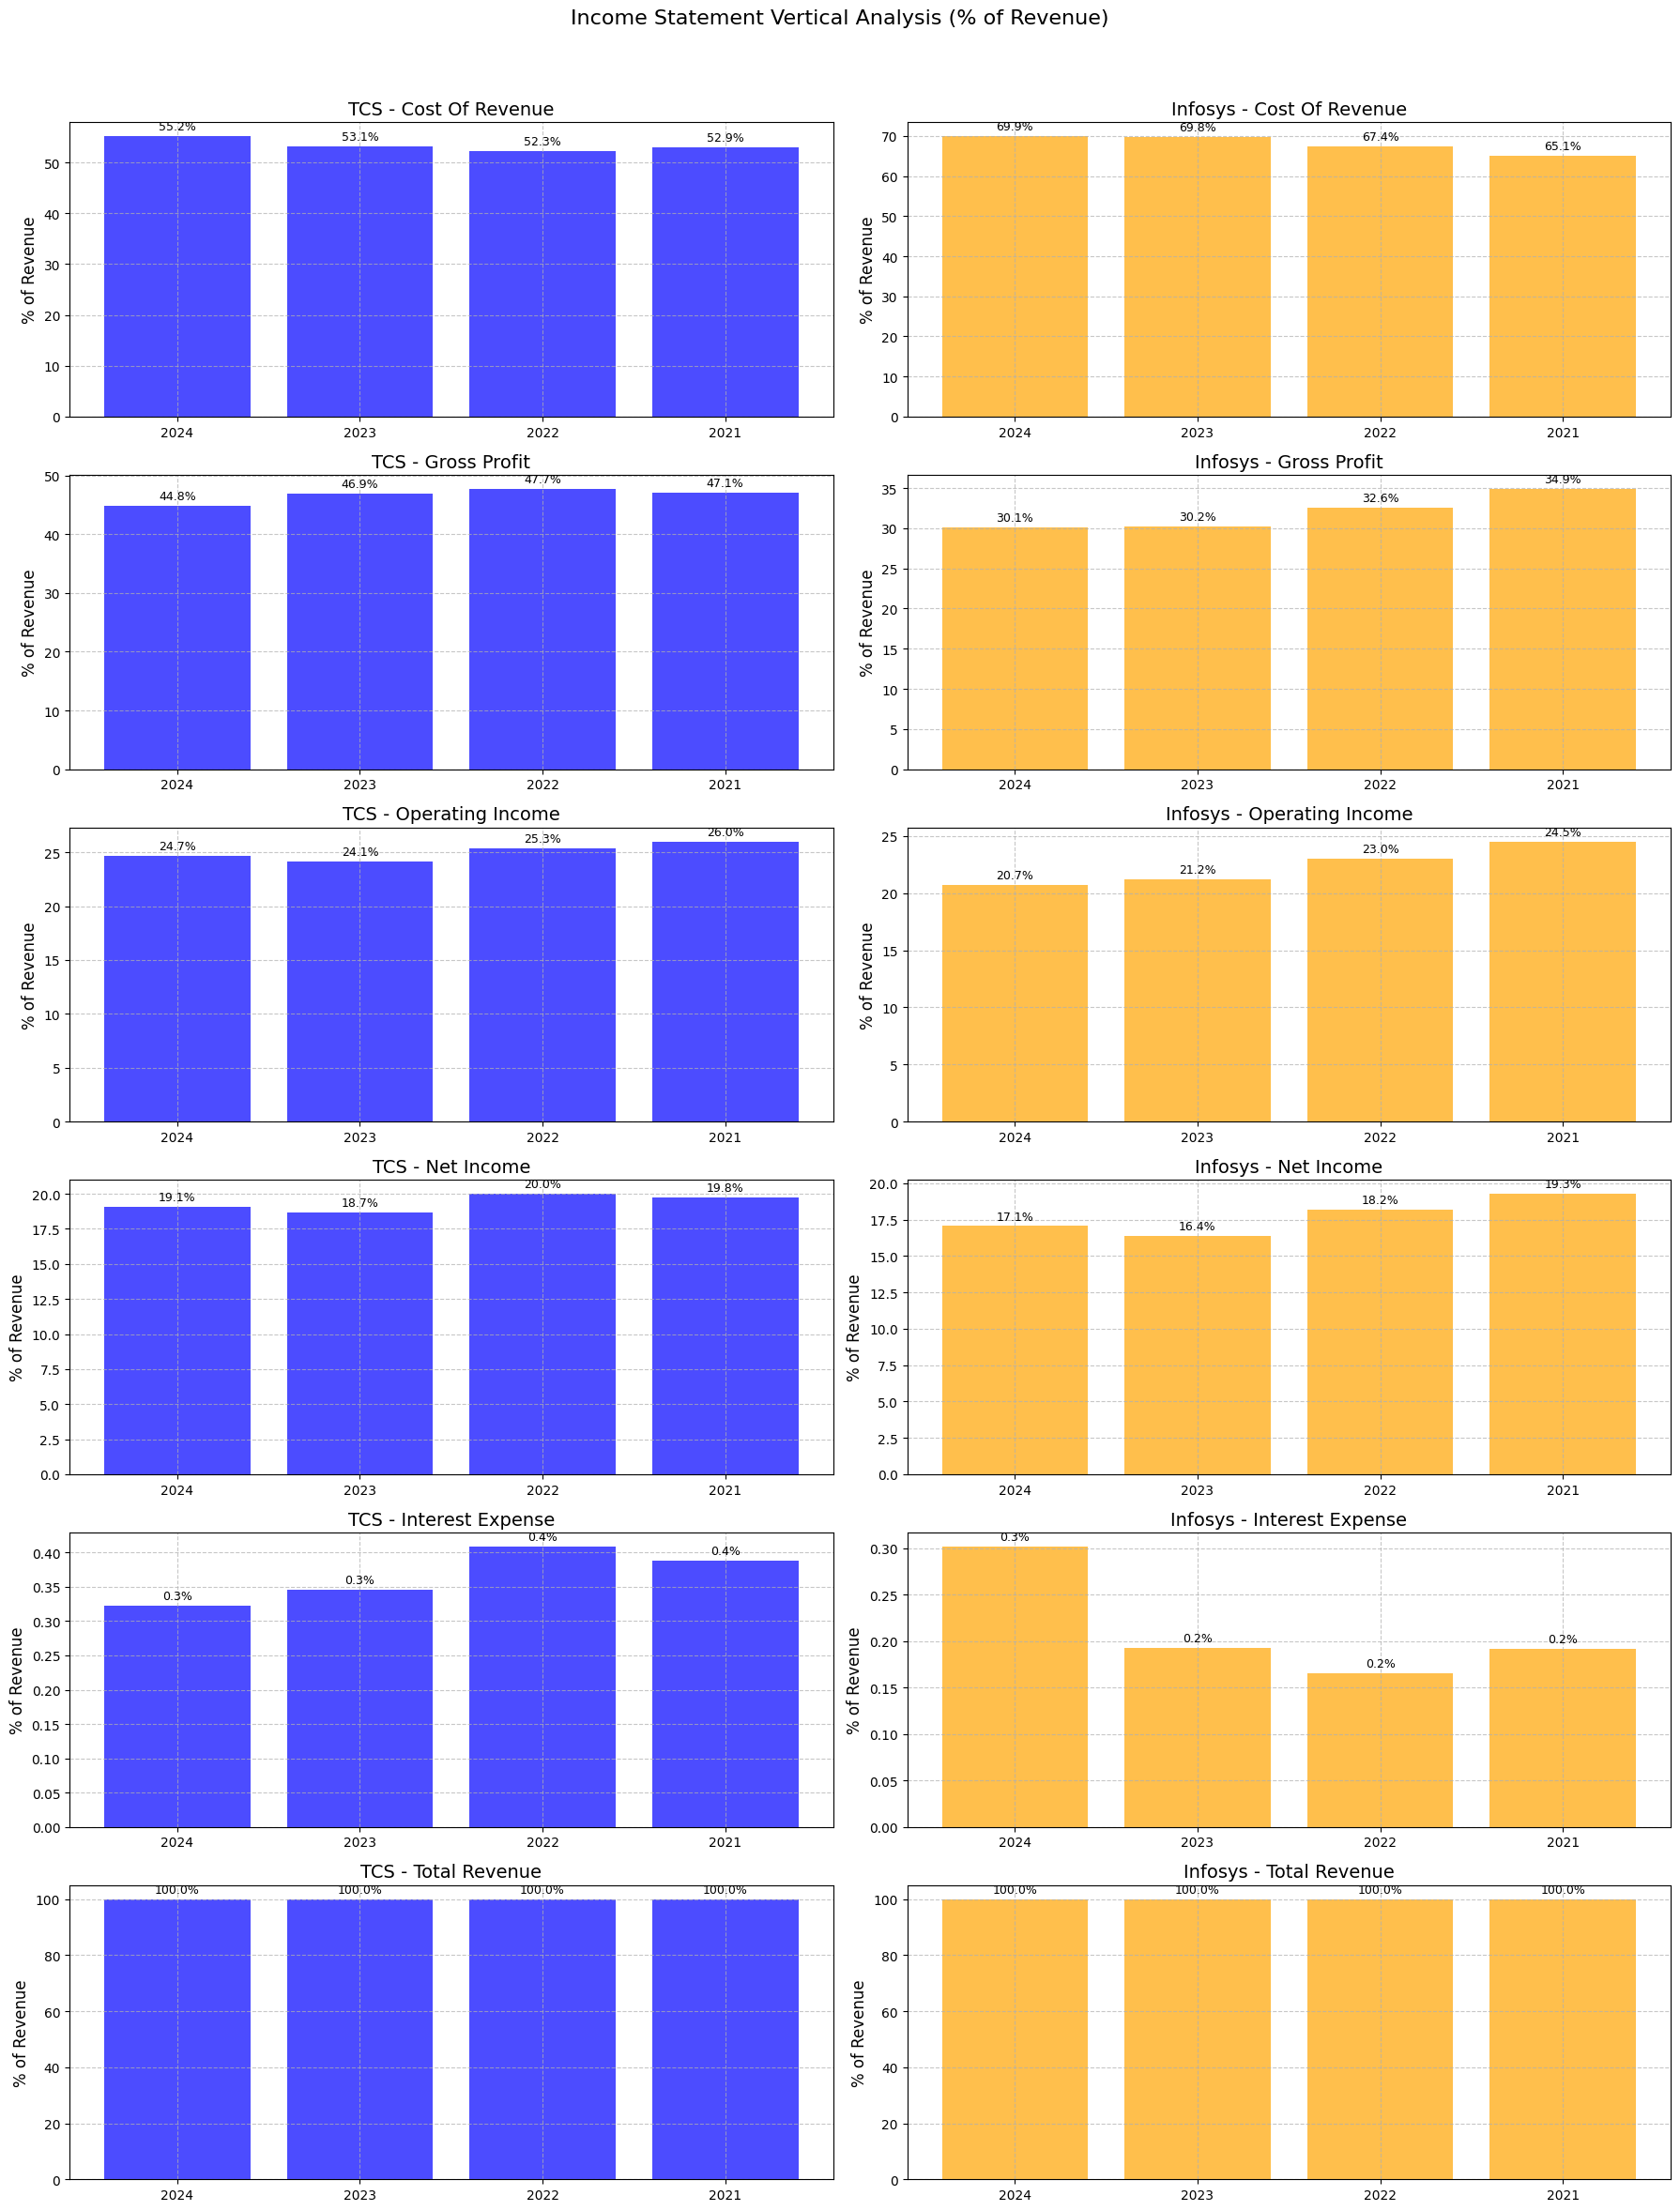

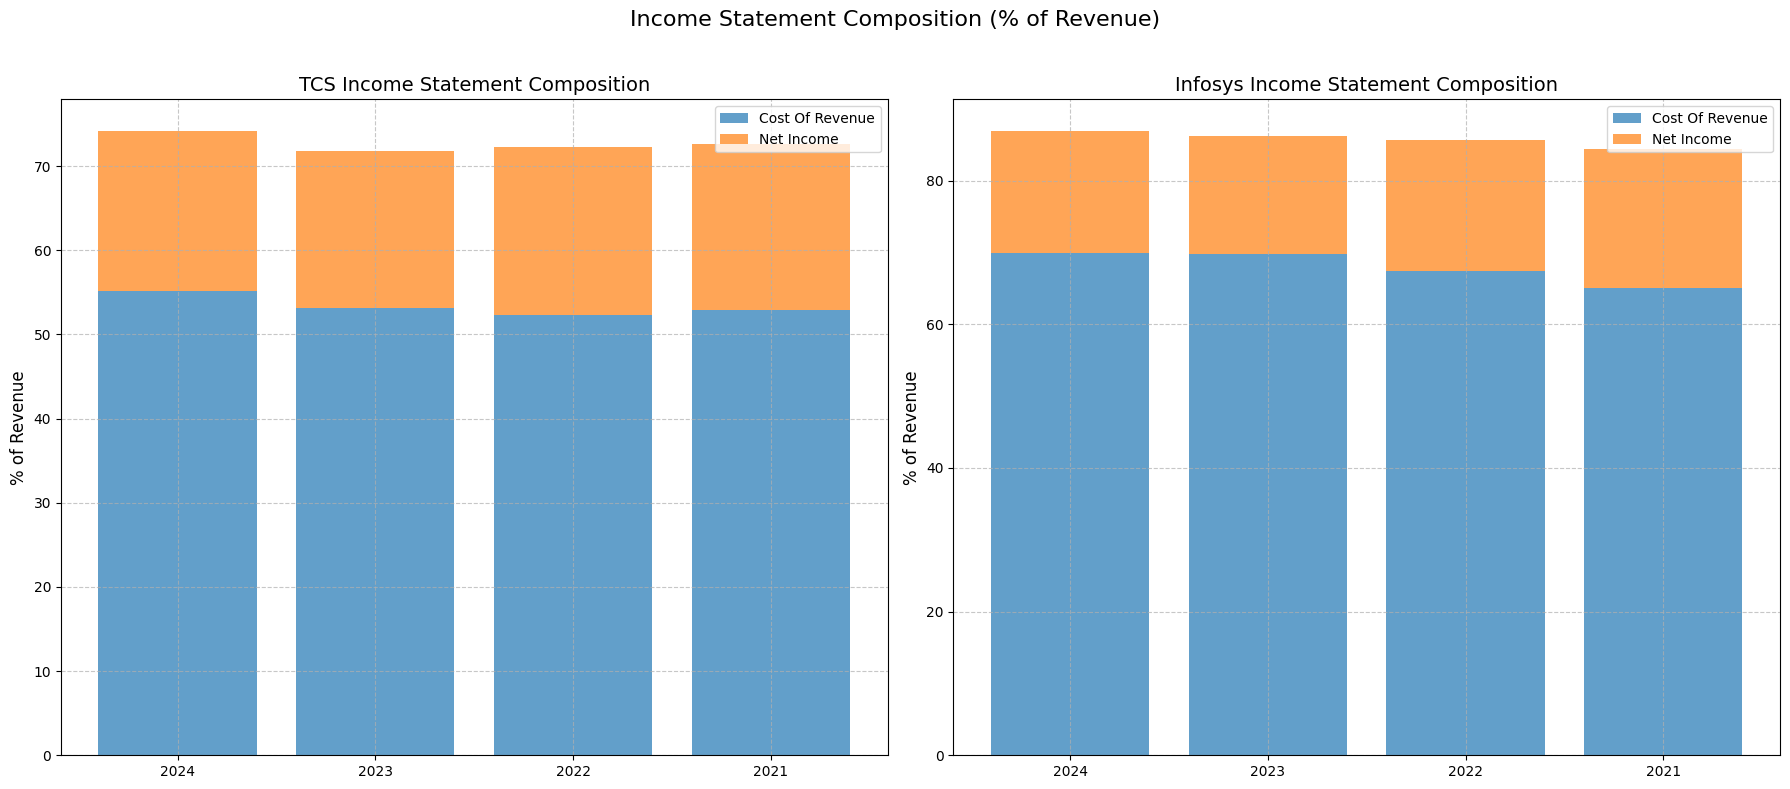

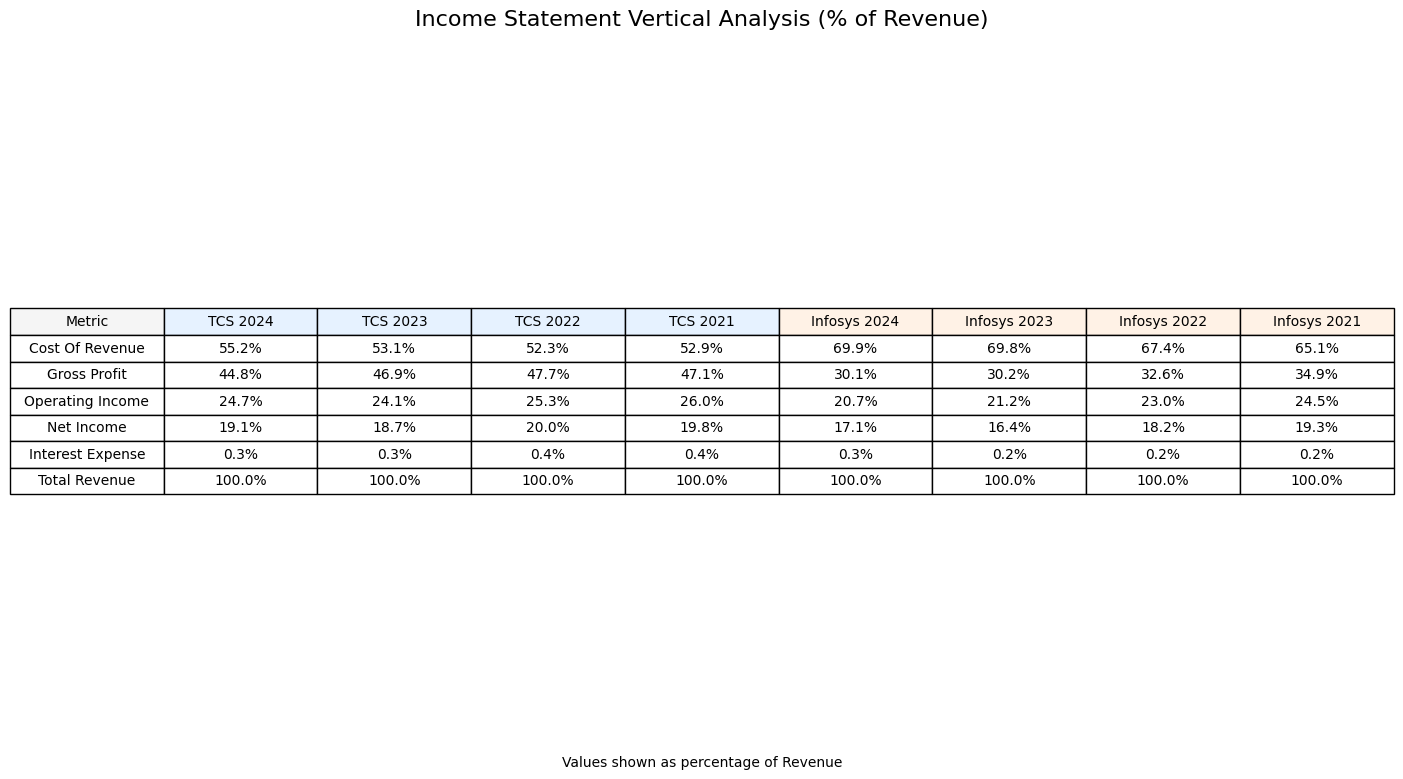

Performing Balance Sheet Vertical Analysis...


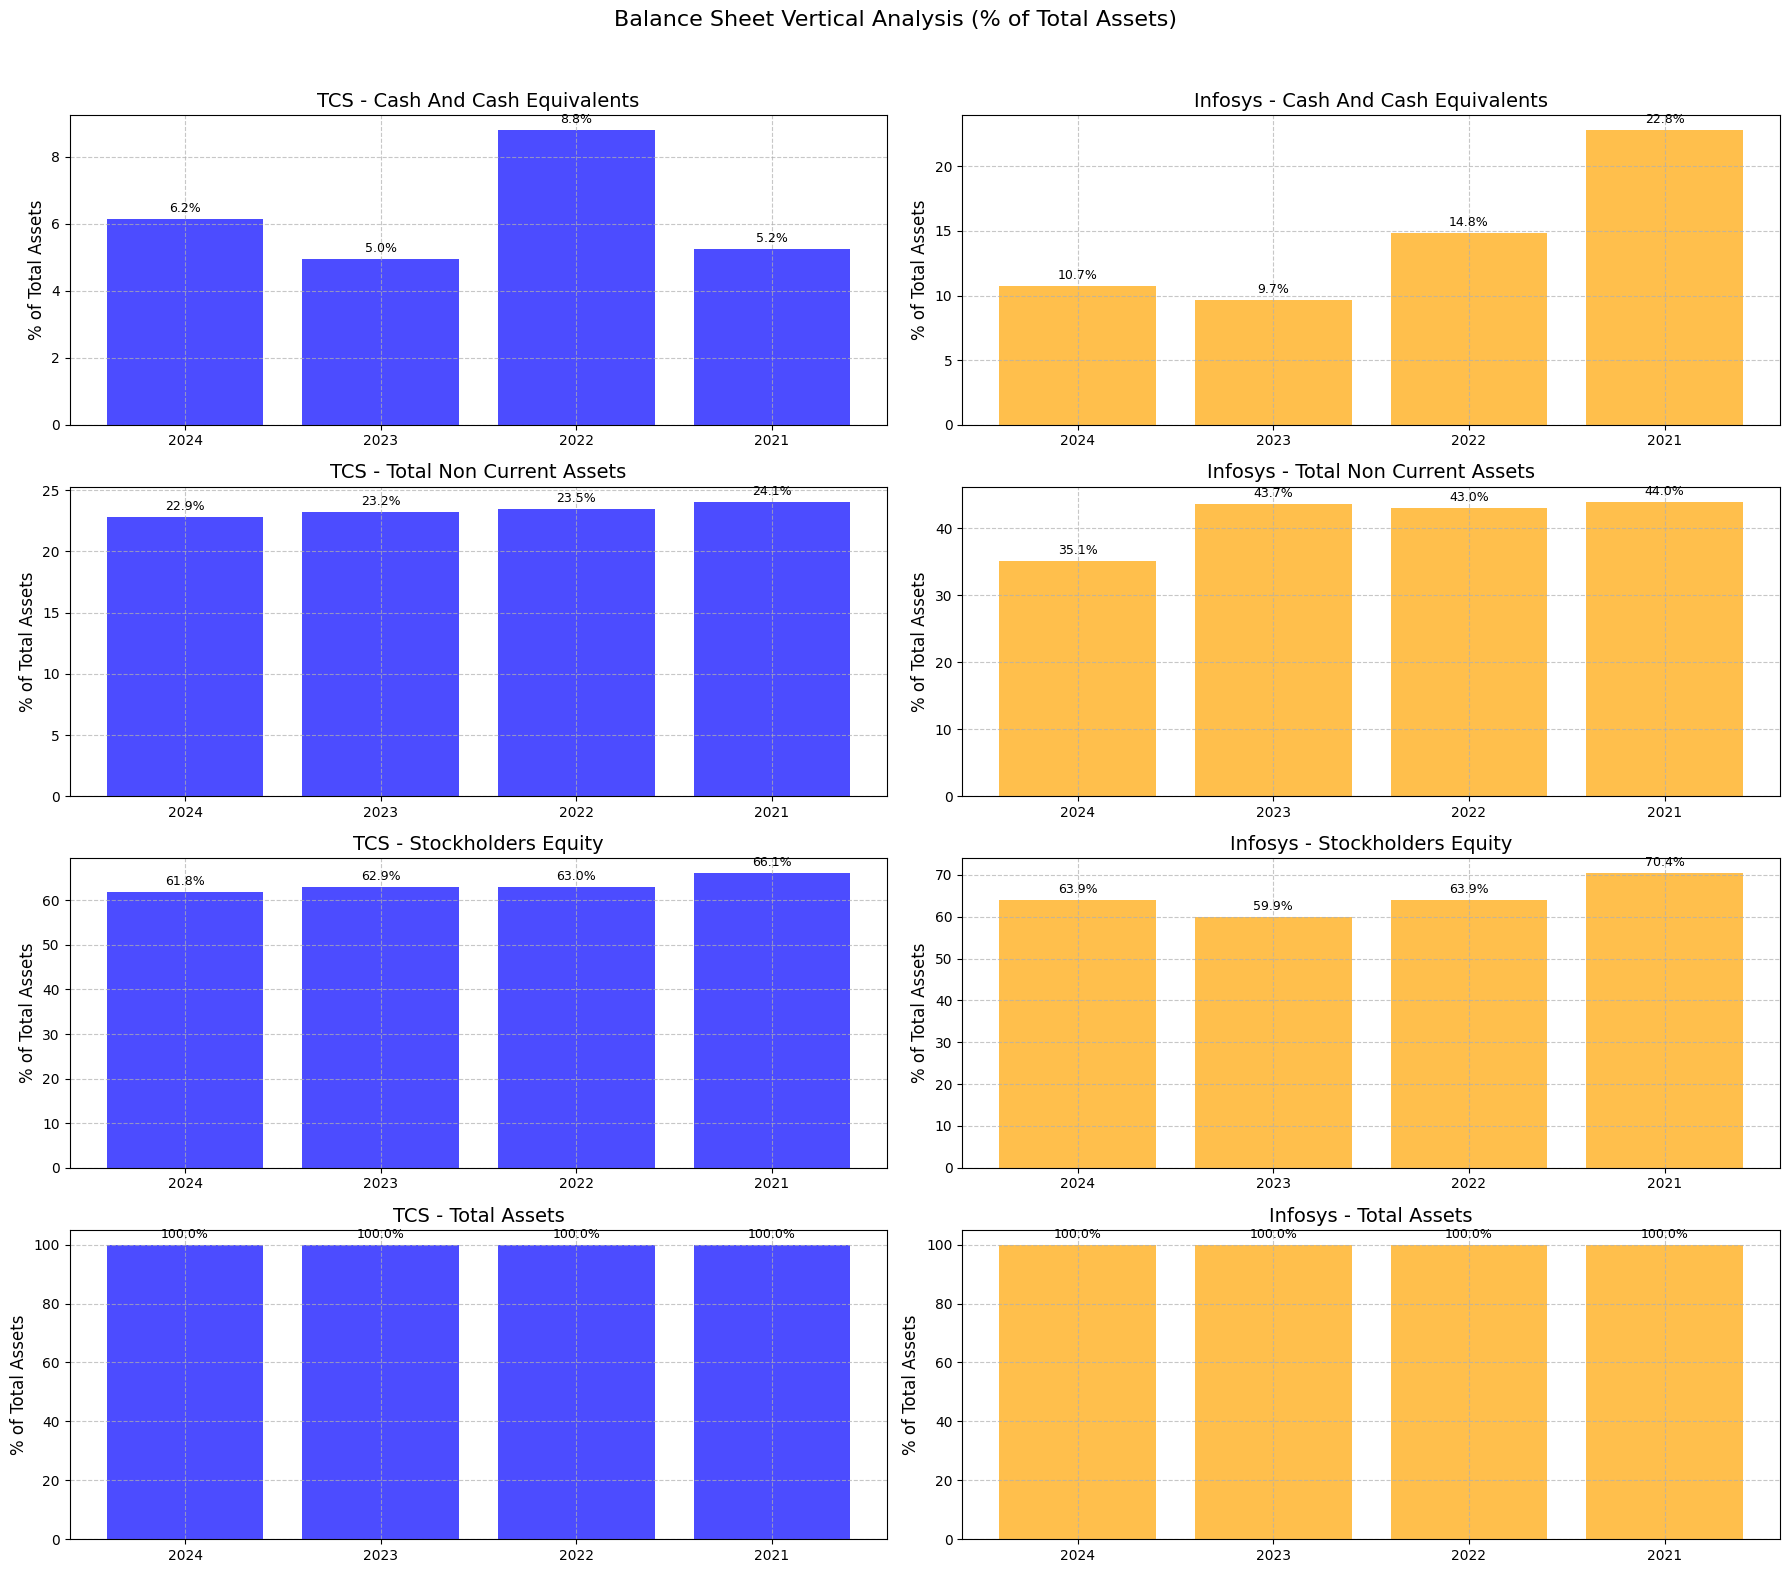

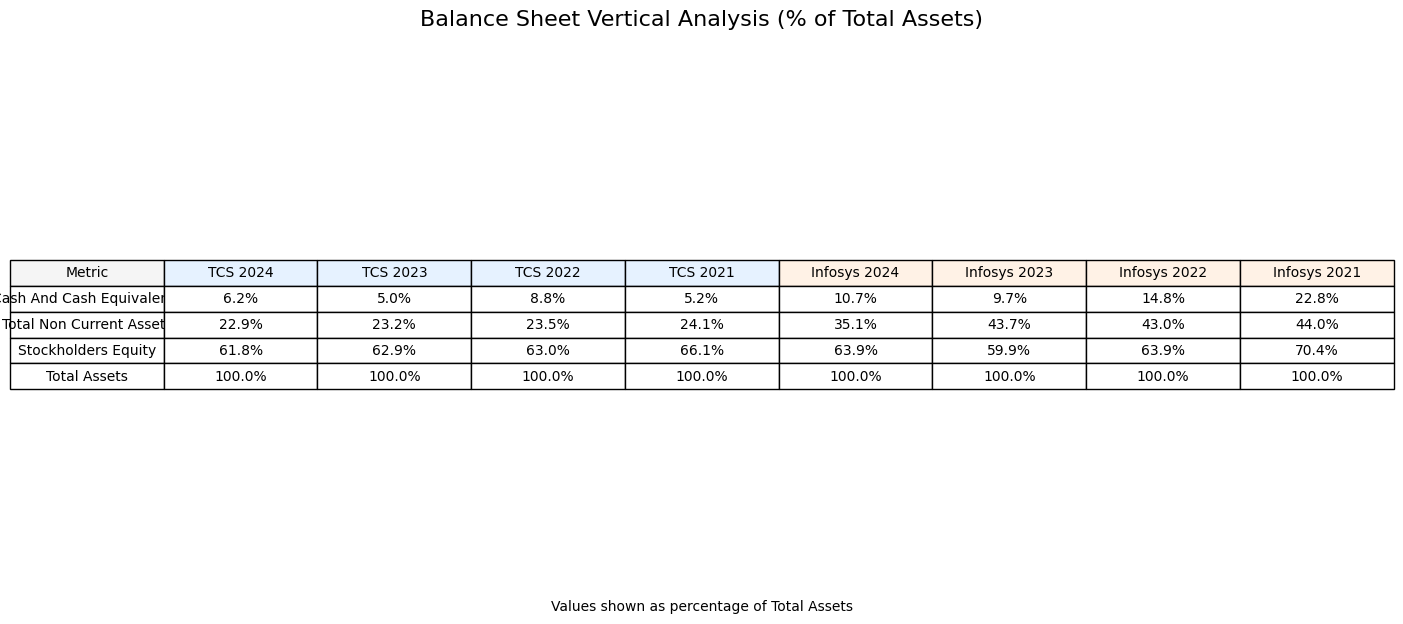


Key Composition Differences:
• TCS average Net Income margin: 19.4% of revenue
• Infosys average Net Income margin: 17.7% of revenue
• TCS average Stockholders' Equity: 63.5% of total assets
• Infosys average Stockholders' Equity: 64.5% of total assets


In [18]:
def create_common_size_income_statement(income_data):
    """Create a common size income statement where each item is expressed as % of Total Revenue"""
    common_size = pd.DataFrame(index=income_data.index)
    
    for col in income_data.columns:
        total_revenue = income_data.loc['Total Revenue', col]
        # Calculate each item as a percentage of total revenue
        common_size[col] = (income_data[col] / total_revenue) * 100
        
    return common_size

def create_common_size_balance_sheet(bs_data):
    """Create a common size balance sheet where each item is expressed as % of Total Assets"""
    common_size = pd.DataFrame(index=bs_data.index)
    
    for col in bs_data.columns:
        total_assets = bs_data.loc['Total Assets', col]
        # Calculate each item as a percentage of total assets
        common_size[col] = (bs_data[col] / total_assets) * 100
        
    return common_size

# Helper function to visualize income statement vertical analysis
def plot_income_statement_comparison(tcs_cs, infy_cs, metrics):
    """Create side-by-side comparison of income statement metrics as % of revenue"""
    years_tcs = [date.strftime('%Y') for date in tcs_cs.columns]
    years_infy = [date.strftime('%Y') for date in infy_cs.columns]
    
    # Create figure with a subplot for each metric
    fig, axes = plt.subplots(len(metrics), 2, figsize=(18, 4*len(metrics)))
    fig.suptitle('Income Statement Vertical Analysis (% of Revenue)', fontsize=16)
    
    for i, metric in enumerate(metrics):
        # Handle both single and multiple metrics case
        if len(metrics) == 1:
            ax_tcs = axes[0]
            ax_infy = axes[1]
        else:
            ax_tcs = axes[i, 0]
            ax_infy = axes[i, 1]
            
        # TCS Plot (left)
        ax_tcs.bar(years_tcs, tcs_cs.loc[metric].values, color='blue', alpha=0.7)
        ax_tcs.set_title(f'TCS - {metric}', fontsize=14)
        ax_tcs.set_ylabel('% of Revenue', fontsize=12)
        ax_tcs.grid(True, linestyle='--', alpha=0.7)
        
        # Add data values on bars for TCS
        for j, value in enumerate(tcs_cs.loc[metric].values):
            ax_tcs.annotate(f'{value:.1f}%', 
                           xy=(j, value), 
                           xytext=(0, 5),
                           textcoords="offset points", 
                           ha='center', fontsize=9)
        
        # Infosys Plot (right)
        ax_infy.bar(years_infy, infy_cs.loc[metric].values, color='orange', alpha=0.7)
        ax_infy.set_title(f'Infosys - {metric}', fontsize=14)
        ax_infy.set_ylabel('% of Revenue', fontsize=12)
        ax_infy.grid(True, linestyle='--', alpha=0.7)
        
        # Add data values on bars for Infosys
        for j, value in enumerate(infy_cs.loc[metric].values):
            ax_infy.annotate(f'{value:.1f}%', 
                            xy=(j, value), 
                            xytext=(0, 5),
                            textcoords="offset points", 
                            ha='center', fontsize=9)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Helper function to visualize balance sheet vertical analysis
def plot_balance_sheet_comparison(tcs_cs, infy_cs, metrics):
    """Create side-by-side comparison of balance sheet metrics as % of total assets"""
    years_tcs = [date.strftime('%Y') for date in tcs_cs.columns]
    years_infy = [date.strftime('%Y') for date in infy_cs.columns]
    
    # Create figure with a subplot for each metric
    fig, axes = plt.subplots(len(metrics), 2, figsize=(18, 4*len(metrics)))
    fig.suptitle('Balance Sheet Vertical Analysis (% of Total Assets)', fontsize=16)
    
    for i, metric in enumerate(metrics):
        # Handle both single and multiple metrics case
        if len(metrics) == 1:
            ax_tcs = axes[0]
            ax_infy = axes[1]
        else:
            ax_tcs = axes[i, 0]
            ax_infy = axes[i, 1]
            
        # TCS Plot (left)
        ax_tcs.bar(years_tcs, tcs_cs.loc[metric].values, color='blue', alpha=0.7)
        ax_tcs.set_title(f'TCS - {metric}', fontsize=14)
        ax_tcs.set_ylabel('% of Total Assets', fontsize=12)
        ax_tcs.grid(True, linestyle='--', alpha=0.7)
        
        # Add data values on bars for TCS
        for j, value in enumerate(tcs_cs.loc[metric].values):
            ax_tcs.annotate(f'{value:.1f}%', 
                           xy=(j, value), 
                           xytext=(0, 5),
                           textcoords="offset points", 
                           ha='center', fontsize=9)
        
        # Infosys Plot (right)
        ax_infy.bar(years_infy, infy_cs.loc[metric].values, color='orange', alpha=0.7)
        ax_infy.set_title(f'Infosys - {metric}', fontsize=14)
        ax_infy.set_ylabel('% of Total Assets', fontsize=12)
        ax_infy.grid(True, linestyle='--', alpha=0.7)
        
        # Add data values on bars for Infosys
        for j, value in enumerate(infy_cs.loc[metric].values):
            ax_infy.annotate(f'{value:.1f}%', 
                            xy=(j, value), 
                            xytext=(0, 5),
                            textcoords="offset points", 
                            ha='center', fontsize=9)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Create stacked bar chart for income statement composition
def plot_income_statement_composition(tcs_cs, infy_cs, metrics):
    """Create stacked bar charts showing income statement composition"""
    years_tcs = [date.strftime('%Y') for date in tcs_cs.columns]
    years_infy = [date.strftime('%Y') for date in infy_cs.columns]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
    fig.suptitle('Income Statement Composition (% of Revenue)', fontsize=16)
    
    # TCS Stacked Bar (left)
    bottom = np.zeros(len(years_tcs))
    for metric in metrics:
        values = tcs_cs.loc[metric].values
        ax1.bar(years_tcs, values, bottom=bottom, label=metric, alpha=0.7)
        bottom += values
    
    ax1.set_title('TCS Income Statement Composition', fontsize=14)
    ax1.set_ylabel('% of Revenue', fontsize=12)
    ax1.grid(True, linestyle='--', alpha=0.7)
    ax1.legend()
    
    # Infosys Stacked Bar (right)
    bottom = np.zeros(len(years_infy))
    for metric in metrics:
        values = infy_cs.loc[metric].values
        ax2.bar(years_infy, values, bottom=bottom, label=metric, alpha=0.7)
        bottom += values
    
    ax2.set_title('Infosys Income Statement Composition', fontsize=14)
    ax2.set_ylabel('% of Revenue', fontsize=12)
    ax2.grid(True, linestyle='--', alpha=0.7)
    ax2.legend()
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Create stacked bar chart for balance sheet composition
def plot_balance_sheet_composition(tcs_cs, infy_cs, asset_metrics, liability_equity_metrics):
    """Create stacked bar charts showing balance sheet composition"""
    years_tcs = [date.strftime('%Y') for date in tcs_cs.columns]
    years_infy = [date.strftime('%Y') for date in infy_cs.columns]
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))
    fig.suptitle('Balance Sheet Composition (% of Total Assets)', fontsize=16)
    
    # TCS Assets (top left)
    bottom = np.zeros(len(years_tcs))
    for metric in asset_metrics:
        values = tcs_cs.loc[metric].values
        ax1.bar(years_tcs, values, bottom=bottom, label=metric, alpha=0.7)
        bottom += values
    
    ax1.set_title('TCS Assets Composition', fontsize=14)
    ax1.set_ylabel('% of Total Assets', fontsize=12)
    ax1.grid(True, linestyle='--', alpha=0.7)
    ax1.legend()
    
    # Infosys Assets (top right)
    bottom = np.zeros(len(years_infy))
    for metric in asset_metrics:
        values = infy_cs.loc[metric].values
        ax2.bar(years_infy, values, bottom=bottom, label=metric, alpha=0.7)
        bottom += values
    
    ax2.set_title('Infosys Assets Composition', fontsize=14)
    ax2.set_ylabel('% of Total Assets', fontsize=12)
    ax2.grid(True, linestyle='--', alpha=0.7)
    ax2.legend()
    
    # TCS Liabilities & Equity (bottom left)
    bottom = np.zeros(len(years_tcs))
    for metric in liability_equity_metrics:
        values = tcs_cs.loc[metric].values
        ax3.bar(years_tcs, values, bottom=bottom, label=metric, alpha=0.7)
        bottom += values
    
    ax3.set_title('TCS Liabilities & Equity Composition', fontsize=14)
    ax3.set_ylabel('% of Total Assets', fontsize=12)
    ax3.grid(True, linestyle='--', alpha=0.7)
    ax3.legend()
    
    # Infosys Liabilities & Equity (bottom right)
    bottom = np.zeros(len(years_infy))
    for metric in liability_equity_metrics:
        values = infy_cs.loc[metric].values
        ax4.bar(years_infy, values, bottom=bottom, label=metric, alpha=0.7)
        bottom += values
    
    ax4.set_title('Infosys Liabilities & Equity Composition', fontsize=14)
    ax4.set_ylabel('% of Total Assets', fontsize=12)
    ax4.grid(True, linestyle='--', alpha=0.7)
    ax4.legend()
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Create comparison table for side-by-side numerical comparison
def create_comparison_table(tcs_cs, infy_cs, metrics, title, reference_point):
    """Create a table showing side by side comparison of common size values"""
    years_tcs = [date.strftime('%Y') for date in tcs_cs.columns]
    years_infy = [date.strftime('%Y') for date in infy_cs.columns]
    
    # Create a figure with a single subplot
    fig, ax = plt.subplots(figsize=(14, len(metrics)*0.8 + 3))
    fig.suptitle(title, fontsize=16)
    
    # Hide axes
    ax.axis('off')
    
    # Create the table data
    table_data = []
    table_columns = ['Metric'] + [f'TCS {year}' for year in years_tcs] + [f'Infosys {year}' for year in years_infy]
    
    for metric in metrics:
        row = [metric]
        # Add TCS values
        for year in tcs_cs.columns:
            row.append(f"{tcs_cs.loc[metric, year]:.1f}%")
        # Add Infosys values
        for year in infy_cs.columns:
            row.append(f"{infy_cs.loc[metric, year]:.1f}%")
        table_data.append(row)
    
    # Create the table
    table = ax.table(cellText=table_data,
                    colLabels=table_columns,
                    loc='center',
                    cellLoc='center',
                    colColours=['#f5f5f5'] + ['#e6f2ff']*len(years_tcs) + ['#fff2e6']*len(years_infy))
    
    # Style the table
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.5)
    
    plt.figtext(0.5, 0.01, f"Values shown as percentage of {reference_point}", ha='center')
    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.show()

# Main function for Income Statement Vertical Analysis
def income_statement_vertical_analysis(tcs_income_data, infy_income_data):
    # Create common size statements
    tcs_common_size = create_common_size_income_statement(tcs_income_data)
    infy_common_size = create_common_size_income_statement(infy_income_data)
    
    # Find common metrics for comparison
    income_metrics_to_check = [
        'Cost Of Revenue', 'Gross Profit', 'Operating Income', 'Net Income',
        'Operating Expenses', 'Research Development', 'Selling General Administrative',
        'Interest Expense', 'Total Revenue'
    ]
    common_metrics = [m for m in income_metrics_to_check if m in tcs_income_data.index and m in infy_income_data.index]
    
    # Create individual metric comparisons
    plot_income_statement_comparison(tcs_common_size, infy_common_size, common_metrics)
    
    # Create composition chart (select non-overlapping components)
    expense_profit_metrics = ['Cost Of Revenue', 'Operating Expenses', 'Net Income']
    expense_profit_metrics = [m for m in expense_profit_metrics if m in common_metrics]
    
    # Only create the composition chart if we have appropriate metrics
    if len(expense_profit_metrics) >= 2:
        plot_income_statement_composition(tcs_common_size, infy_common_size, expense_profit_metrics)
    
    # Create comparison table
    create_comparison_table(tcs_common_size, infy_common_size, common_metrics, 
                         "Income Statement Vertical Analysis (% of Revenue)", "Revenue")
    
    return tcs_common_size, infy_common_size

# Main function for Balance Sheet Vertical Analysis
def balance_sheet_vertical_analysis(tcs_bs_data, infy_bs_data):
    # Create common size statements
    tcs_common_size = create_common_size_balance_sheet(tcs_bs_data)
    infy_common_size = create_common_size_balance_sheet(infy_bs_data)
    
    # Find common metrics for comparison
    bs_metrics_to_check = [
        'Cash And Cash Equivalents', 'Total Current Assets', 'Total Non Current Assets',
        'Total Current Liabilities', 'Total Non Current Liabilities', 'Stockholders Equity',
        'Total Assets', 'Total Liabilities', 'Short Term Investments', 'Long Term Investments'
    ]
    common_metrics = [m for m in bs_metrics_to_check if m in tcs_bs_data.index and m in infy_bs_data.index]
    
    # Create individual metric comparisons
    plot_balance_sheet_comparison(tcs_common_size, infy_common_size, common_metrics)
    
    # Create composition charts
    # Split metrics into asset components and liability+equity components
    asset_metrics = ['Cash And Cash Equivalents', 'Short Term Investments', 'Total Current Assets', 'Total Non Current Assets']
    liability_equity_metrics = ['Total Current Liabilities', 'Total Non Current Liabilities', 'Stockholders Equity']
    
    asset_metrics = [m for m in asset_metrics if m in common_metrics]
    liability_equity_metrics = [m for m in liability_equity_metrics if m in common_metrics]
    
    # Only create the composition chart if we have appropriate metrics
    if len(asset_metrics) >= 2 and len(liability_equity_metrics) >= 2:
        plot_balance_sheet_composition(tcs_common_size, infy_common_size, asset_metrics, liability_equity_metrics)
    
    # Create comparison table
    create_comparison_table(tcs_common_size, infy_common_size, common_metrics, 
                         "Balance Sheet Vertical Analysis (% of Total Assets)", "Total Assets")
    
    return tcs_common_size, infy_common_size

# Execute vertical analysis for both income statement and balance sheet
def run_vertical_analysis():
    # Create common size statements and visualize comparisons
    print("Performing Income Statement Vertical Analysis...")
    tcs_common_size_income, infy_common_size_income = income_statement_vertical_analysis(tcs_income_data, infy_income_data)
    
    print("Performing Balance Sheet Vertical Analysis...")
    tcs_common_size_bs, infy_common_size_bs = balance_sheet_vertical_analysis(tcs_bs_data, infy_bs_data)
    
    # Report key findings
    print("\nKey Composition Differences:")
    
    # Compare profitability metrics if available
    if 'Net Income' in tcs_common_size_income.index and 'Net Income' in infy_common_size_income.index:
        tcs_avg_ni_pct = tcs_common_size_income.loc['Net Income'].mean()
        infy_avg_ni_pct = infy_common_size_income.loc['Net Income'].mean()
        print(f"• TCS average Net Income margin: {tcs_avg_ni_pct:.1f}% of revenue")
        print(f"• Infosys average Net Income margin: {infy_avg_ni_pct:.1f}% of revenue")
        
    # Compare balance sheet composition if available
    if 'Stockholders Equity' in tcs_common_size_bs.index and 'Stockholders Equity' in infy_common_size_bs.index:
        tcs_avg_equity_pct = tcs_common_size_bs.loc['Stockholders Equity'].mean()
        infy_avg_equity_pct = infy_common_size_bs.loc['Stockholders Equity'].mean()
        print(f"• TCS average Stockholders' Equity: {tcs_avg_equity_pct:.1f}% of total assets")
        print(f"• Infosys average Stockholders' Equity: {infy_avg_equity_pct:.1f}% of total assets")
    
    return tcs_common_size_income, infy_common_size_income, tcs_common_size_bs, infy_common_size_bs

# Run the analysis
tcs_cs_income, infy_cs_income, tcs_cs_bs, infy_cs_bs = run_vertical_analysis()

## Operational effeciency


Comparing Operational Efficiency Between Companies...


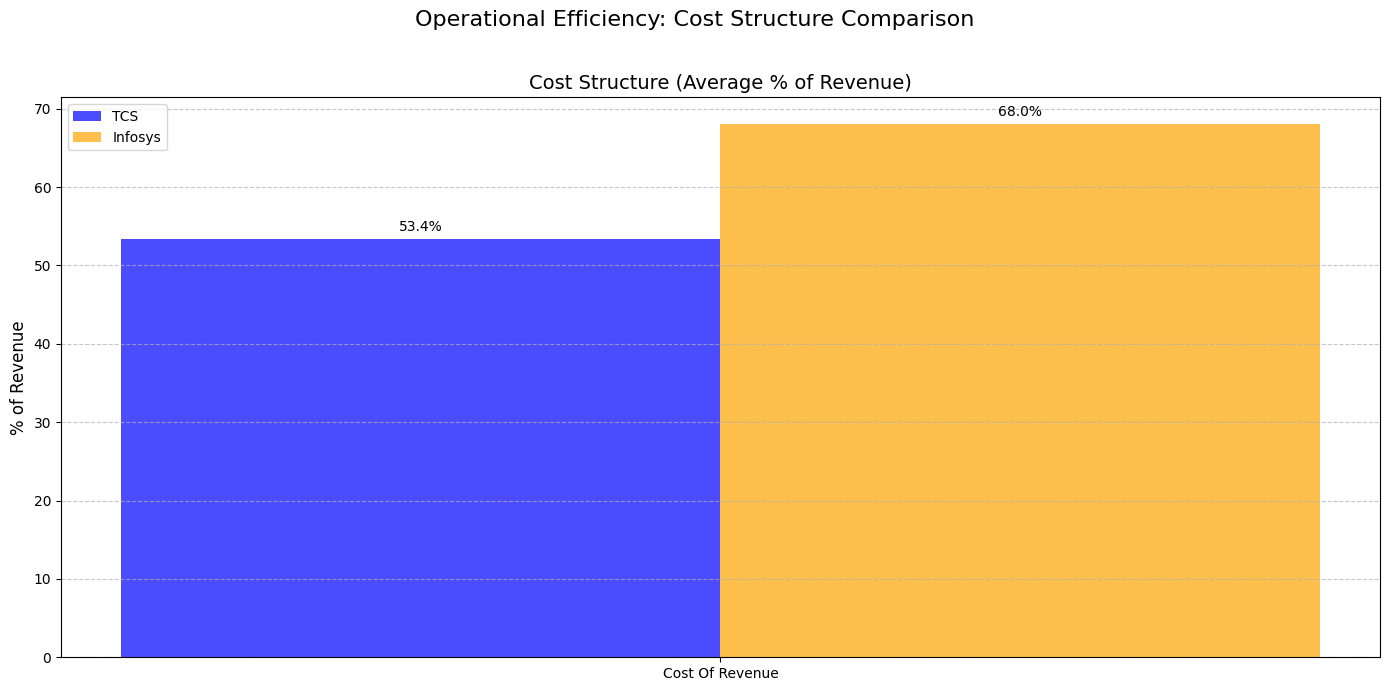


Comparing Capital Structure Between Companies...
Insufficient metrics available for capital structure comparison


In [19]:
def compare_operational_efficiency(tcs_cs_income, infy_cs_income):
    """Compare operational efficiency metrics between companies"""
    fig, ax = plt.subplots(figsize=(14, 7))
    fig.suptitle('Operational Efficiency: Cost Structure Comparison', fontsize=16)
    
    metrics = ['Cost Of Revenue', 'Operating Expenses']
    metrics = [m for m in metrics if m in tcs_cs_income.index and m in infy_cs_income.index]
    
    if not metrics:
        print("Insufficient metrics available for operational efficiency comparison")
        return
    
    # Calculate average values across years
    tcs_values = [tcs_cs_income.loc[m].mean() for m in metrics]
    infy_values = [infy_cs_income.loc[m].mean() for m in metrics]
    
    # Set bar positions
    x = np.arange(len(metrics))
    width = 0.35
    
    # Create bars
    ax.bar(x - width/2, tcs_values, width, label='TCS', color='blue', alpha=0.7)
    ax.bar(x + width/2, infy_values, width, label='Infosys', color='orange', alpha=0.7)
    
    # Add labels and formatting
    ax.set_ylabel('% of Revenue', fontsize=12)
    ax.set_title('Cost Structure (Average % of Revenue)', fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels(metrics)
    ax.legend()
    
    # Add value labels on bars
    for i, v in enumerate(tcs_values):
        ax.text(i - width/2, v + 1, f'{v:.1f}%', ha='center', fontsize=10)
    
    for i, v in enumerate(infy_values):
        ax.text(i + width/2, v + 1, f'{v:.1f}%', ha='center', fontsize=10)
    
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Create a function to compare capital structure between companies
def compare_capital_structure(tcs_cs_bs, infy_cs_bs):
    """Compare capital structure metrics between companies"""
    # Define metrics for capital structure analysis
    metrics = ['Total Current Liabilities', 'Total Non Current Liabilities', 'Stockholders Equity']
    metrics = [m for m in metrics if m in tcs_cs_bs.index and m in infy_cs_bs.index]
    
    if len(metrics) < 2:
        print("Insufficient metrics available for capital structure comparison")
        return
    
    # Calculate average values across years
    tcs_values = [tcs_cs_bs.loc[m].mean() for m in metrics]
    infy_values = [infy_cs_bs.loc[m].mean() for m in metrics]
    
    # Create pie charts for both companies - removing the redundant figure creation
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    fig.suptitle('Capital Structure Comparison (% of Total Assets)', fontsize=16)
    
    # TCS capital structure
    ax1.pie(tcs_values, labels=metrics, autopct='%1.1f%%', startangle=90,
            colors=['#ff9999','#66b3ff','#99ff99'])
    ax1.set_title('TCS Average Capital Structure', fontsize=14)
    
    # Infosys capital structure
    ax2.pie(infy_values, labels=metrics, autopct='%1.1f%%', startangle=90,
            colors=['#ff9999','#66b3ff','#99ff99'])
    ax2.set_title('Infosys Average Capital Structure', fontsize=14)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Run these additional comparisons
print("\nComparing Operational Efficiency Between Companies...")
compare_operational_efficiency(tcs_cs_income, infy_cs_income)

print("\nComparing Capital Structure Between Companies...")
compare_capital_structure(tcs_cs_bs, infy_cs_bs)

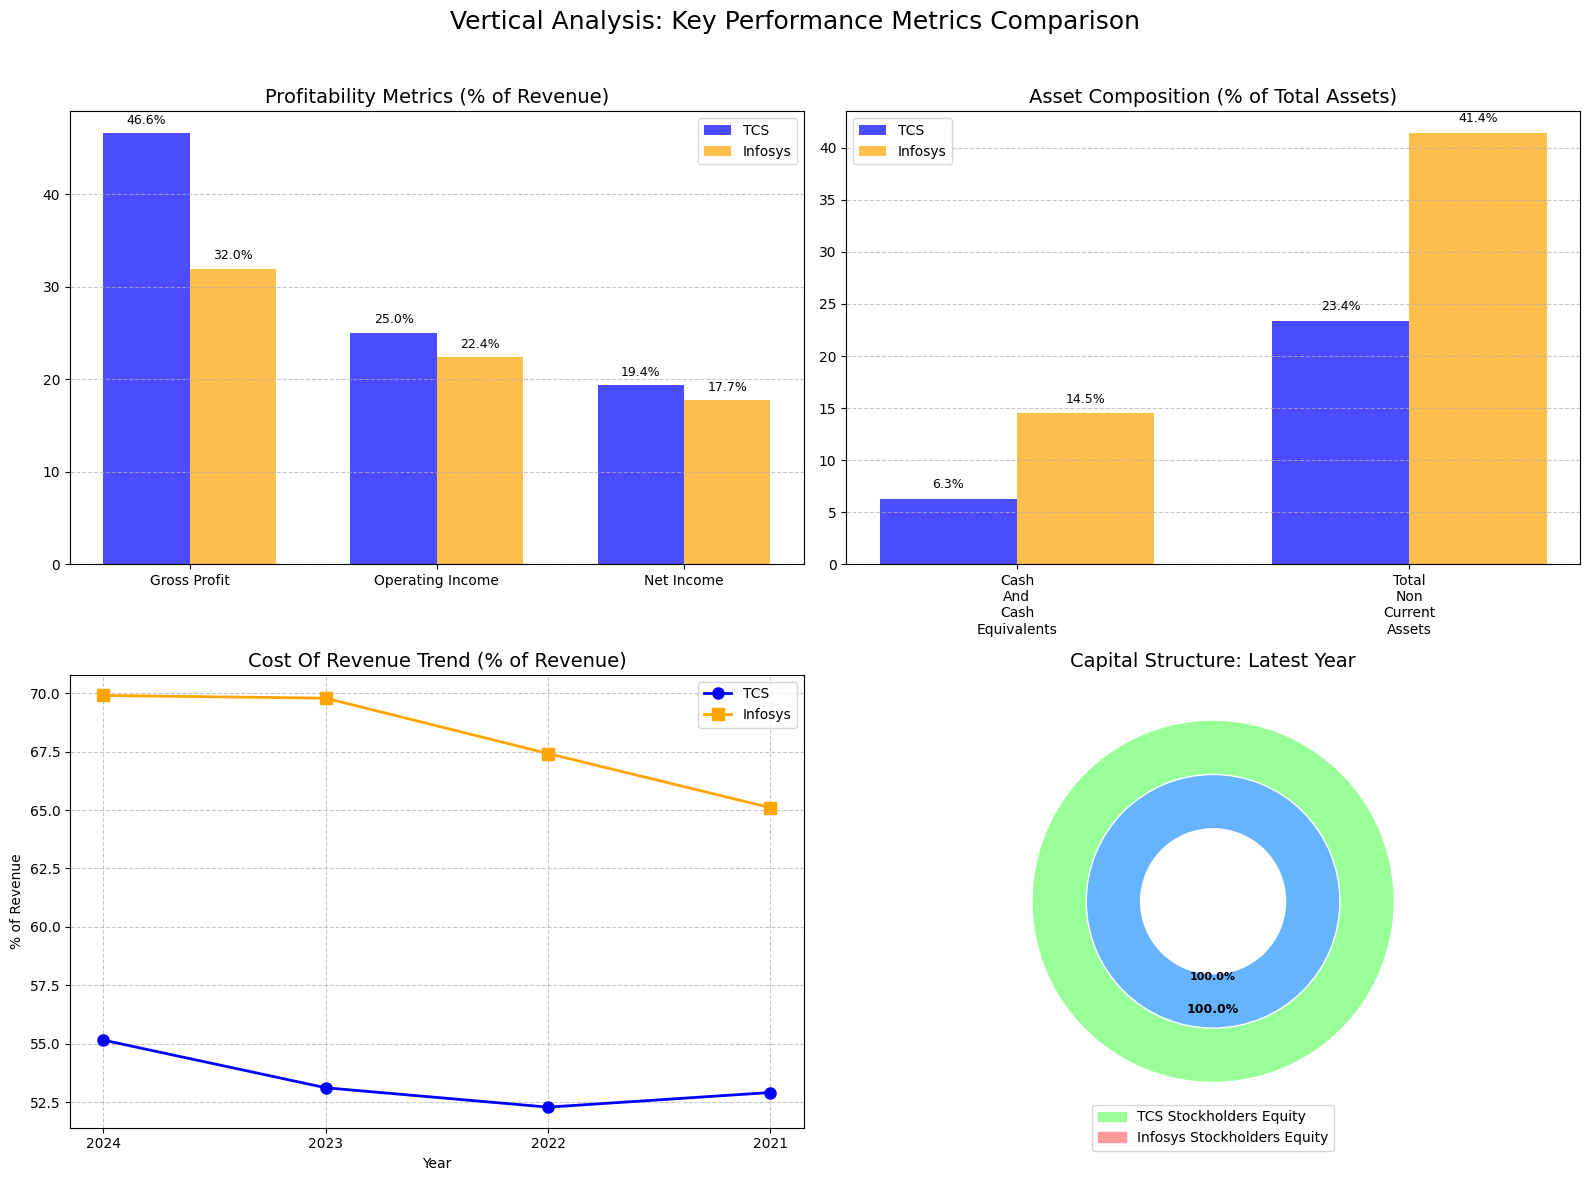


--- KEY INSIGHTS FROM VERTICAL ANALYSIS ---
1. Profitability: TCS average net profit margin is 19.4% of revenue
   while Infosys average net profit margin is 17.7% of revenue
3. Financial Leverage: TCS equity financing represents 63.5% of total assets
   while Infosys equity financing represents 64.5% of total assets


In [20]:
def create_summary_dashboard(tcs_cs_income, infy_cs_income, tcs_cs_bs, infy_cs_bs):
    """Create a summary dashboard highlighting key vertical analysis insights"""
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Vertical Analysis: Key Performance Metrics Comparison', fontsize=18)
    
    # 1. Profitability Comparison (top left)
    profitability_metrics = ['Gross Profit', 'Operating Income', 'Net Income']
    available_metrics = [m for m in profitability_metrics if m in tcs_cs_income.index and m in infy_cs_income.index]
    
    if available_metrics:
        # Calculate average values
        tcs_values = [tcs_cs_income.loc[m].mean() for m in available_metrics]
        infy_values = [infy_cs_income.loc[m].mean() for m in available_metrics]
        
        x = np.arange(len(available_metrics))
        width = 0.35
        
        ax1.bar(x - width/2, tcs_values, width, label='TCS', color='blue', alpha=0.7)
        ax1.bar(x + width/2, infy_values, width, label='Infosys', color='orange', alpha=0.7)
        
        ax1.set_title('Profitability Metrics (% of Revenue)', fontsize=14)
        ax1.set_xticks(x)
        ax1.set_xticklabels(available_metrics)
        ax1.legend()
        ax1.grid(axis='y', linestyle='--', alpha=0.7)
        
        # Add value labels
        for i, v in enumerate(tcs_values):
            ax1.text(i - width/2, v + 1, f'{v:.1f}%', ha='center', fontsize=9)
        for i, v in enumerate(infy_values):
            ax1.text(i + width/2, v + 1, f'{v:.1f}%', ha='center', fontsize=9)
    
    # 2. Asset Composition (top right)
    asset_metrics = ['Cash And Cash Equivalents', 'Total Current Assets', 'Total Non Current Assets']
    available_asset_metrics = [m for m in asset_metrics if m in tcs_cs_bs.index and m in infy_cs_bs.index]
    
    if available_asset_metrics:
        # Calculate average values
        tcs_values = [tcs_cs_bs.loc[m].mean() for m in available_asset_metrics]
        infy_values = [infy_cs_bs.loc[m].mean() for m in available_asset_metrics]
        
        x = np.arange(len(available_asset_metrics))
        width = 0.35
        
        ax2.bar(x - width/2, tcs_values, width, label='TCS', color='blue', alpha=0.7)
        ax2.bar(x + width/2, infy_values, width, label='Infosys', color='orange', alpha=0.7)
        
        ax2.set_title('Asset Composition (% of Total Assets)', fontsize=14)
        ax2.set_xticks(x)
        ax2.set_xticklabels([m.replace(' ', '\n') for m in available_asset_metrics])
        ax2.legend()
        ax2.grid(axis='y', linestyle='--', alpha=0.7)
        
        # Add value labels
        for i, v in enumerate(tcs_values):
            ax2.text(i - width/2, v + 1, f'{v:.1f}%', ha='center', fontsize=9)
        for i, v in enumerate(infy_values):
            ax2.text(i + width/2, v + 1, f'{v:.1f}%', ha='center', fontsize=9)
    
    # 3. Cost Structure Trend (bottom left)
    cost_metric = 'Cost Of Revenue' if 'Cost Of Revenue' in tcs_cs_income.index else None
    
    if cost_metric:
        years_tcs = [date.strftime('%Y') for date in tcs_cs_income.columns]
        years_infy = [date.strftime('%Y') for date in infy_cs_income.columns]
        
        ax3.plot(years_tcs, tcs_cs_income.loc[cost_metric].values, 'b-o', linewidth=2, markersize=8, label='TCS')
        ax3.plot(years_infy, infy_cs_income.loc[cost_metric].values, 'orange', marker='s', linewidth=2, markersize=8, label='Infosys')
        
        ax3.set_title(f'{cost_metric} Trend (% of Revenue)', fontsize=14)
        ax3.set_xlabel('Year')
        ax3.set_ylabel('% of Revenue')
        ax3.grid(True, linestyle='--', alpha=0.7)
        ax3.legend()
    
    # 4. Capital Structure (bottom right) 
    capital_metrics = ['Stockholders Equity', 'Total Liabilities']
    available_capital_metrics = [m for m in capital_metrics if m in tcs_cs_bs.index and m in infy_cs_bs.index]
    
    if available_capital_metrics:
        # Use most recent year for capital structure
        tcs_latest = tcs_cs_bs.columns[-1]
        infy_latest = infy_cs_bs.columns[-1]
        
        # Get values for most recent year
        tcs_values = [tcs_cs_bs.loc[m, tcs_latest] for m in available_capital_metrics]
        infy_values = [infy_cs_bs.loc[m, infy_latest] for m in available_capital_metrics]
        
        # Create pie charts within the subplot
        # For TCS
        wedges, texts, autotexts = ax4.pie(tcs_values, labels=None,
                                          autopct='%1.1f%%', startangle=90,
                                          colors=['#99ff99', '#ff9999'], 
                                          wedgeprops={'width': 0.5, 'edgecolor': 'w'})
        
        # For Infosys - inner circle
        wedges2, texts2, autotexts2 = ax4.pie(infy_values, labels=None,
                                             autopct='%1.1f%%', startangle=90,
                                             colors=['#66b3ff', '#ffcc99'], 
                                             radius=0.7, wedgeprops={'width': 0.3, 'edgecolor': 'w'})
        
        # Adjust text properties
        plt.setp(autotexts, size=9, weight="bold")
        plt.setp(autotexts2, size=8, weight="bold")
        
        ax4.set_title('Capital Structure: Latest Year', fontsize=14)
        
        # Create custom legend
        labels = [f'TCS {m}' for m in available_capital_metrics] + [f'Infosys {m}' for m in available_capital_metrics]
        colors = ['#99ff99', '#ff9999', '#66b3ff', '#ffcc99']
        handles = [plt.Rectangle((0,0),1,1, color=colors[i]) for i in range(len(labels))]
        ax4.legend(handles, labels, loc="center", bbox_to_anchor=(0.5, 0))
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
    
    # Print key insights
    print("\n--- KEY INSIGHTS FROM VERTICAL ANALYSIS ---")
    if 'Net Income' in tcs_cs_income.index:
        print(f"1. Profitability: TCS average net profit margin is {tcs_cs_income.loc['Net Income'].mean():.1f}% of revenue")
    if 'Net Income' in infy_cs_income.index:
        print(f"   while Infosys average net profit margin is {infy_cs_income.loc['Net Income'].mean():.1f}% of revenue")
    
    if 'Total Current Assets' in tcs_cs_bs.index:
        print(f"2. Liquidity: TCS current assets represent {tcs_cs_bs.loc['Total Current Assets'].mean():.1f}% of total assets")
    if 'Total Current Assets' in infy_cs_bs.index:
        print(f"   while Infosys current assets represent {infy_cs_bs.loc['Total Current Assets'].mean():.1f}% of total assets")
    
    if 'Stockholders Equity' in tcs_cs_bs.index:
        print(f"3. Financial Leverage: TCS equity financing represents {tcs_cs_bs.loc['Stockholders Equity'].mean():.1f}% of total assets")
    if 'Stockholders Equity' in infy_cs_bs.index:
        print(f"   while Infosys equity financing represents {infy_cs_bs.loc['Stockholders Equity'].mean():.1f}% of total assets")

# Create the summary dashboard
create_summary_dashboard(tcs_cs_income, infy_cs_income, tcs_cs_bs, infy_cs_bs)

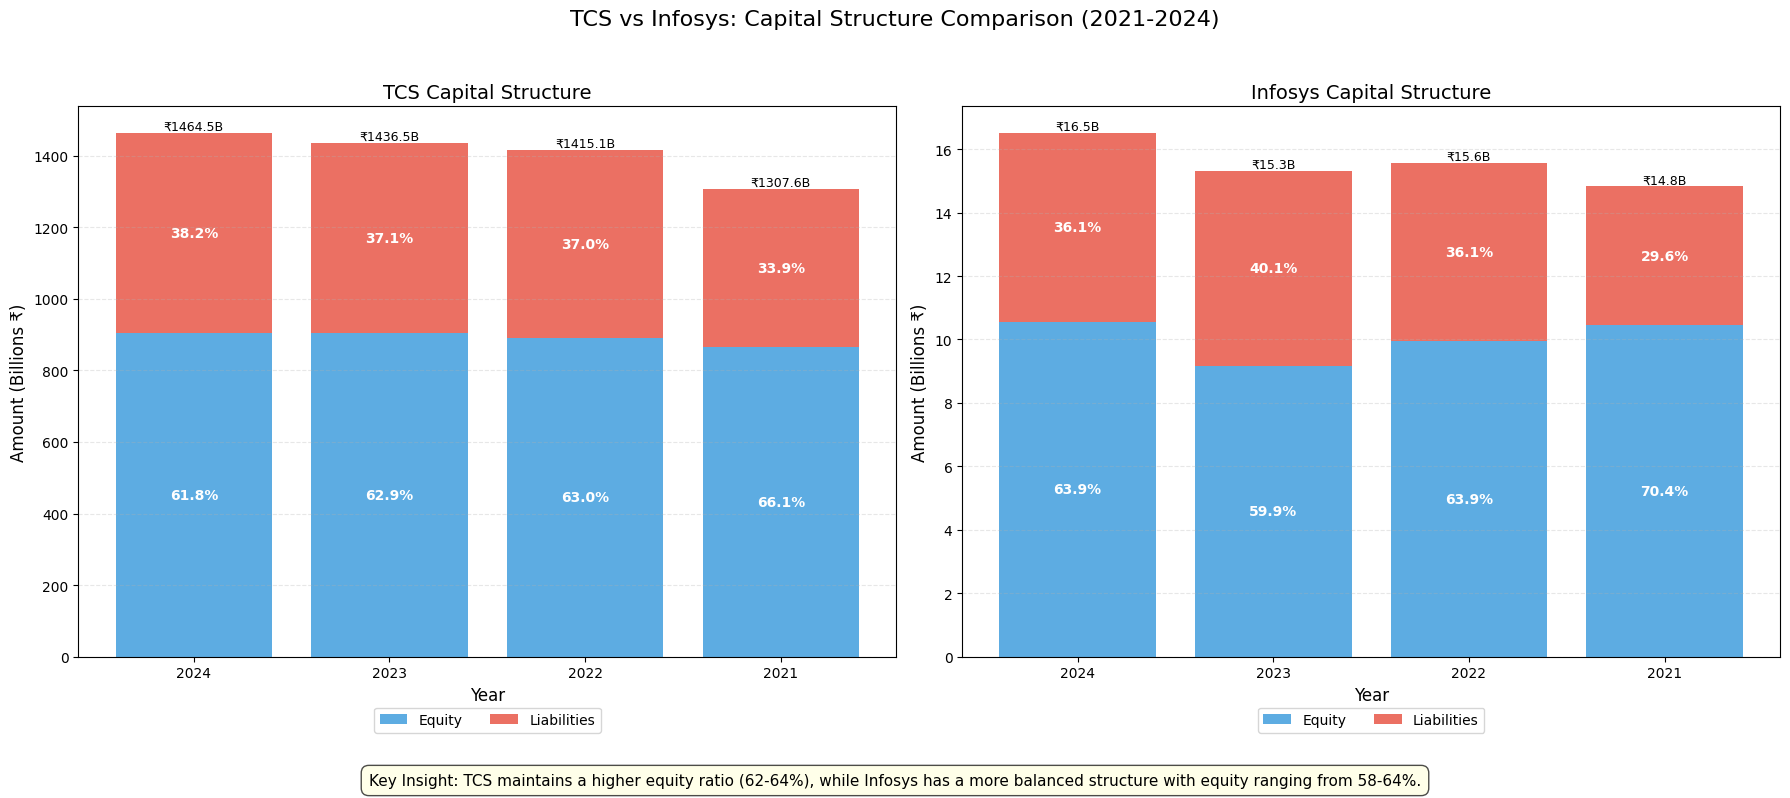

In [21]:
# Create a function to visualize and compare capital structure for TCS and Infosys
def compare_capital_structures():
    """Compare the capital structure (equity vs debt) for TCS and Infosys over time"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
    fig.suptitle('TCS vs Infosys: Capital Structure Comparison (2021-2024)', fontsize=16)
    
    # Extract years for x-axis
    years = [year.strftime('%Y') for year in tcs_equity.index]
    
    # TCS Capital Structure (left subplot)
    # Create stacked bar chart with equity and liabilities
    tcs_equities = tcs_equity.values
    tcs_liabs = tcs_liabilities.values
    tcs_totals = tcs_equities + tcs_liabs
    
    # Calculate percentages for annotations
    tcs_equity_pcts = (tcs_equities / tcs_totals) * 100
    tcs_liab_pcts = (tcs_liabs / tcs_totals) * 100
    
    # Create stacked bars
    ax1.bar(years, tcs_equities, label='Equity', color='#3498db', alpha=0.8)
    ax1.bar(years, tcs_liabs, bottom=tcs_equities, label='Liabilities', color='#e74c3c', alpha=0.8)
    
    # Add percentage annotations
    for i, year in enumerate(years):
        # Equity percentage (middle of equity bar)
        ax1.annotate(f'{tcs_equity_pcts[i]:.1f}%', 
                     xy=(i, tcs_equities[i]/2), 
                     ha='center', va='center', 
                     color='white', fontweight='bold')
        
        # Liabilities percentage (middle of liabilities bar)
        ax1.annotate(f'{tcs_liab_pcts[i]:.1f}%', 
                     xy=(i, tcs_equities[i] + tcs_liabs[i]/2), 
                     ha='center', va='center', 
                     color='white', fontweight='bold')
                     
        # Total value at top
        ax1.annotate(f'₹{tcs_totals[i]:.1f}B', 
                     xy=(i, tcs_totals[i]), 
                     ha='center', va='bottom',
                     fontsize=9)
    
    # Infosys Capital Structure (right subplot)
    # Get Infosys equity and liabilities data
    infy_equity = infy_bs_data.loc['Stockholders Equity'] / 1e9  # Convert to billions
    infy_liabs = total_liabilities  # Already in billions
    infy_totals = infy_equity.values + infy_liabs.values
    
    # Calculate percentages for annotations
    infy_equity_pcts = (infy_equity.values / infy_totals) * 100
    infy_liab_pcts = (infy_liabs.values / infy_totals) * 100
    
    # Create stacked bars
    ax2.bar(years, infy_equity.values, label='Equity', color='#3498db', alpha=0.8)
    ax2.bar(years, infy_liabs.values, bottom=infy_equity.values, label='Liabilities', color='#e74c3c', alpha=0.8)
    
    # Add percentage annotations
    for i, year in enumerate(years):
        # Equity percentage (middle of equity bar)
        ax2.annotate(f'{infy_equity_pcts[i]:.1f}%', 
                     xy=(i, infy_equity.values[i]/2), 
                     ha='center', va='center', 
                     color='white', fontweight='bold')
        
        # Liabilities percentage (middle of liabilities bar)
        ax2.annotate(f'{infy_liab_pcts[i]:.1f}%', 
                     xy=(i, infy_equity.values[i] + infy_liabs.values[i]/2), 
                     ha='center', va='center', 
                     color='white', fontweight='bold')
                     
        # Total value at top
        ax2.annotate(f'₹{infy_totals[i]:.1f}B', 
                     xy=(i, infy_totals[i]), 
                     ha='center', va='bottom',
                     fontsize=9)
    
    # Customize TCS subplot
    ax1.set_title('TCS Capital Structure', fontsize=14)
    ax1.set_xlabel('Year', fontsize=12)
    ax1.set_ylabel('Amount (Billions ₹)', fontsize=12)
    ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), frameon=True, ncol=2)
    ax1.grid(axis='y', linestyle='--', alpha=0.3)
    
    # Customize Infosys subplot
    ax2.set_title('Infosys Capital Structure', fontsize=14)
    ax2.set_xlabel('Year', fontsize=12)
    ax2.set_ylabel('Amount (Billions ₹)', fontsize=12)
    ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), frameon=True, ncol=2)
    ax2.grid(axis='y', linestyle='--', alpha=0.3)
    
    # Add insights
    plt.figtext(0.5, 0.01, 
                "Key Insight: TCS maintains a higher equity ratio (62-64%), while Infosys has a more balanced structure with equity ranging from 58-64%.",
                ha='center', fontsize=11, bbox=dict(boxstyle='round,pad=0.5', facecolor='lightyellow', alpha=0.7))
    
    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.show()

# Execute the function
compare_capital_structures()

In [22]:
# Calculate profitability ratios for TCS and Infosys from 2021 to 2024
def calculate_profitability_ratios_table():
    """Calculate profitability ratios for both companies from 2021 to 2024"""
    
    # Create a DataFrame to store results
    ratios_df = pd.DataFrame(
        index=['Gross Margin', 'Operating Margin', 'Net Margin', 'ROE', 'ROA'],
        columns=['Formula']
    )
    
    # Add formulas
    ratios_df.loc['Gross Margin', 'Formula'] = 'Gross Profit / Revenue'
    ratios_df.loc['Operating Margin', 'Formula'] = 'Operating Income / Revenue'
    ratios_df.loc['Net Margin', 'Formula'] = 'Net Income / Revenue'
    ratios_df.loc['ROE', 'Formula'] = 'Net Income / Shareholders\' Equity'
    ratios_df.loc['ROA', 'Formula'] = 'Net Income / Total Assets'
    
    # Process each company's data
    for company, income_df, bs_df in [('TCS', tcs_income_data, tcs_bs_data), 
                                     ('Infosys', infy_income_data, infy_bs_data)]:
        # Find the years available in the data
        years = [col for col in income_df.columns if hasattr(col, 'year') and 2021 <= col.year <= 2024]
        years.sort()  # Ensure chronological order
        
        # Calculate ratios for each year
        for year_col in years:
            year_str = year_col.strftime('%Y')
            col_name = f'{company} {year_str}'
            
            # Calculate Gross Margin
            if 'Gross Profit' in income_df.index and 'Total Revenue' in income_df.index:
                try:
                    gross_profit = income_df.loc['Gross Profit', year_col]
                    revenue = income_df.loc['Total Revenue', year_col]
                    if revenue != 0:
                        ratios_df.loc['Gross Margin', col_name] = f"{(gross_profit/revenue)*100:.2f}%"
                    else:
                        ratios_df.loc['Gross Margin', col_name] = "N/A"
                except:
                    ratios_df.loc['Gross Margin', col_name] = "N/A"
            
            # Calculate Operating Margin
            if 'Operating Income' in income_df.index and 'Total Revenue' in income_df.index:
                try:
                    operating_income = income_df.loc['Operating Income', year_col]
                    revenue = income_df.loc['Total Revenue', year_col]
                    if revenue != 0:
                        ratios_df.loc['Operating Margin', col_name] = f"{(operating_income/revenue)*100:.2f}%"
                    else:
                        ratios_df.loc['Operating Margin', col_name] = "N/A"
                except:
                    ratios_df.loc['Operating Margin', col_name] = "N/A"
            
            # Calculate Net Margin
            if 'Net Income' in income_df.index and 'Total Revenue' in income_df.index:
                try:
                    net_income = income_df.loc['Net Income', year_col]
                    revenue = income_df.loc['Total Revenue', year_col]
                    if revenue != 0:
                        ratios_df.loc['Net Margin', col_name] = f"{(net_income/revenue)*100:.2f}%"
                    else:
                        ratios_df.loc['Net Margin', col_name] = "N/A"
                except:
                    ratios_df.loc['Net Margin', col_name] = "N/A"
            
            # Calculate ROE
            if 'Net Income' in income_df.index:
                try:
                    net_income = income_df.loc['Net Income', year_col]
                    # Try different naming conventions for equity
                    for equity_field in ['Stockholders Equity', 'Total Stockholder Equity', 'Total Equity']:
                        if equity_field in bs_df.index and year_col in bs_df.columns:
                            equity = bs_df.loc[equity_field, year_col]
                            if equity != 0:
                                ratios_df.loc['ROE', col_name] = f"{(net_income/equity)*100:.2f}%"
                                break
                    else:
                        ratios_df.loc['ROE', col_name] = "N/A"
                except:
                    ratios_df.loc['ROE', col_name] = "N/A"
            
            # Calculate ROA
            if 'Net Income' in income_df.index and 'Total Assets' in bs_df.index:
                try:
                    net_income = income_df.loc['Net Income', year_col]
                    assets = bs_df.loc['Total Assets', year_col]
                    if assets != 0:
                        ratios_df.loc['ROA', col_name] = f"{(net_income/assets)*100:.2f}%"
                    else:
                        ratios_df.loc['ROA', col_name] = "N/A"
                except:
                    ratios_df.loc['ROA', col_name] = "N/A"
    
    # Reorder columns to ensure proper sequence (Formula, then years in order)
    column_order = ['Formula']
    for year in ['2021', '2022', '2023', '2024']:
        for company in ['TCS', 'Infosys']:
            col = f'{company} {year}'
            if col in ratios_df.columns:
                column_order.append(col)
    
    return ratios_df[column_order]

# Calculate and display the KPI table
profitability_table = calculate_profitability_ratios_table()
print("\nKEY PERFORMANCE INDICATORS (KPIs) - PROFITABILITY RATIOS (2021-2024)")
print("="*100)
print(profitability_table)


KEY PERFORMANCE INDICATORS (KPIs) - PROFITABILITY RATIOS (2021-2024)
                                            Formula TCS 2021 Infosys 2021  \
Gross Margin                 Gross Profit / Revenue   47.08%       34.90%   
Operating Margin         Operating Income / Revenue   26.00%       24.52%   
Net Margin                     Net Income / Revenue   19.75%       19.27%   
ROE               Net Income / Shareholders' Equity   37.52%       25.02%   
ROA                       Net Income / Total Assets   24.80%       17.63%   

                 TCS 2022 Infosys 2022 TCS 2023 Infosys 2023 TCS 2024  \
Gross Margin       47.71%       32.59%   46.88%       30.22%   44.84%   
Operating Margin   25.34%       23.02%   24.12%       21.19%   24.67%   
Net Margin         19.99%       18.17%   18.69%       16.37%   19.06%   
ROE                43.00%       29.81%   46.61%       32.50%   50.73%   
ROA                27.08%       19.05%   29.34%       19.47%   31.35%   

                 Infosys 202


TCS Asset Turnover Ratio:
   Year  Revenue  Beginning Assets  Ending Assets  Average Assets  \
0  2022  1917.54           1307.59        1415.14        1361.365   
1  2023  2254.58           1415.14        1436.51        1425.825   
2  2024  2408.93           1436.51        1464.49        1450.500   

   Asset Turnover  
0        1.408542  
1        1.581246  
2        1.660758  

Infosys Asset Turnover Ratio:
   Year  Revenue  Beginning Assets  Ending Assets  Average Assets  \
0  2022   16.311            14.825         15.555         15.1900   
1  2023   18.212            15.555         15.312         15.4335   
2  2024   18.562            15.312         16.523         15.9175   

   Asset Turnover  
0        1.073799  
1        1.180030  
2        1.166138  


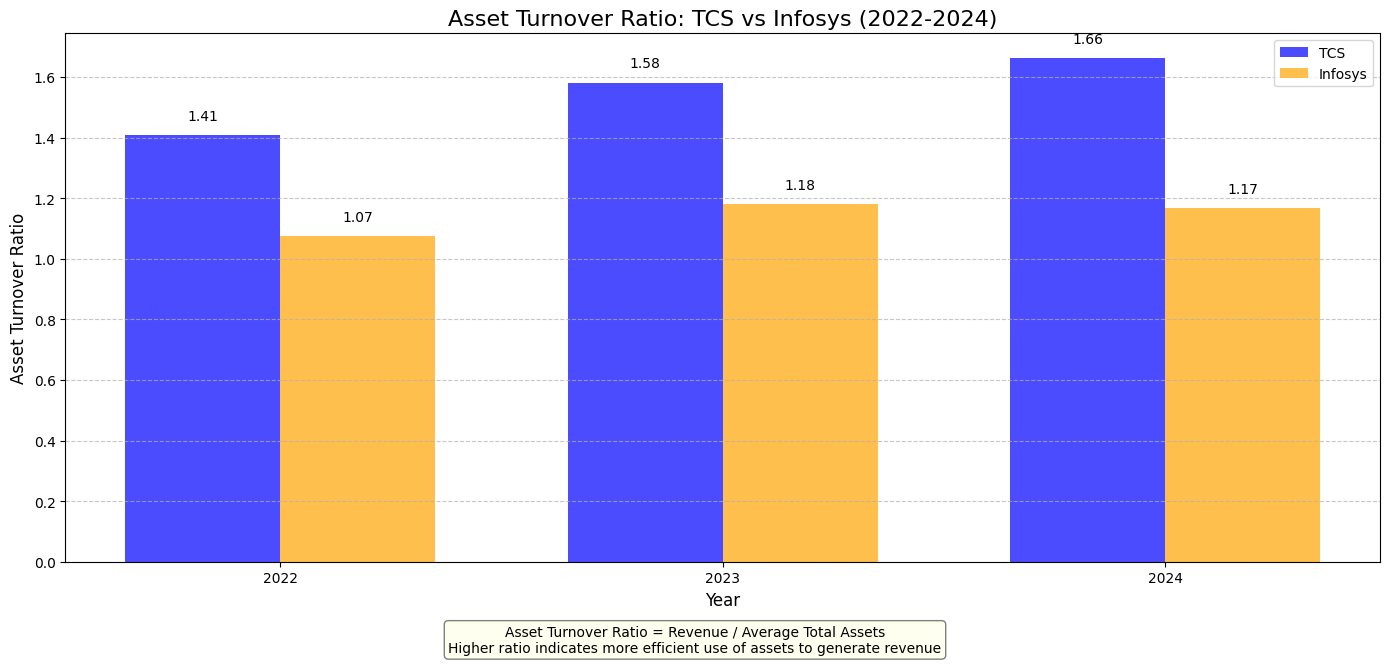


Asset Turnover Ratio Interpretation:
-------------------------------------
1. Higher ratio indicates more efficient use of assets to generate revenue.
2. TCS average asset turnover: 1.55
3. Infosys average asset turnover: 1.14
4. TCS is more efficient at using its assets to generate revenue.

Year-over-Year Analysis:
------------------------
2022 to 2023:
- TCS: 12.26% change in asset turnover
- Infosys: 9.89% change in asset turnover
2023 to 2024:
- TCS: 5.03% change in asset turnover
- Infosys: -1.18% change in asset turnover


In [33]:
def calculate_asset_turnover(income_data, bs_data):
    """
    Calculate Asset Turnover Ratio = Revenue / Average Total Assets
    Returns a DataFrame with yearly asset turnover ratios
    """
    asset_turnover = pd.DataFrame(columns=['Year', 'Revenue', 'Beginning Assets', 
                                          'Ending Assets', 'Average Assets', 'Asset Turnover'])
    
    # Get all years in chronological order
    years = sorted([col for col in income_data.columns if hasattr(col, 'year')])
    
    for i, year in enumerate(years):
        if i == 0:  # Skip first year as we need prior year data for average assets
            continue
            
        # Get current year and previous year
        current_year = year
        prev_year = years[i-1]
        year_str = current_year.strftime('%Y')
        
        # Extract revenue and assets data
        revenue = income_data.loc['Total Revenue', current_year]
        beginning_assets = bs_data.loc['Total Assets', prev_year]
        ending_assets = bs_data.loc['Total Assets', current_year]
        
        # Calculate average assets and asset turnover
        avg_assets = (beginning_assets + ending_assets) / 2
        turnover = revenue / avg_assets
        
        # Add to dataframe
        asset_turnover.loc[i-1] = [year_str, revenue/1e9, beginning_assets/1e9, 
                                   ending_assets/1e9, avg_assets/1e9, turnover]
    
    return asset_turnover

# Calculate asset turnover for both companies
tcs_asset_turnover = calculate_asset_turnover(tcs_income_data, tcs_bs_data)
infy_asset_turnover = calculate_asset_turnover(infy_income_data, infy_bs_data)

# Display the results
print("\nTCS Asset Turnover Ratio:")
print(tcs_asset_turnover)
print("\nInfosys Asset Turnover Ratio:")
print(infy_asset_turnover)

# Visualize the comparison
plt.figure(figsize=(14, 7))

# Create bar chart for asset turnover comparison
x = np.arange(len(tcs_asset_turnover['Year']))
width = 0.35

plt.bar(x - width/2, tcs_asset_turnover['Asset Turnover'], width, label='TCS', color='blue', alpha=0.7)
plt.bar(x + width/2, infy_asset_turnover['Asset Turnover'], width, label='Infosys', color='orange', alpha=0.7)

# Add labels and values on bars
for i, v in enumerate(tcs_asset_turnover['Asset Turnover']):
    plt.text(i - width/2, v + 0.05, f'{v:.2f}', ha='center', fontsize=10)
    
for i, v in enumerate(infy_asset_turnover['Asset Turnover']):
    plt.text(i + width/2, v + 0.05, f'{v:.2f}', ha='center', fontsize=10)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Asset Turnover Ratio', fontsize=12)
plt.title('Asset Turnover Ratio: TCS vs Infosys (2022-2024)', fontsize=16)
plt.xticks(x, tcs_asset_turnover['Year'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

plt.figtext(0.5, 0.01, 
            "Asset Turnover Ratio = Revenue / Average Total Assets\nHigher ratio indicates more efficient use of assets to generate revenue",
            ha='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.5))

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

# Add interpretation
print("\nAsset Turnover Ratio Interpretation:")
print("-------------------------------------")
print("1. Higher ratio indicates more efficient use of assets to generate revenue.")
print("2. TCS average asset turnover: {:.2f}".format(tcs_asset_turnover['Asset Turnover'].mean()))
print("3. Infosys average asset turnover: {:.2f}".format(infy_asset_turnover['Asset Turnover'].mean()))

if tcs_asset_turnover['Asset Turnover'].mean() > infy_asset_turnover['Asset Turnover'].mean():
    print("4. TCS is more efficient at using its assets to generate revenue.")
else:
    print("4. Infosys is more efficient at using its assets to generate revenue.")

# Add year-over-year analysis
print("\nYear-over-Year Analysis:")
print("------------------------")
for i in range(1, len(tcs_asset_turnover)):
    current_year = tcs_asset_turnover['Year'].iloc[i]
    prev_year = tcs_asset_turnover['Year'].iloc[i-1]
    
    tcs_change = ((tcs_asset_turnover['Asset Turnover'].iloc[i] / tcs_asset_turnover['Asset Turnover'].iloc[i-1]) - 1) * 100
    infy_change = ((infy_asset_turnover['Asset Turnover'].iloc[i] / infy_asset_turnover['Asset Turnover'].iloc[i-1]) - 1) * 100
    
    print(f"{prev_year} to {current_year}:")
    print(f"- TCS: {tcs_change:.2f}% change in asset turnover")
    print(f"- Infosys: {infy_change:.2f}% change in asset turnover")

Calculating Fixed Asset Turnover Ratio for TCS and Infosys (2021-2024)...

TCS Fixed Asset Turnover Ratio (using Net PPE):
   Year  Revenue  Beginning Fixed Assets  Ending Fixed Assets  \
0  2022  1917.54                  197.35               198.31   
1  2023  2254.58                  198.31               189.96   
2  2024  2408.93                  189.96               188.54   

   Average Fixed Assets  Fixed Asset Turnover  
0               197.830              9.692868  
1               194.135             11.613465  
2               189.250             12.728824  

Infosys Fixed Asset Turnover Ratio (using Net PPE):
   Year  Revenue  Beginning Fixed Assets  Ending Fixed Assets  \
0  2022   16.311                   2.519                2.429   
1  2023   18.212                   2.429                2.516   
2  2024   18.562                   2.516                2.323   

   Average Fixed Assets  Fixed Asset Turnover  
0                2.4740              6.592967  
1             

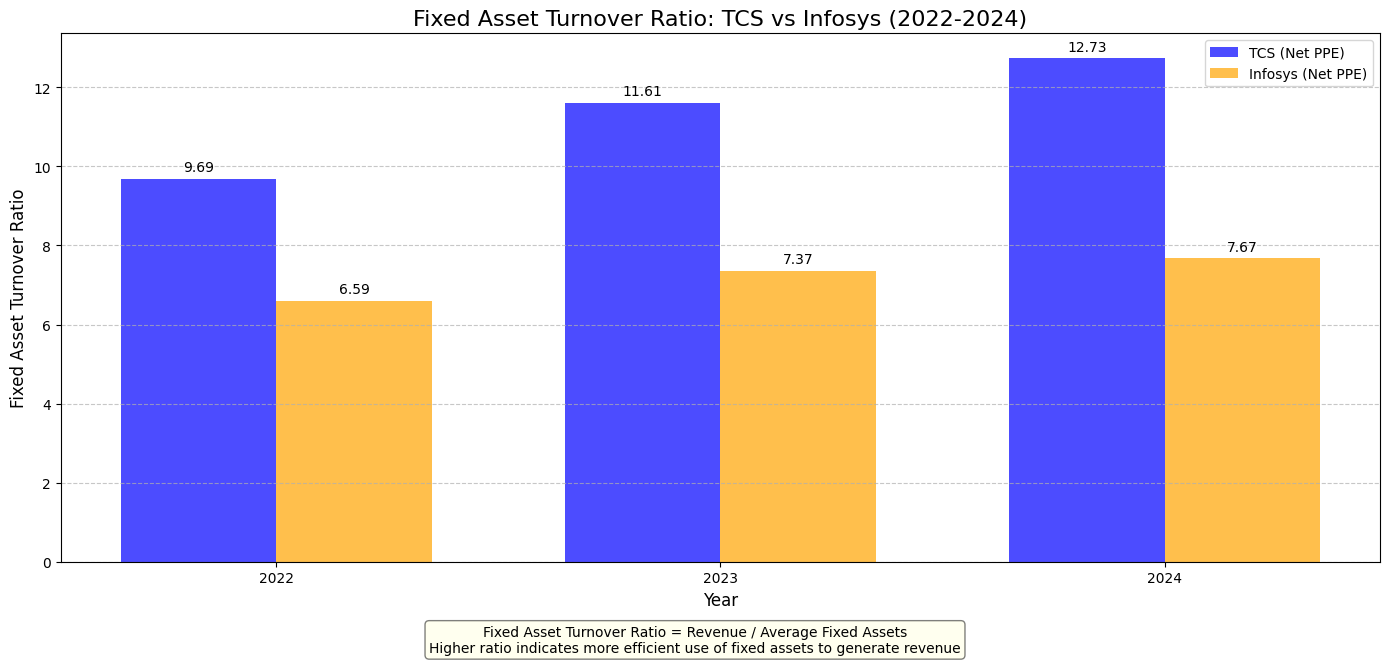


Fixed Asset Turnover Ratio Interpretation:
------------------------------------------
1. Higher ratio indicates more efficient use of fixed assets to generate revenue.
2. TCS average fixed asset turnover: 11.35
3. Infosys average fixed asset turnover: 7.21
4. TCS is more efficient at using its fixed assets to generate revenue.

Year-over-Year Analysis:
------------------------
2022 to 2023:
- TCS: 19.81% change in fixed asset turnover
- Infosys: 11.72% change in fixed asset turnover
2023 to 2024:
- TCS: 9.60% change in fixed asset turnover
- Infosys: 4.15% change in fixed asset turnover


In [34]:
def calculate_fixed_asset_turnover(income_data, bs_data):
    """
    Calculate Fixed Asset Turnover Ratio = Revenue / Average Fixed Assets
    Returns a DataFrame with yearly fixed asset turnover ratios
    """
    # Create a DataFrame to store results
    fixed_asset_turnover = pd.DataFrame(columns=['Year', 'Revenue', 'Beginning Fixed Assets', 
                                          'Ending Fixed Assets', 'Average Fixed Assets', 'Fixed Asset Turnover'])
    
    # Get all years in chronological order
    years = sorted([col for col in income_data.columns if hasattr(col, 'year')])
    
    # Try different field names for fixed assets that might be in the balance sheet
    fixed_asset_field = None
    potential_fields = [
        'Property Plant And Equipment', 
        'Net Property Plant And Equipment',
        'Property Plant Equipment Net',
        'Fixed Assets',
        'Net PPE'
    ]
    
    for field in potential_fields:
        if field in bs_data.index:
            fixed_asset_field = field
            break
    
    # If none of the common fields are found, use "Total Non Current Assets" as a fallback
    if fixed_asset_field is None:
        if 'Total Non Current Assets' in bs_data.index:
            fixed_asset_field = 'Total Non Current Assets'
            print(f"Note: Specific fixed asset account not found. Using '{fixed_asset_field}' as proxy.")
        else:
            print("Error: Could not find fixed assets in balance sheet data.")
            print("Available balance sheet accounts:")
            print(bs_data.index.tolist())
            return None, None
    
    # Calculate the ratios for each year
    for i, year in enumerate(years):
        if i == 0:  # Skip first year as we need prior year data for average fixed assets
            continue
            
        # Get current year and previous year
        current_year = year
        prev_year = years[i-1]
        year_str = current_year.strftime('%Y')
        
        # Extract revenue and fixed assets data
        revenue = income_data.loc['Total Revenue', current_year]
        beginning_fixed_assets = bs_data.loc[fixed_asset_field, prev_year]
        ending_fixed_assets = bs_data.loc[fixed_asset_field, current_year]
        
        # Calculate average fixed assets and turnover ratio
        avg_fixed_assets = (beginning_fixed_assets + ending_fixed_assets) / 2
        fixed_turnover = revenue / avg_fixed_assets
        
        # Add to dataframe (convert to billions for readability)
        fixed_asset_turnover.loc[i-1] = [
            year_str, 
            revenue/1e9, 
            beginning_fixed_assets/1e9, 
            ending_fixed_assets/1e9, 
            avg_fixed_assets/1e9, 
            fixed_turnover
        ]
    
    return fixed_asset_turnover, fixed_asset_field

# Calculate fixed asset turnover for both companies
print("Calculating Fixed Asset Turnover Ratio for TCS and Infosys (2021-2024)...")
tcs_fa_turnover, tcs_fa_field = calculate_fixed_asset_turnover(tcs_income_data, tcs_bs_data)
infy_fa_turnover, infy_fa_field = calculate_fixed_asset_turnover(infy_income_data, infy_bs_data)

# Display the results
if tcs_fa_turnover is not None:
    print(f"\nTCS Fixed Asset Turnover Ratio (using {tcs_fa_field}):")
    print(tcs_fa_turnover)

if infy_fa_turnover is not None:
    print(f"\nInfosys Fixed Asset Turnover Ratio (using {infy_fa_field}):")
    print(infy_fa_turnover)

# Visualize the comparison if both calculations are successful
if tcs_fa_turnover is not None and infy_fa_turnover is not None:
    plt.figure(figsize=(14, 7))
    
    # Create bar chart for fixed asset turnover comparison
    x = np.arange(len(tcs_fa_turnover['Year']))
    width = 0.35
    
    plt.bar(x - width/2, tcs_fa_turnover['Fixed Asset Turnover'], width, label=f'TCS ({tcs_fa_field})', color='blue', alpha=0.7)
    plt.bar(x + width/2, infy_fa_turnover['Fixed Asset Turnover'], width, label=f'Infosys ({infy_fa_field})', color='orange', alpha=0.7)
    
    # Add labels and values on bars
    for i, v in enumerate(tcs_fa_turnover['Fixed Asset Turnover']):
        plt.text(i - width/2, v + 0.2, f'{v:.2f}', ha='center', fontsize=10)
        
    for i, v in enumerate(infy_fa_turnover['Fixed Asset Turnover']):
        plt.text(i + width/2, v + 0.2, f'{v:.2f}', ha='center', fontsize=10)
    
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Fixed Asset Turnover Ratio', fontsize=12)
    plt.title(f'Fixed Asset Turnover Ratio: TCS vs Infosys (2022-2024)', fontsize=16)
    plt.xticks(x, tcs_fa_turnover['Year'])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    
    plt.figtext(0.5, 0.01, 
                "Fixed Asset Turnover Ratio = Revenue / Average Fixed Assets\nHigher ratio indicates more efficient use of fixed assets to generate revenue",
                ha='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.5))
    
    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.show()
    
    # Add interpretation
    print("\nFixed Asset Turnover Ratio Interpretation:")
    print("------------------------------------------")
    print("1. Higher ratio indicates more efficient use of fixed assets to generate revenue.")
    print(f"2. TCS average fixed asset turnover: {tcs_fa_turnover['Fixed Asset Turnover'].mean():.2f}")
    print(f"3. Infosys average fixed asset turnover: {infy_fa_turnover['Fixed Asset Turnover'].mean():.2f}")
    
    if tcs_fa_turnover['Fixed Asset Turnover'].mean() > infy_fa_turnover['Fixed Asset Turnover'].mean():
        print("4. TCS is more efficient at using its fixed assets to generate revenue.")
    else:
        print("4. Infosys is more efficient at using its fixed assets to generate revenue.")
    
    # Add year-over-year analysis
    print("\nYear-over-Year Analysis:")
    print("------------------------")
    for i in range(1, len(tcs_fa_turnover)):
        current_year = tcs_fa_turnover['Year'].iloc[i]
        prev_year = tcs_fa_turnover['Year'].iloc[i-1]
        
        tcs_change = ((tcs_fa_turnover['Fixed Asset Turnover'].iloc[i] / tcs_fa_turnover['Fixed Asset Turnover'].iloc[i-1]) - 1) * 100
        infy_change = ((infy_fa_turnover['Fixed Asset Turnover'].iloc[i] / infy_fa_turnover['Fixed Asset Turnover'].iloc[i-1]) - 1) * 100
        
        print(f"{prev_year} to {current_year}:")
        print(f"- TCS: {tcs_change:.2f}% change in fixed asset turnover")
        print(f"- Infosys: {infy_change:.2f}% change in fixed asset turnover")

Calculating Current Ratio for TCS and Infosys (2021-2024)...

TCS Current Ratio (using Current Assets / Current Liabilities):
   Year  Current Assets (₹B)  Current Liabilities (₹B)  Current Ratio
0  2021               992.80                    341.55       2.906749
1  2022              1083.10                    423.51       2.557437
2  2023              1102.70                    435.58       2.531567
3  2024              1129.84                    461.04       2.450633

Infosys Current Ratio (using Current Assets / Current Liabilities):
   Year  Current Assets (₹B)  Current Liabilities (₹B)  Current Ratio
0  2021                8.307                     3.264       2.545037
1  2022                8.865                     4.433       1.999774
2  2023                8.626                     4.769       1.808765
3  2024               10.722                     4.651       2.305311


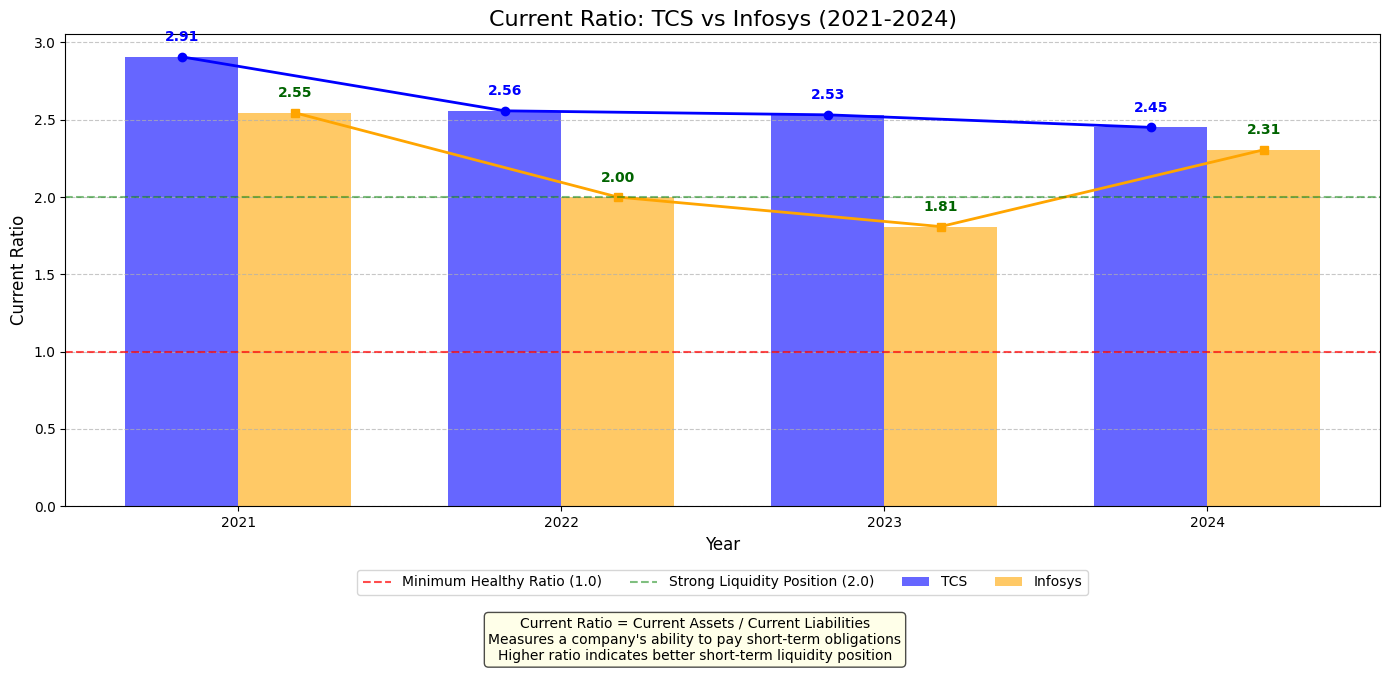


Year-over-Year Current Ratio Analysis:
   Year TCS Ratio TCS YoY Change Infosys Ratio Infosys YoY Change
0  2021      2.91            N/A          2.55                N/A
1  2022      2.56        -12.02%          2.00            -21.42%
2  2023      2.53         -1.01%          1.81             -9.55%
3  2024      2.45         -3.20%          2.31             27.45%

Current Ratio Interpretation:
-----------------------------
1. Current Ratio measures a company's ability to pay short-term obligations:
   • Ratio < 1.0: Potential liquidity issues
   • Ratio 1.0-1.5: Adequate liquidity
   • Ratio 1.5-2.0: Good liquidity position
   • Ratio > 2.0: Strong liquidity, but could indicate inefficient use of assets

2. TCS Average Current Ratio (2021-2024): 2.61
3. Infosys Average Current Ratio (2021-2024): 2.16

4. Comparative Analysis:
   • TCS maintains a stronger overall liquidity position than Infosys by 20.6%

5. Trend Analysis (2021 to 2024):
   • TCS shows a declining trend in liquidit

In [35]:
def calculate_current_ratio(bs_data):
    """
    Calculate Current Ratio = Current Assets / Current Liabilities
    Returns a DataFrame with yearly current ratios and the field names used
    """
    # Create a DataFrame to store results
    current_ratio = pd.DataFrame(columns=['Year', 'Current Assets (₹B)', 'Current Liabilities (₹B)', 'Current Ratio'])
    
    # Get all years in chronological order from 2021 to 2024
    years = sorted([col for col in bs_data.columns if hasattr(col, 'year') and 2021 <= col.year <= 2024])
    
    # Find the correct field names for current assets and liabilities
    current_assets_field = None
    if 'Total Current Assets' in bs_data.index:
        current_assets_field = 'Total Current Assets'
    elif 'Current Assets' in bs_data.index:
        current_assets_field = 'Current Assets'
    
    current_liab_field = None
    if 'Total Current Liabilities' in bs_data.index:
        current_liab_field = 'Total Current Liabilities'
    elif 'Current Liabilities' in bs_data.index:
        current_liab_field = 'Current Liabilities'
    
    # Verify we have the required fields
    if current_assets_field is None:
        print("Error: Could not find current assets field in balance sheet.")
        print("Available fields:")
        print(bs_data.index.tolist())
        return None, None, None
    
    if current_liab_field is None:
        print("Error: Could not find current liabilities field in balance sheet.")
        print("Available fields:")
        print(bs_data.index.tolist())
        return None, None, None
        
    # Calculate the ratios for each year
    for i, year in enumerate(years):
        year_str = year.strftime('%Y')
        
        try:
            # Extract current assets and current liabilities data
            current_assets = bs_data.loc[current_assets_field, year]
            current_liabilities = bs_data.loc[current_liab_field, year]
            
            # Calculate current ratio
            ratio = current_assets / current_liabilities
            
            # Add to dataframe (convert to billions for readability)
            current_ratio.loc[i] = [
                year_str, 
                current_assets/1e9, 
                current_liabilities/1e9, 
                ratio
            ]
        except Exception as e:
            print(f"Error calculating current ratio for {year_str}: {e}")
    
    return current_ratio, current_assets_field, current_liab_field

# Calculate current ratio for both companies
print("Calculating Current Ratio for TCS and Infosys (2021-2024)...")
tcs_current_ratio, tcs_ca_field, tcs_cl_field = calculate_current_ratio(tcs_bs_data)
infy_current_ratio, infy_ca_field, infy_cl_field = calculate_current_ratio(infy_bs_data)

# Display the results with field names
if tcs_current_ratio is not None:
    print(f"\nTCS Current Ratio (using {tcs_ca_field} / {tcs_cl_field}):")
    print(tcs_current_ratio)

if infy_current_ratio is not None:
    print(f"\nInfosys Current Ratio (using {infy_ca_field} / {infy_cl_field}):")
    print(infy_current_ratio)

# Visualize the comparison if both calculations are successful
if tcs_current_ratio is not None and infy_current_ratio is not None:
    plt.figure(figsize=(14, 7))
    
    # Create line chart for current ratio comparison
    years_tcs = tcs_current_ratio['Year'].tolist()
    years_infy = infy_current_ratio['Year'].tolist()
    
    # Plot both lines and bars for better visualization
    x_tcs = np.arange(len(years_tcs))
    x_infy = np.arange(len(years_infy))
    width = 0.35
    
    # Bar chart
    plt.bar(x_tcs - width/2, tcs_current_ratio['Current Ratio'], width, alpha=0.6, color='blue', label='TCS')
    plt.bar(x_infy + width/2, infy_current_ratio['Current Ratio'], width, alpha=0.6, color='orange', label='Infosys')
    
    # Add line overlay to emphasize trend
    plt.plot(x_tcs - width/2, tcs_current_ratio['Current Ratio'], 'b-o', linewidth=2)
    plt.plot(x_infy + width/2, infy_current_ratio['Current Ratio'], 'orange', marker='s', linewidth=2)
    
    # Add reference line at 1.0 (minimum healthy ratio)
    plt.axhline(y=1.0, color='r', linestyle='--', alpha=0.7, label='Minimum Healthy Ratio (1.0)')
    plt.axhline(y=2.0, color='g', linestyle='--', alpha=0.5, label='Strong Liquidity Position (2.0)')
    
    # Add value labels on bars
    for i, v in enumerate(tcs_current_ratio['Current Ratio']):
        plt.text(i - width/2, v + 0.1, f'{v:.2f}', ha='center', fontsize=10, color='blue', fontweight='bold')
    
    for i, v in enumerate(infy_current_ratio['Current Ratio']):
        plt.text(i + width/2, v + 0.1, f'{v:.2f}', ha='center', fontsize=10, color='darkgreen', fontweight='bold')
    
    # Add labels and formatting
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Current Ratio', fontsize=12)
    plt.title('Current Ratio: TCS vs Infosys (2021-2024)', fontsize=16)
    plt.xticks(x_tcs, years_tcs)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=4)
    
    # Add explanation
    plt.figtext(0.5, 0.01, 
                "Current Ratio = Current Assets / Current Liabilities\n" +
                "Measures a company's ability to pay short-term obligations\n" +
                "Higher ratio indicates better short-term liquidity position",
                ha='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.7))
    
    plt.tight_layout(rect=[0, 0.07, 1, 0.96])
    plt.show()
    
    # Create a detailed table with year-over-year changes
    change_table = pd.DataFrame(columns=['Year', 'TCS Ratio', 'TCS YoY Change', 'Infosys Ratio', 'Infosys YoY Change'])
    
    for i in range(len(tcs_current_ratio)):
        year = tcs_current_ratio['Year'].iloc[i]
        tcs_ratio = tcs_current_ratio['Current Ratio'].iloc[i]
        infy_ratio = infy_current_ratio['Current Ratio'].iloc[i]
        
        if i > 0:
            tcs_prev = tcs_current_ratio['Current Ratio'].iloc[i-1]
            infy_prev = infy_current_ratio['Current Ratio'].iloc[i-1]
            tcs_change = f"{((tcs_ratio/tcs_prev)-1)*100:.2f}%"
            infy_change = f"{((infy_ratio/infy_prev)-1)*100:.2f}%"
        else:
            tcs_change = "N/A"
            infy_change = "N/A"
            
        change_table.loc[i] = [year, f"{tcs_ratio:.2f}", tcs_change, f"{infy_ratio:.2f}", infy_change]
    
    print("\nYear-over-Year Current Ratio Analysis:")
    print(change_table)
    
    # Add interpretation
    print("\nCurrent Ratio Interpretation:")
    print("-----------------------------")
    print("1. Current Ratio measures a company's ability to pay short-term obligations:")
    print("   • Ratio < 1.0: Potential liquidity issues")
    print("   • Ratio 1.0-1.5: Adequate liquidity")
    print("   • Ratio 1.5-2.0: Good liquidity position")
    print("   • Ratio > 2.0: Strong liquidity, but could indicate inefficient use of assets")
    
    print(f"\n2. TCS Average Current Ratio (2021-2024): {tcs_current_ratio['Current Ratio'].mean():.2f}")
    print(f"3. Infosys Average Current Ratio (2021-2024): {infy_current_ratio['Current Ratio'].mean():.2f}")
    
    # Compare company positions
    tcs_avg = tcs_current_ratio['Current Ratio'].mean()
    infy_avg = infy_current_ratio['Current Ratio'].mean()
    
    print("\n4. Comparative Analysis:")
    if tcs_avg > infy_avg:
        print(f"   • TCS maintains a stronger overall liquidity position than Infosys by {((tcs_avg/infy_avg)-1)*100:.1f}%")
    else:
        print(f"   • Infosys maintains a stronger overall liquidity position than TCS by {((infy_avg/tcs_avg)-1)*100:.1f}%")
    
    # Trend analysis
    tcs_trend = tcs_current_ratio['Current Ratio'].iloc[-1] > tcs_current_ratio['Current Ratio'].iloc[0]
    infy_trend = infy_current_ratio['Current Ratio'].iloc[-1] > infy_current_ratio['Current Ratio'].iloc[0]
    
    print("\n5. Trend Analysis (2021 to 2024):")
    if tcs_trend:
        print(f"   • TCS shows an improving trend in liquidity position (+{((tcs_current_ratio['Current Ratio'].iloc[-1]/tcs_current_ratio['Current Ratio'].iloc[0])-1)*100:.1f}%)")
    else:
        print(f"   • TCS shows a declining trend in liquidity position ({((tcs_current_ratio['Current Ratio'].iloc[-1]/tcs_current_ratio['Current Ratio'].iloc[0])-1)*100:.1f}%)")
        
    if infy_trend:
        print(f"   • Infosys shows an improving trend in liquidity position (+{((infy_current_ratio['Current Ratio'].iloc[-1]/infy_current_ratio['Current Ratio'].iloc[0])-1)*100:.1f}%)")
    else:
        print(f"   • Infosys shows a declining trend in liquidity position ({((infy_current_ratio['Current Ratio'].iloc[-1]/infy_current_ratio['Current Ratio'].iloc[0])-1)*100:.1f}%)")
    
    print("\n6. Implications:")
    for company, ratio in [("TCS", tcs_avg), ("Infosys", infy_avg)]:
        if ratio < 1.0:
            print(f"   • {company} might face challenges in meeting short-term obligations.")
        elif 1.0 <= ratio < 1.5:
            print(f"   • {company} has adequate liquidity to meet short-term obligations.")
        elif 1.5 <= ratio < 2.0:
            print(f"   • {company} maintains a good balance between liquidity and asset utilization.")
        else:
            print(f"   • {company} has very strong liquidity but may be under-utilizing current assets.")

Calculating Quick Ratio for TCS and Infosys (2021-2024)...

TCS Quick Ratio (using Current Assets - Inventory / Current Liabilities):
   Year  Current Assets (₹B)  Inventory (₹B)  Current Liabilities (₹B)  \
0  2021               992.80            0.08                    341.55   
1  2022              1083.10            0.20                    423.51   
2  2023              1102.70            0.28                    435.58   
3  2024              1129.84            0.28                    461.04   

   Quick Ratio  
0     2.906514  
1     2.556964  
2     2.530924  
3     2.450026  

Infosys Quick Ratio (using Current Assets - No Inventory / Current Liabilities):
   Year  Current Assets (₹B)  Inventory (₹B)  Current Liabilities (₹B)  \
0  2021                8.307             0.0                     3.264   
1  2022                8.865             0.0                     4.433   
2  2023                8.626             0.0                     4.769   
3  2024               10.722    

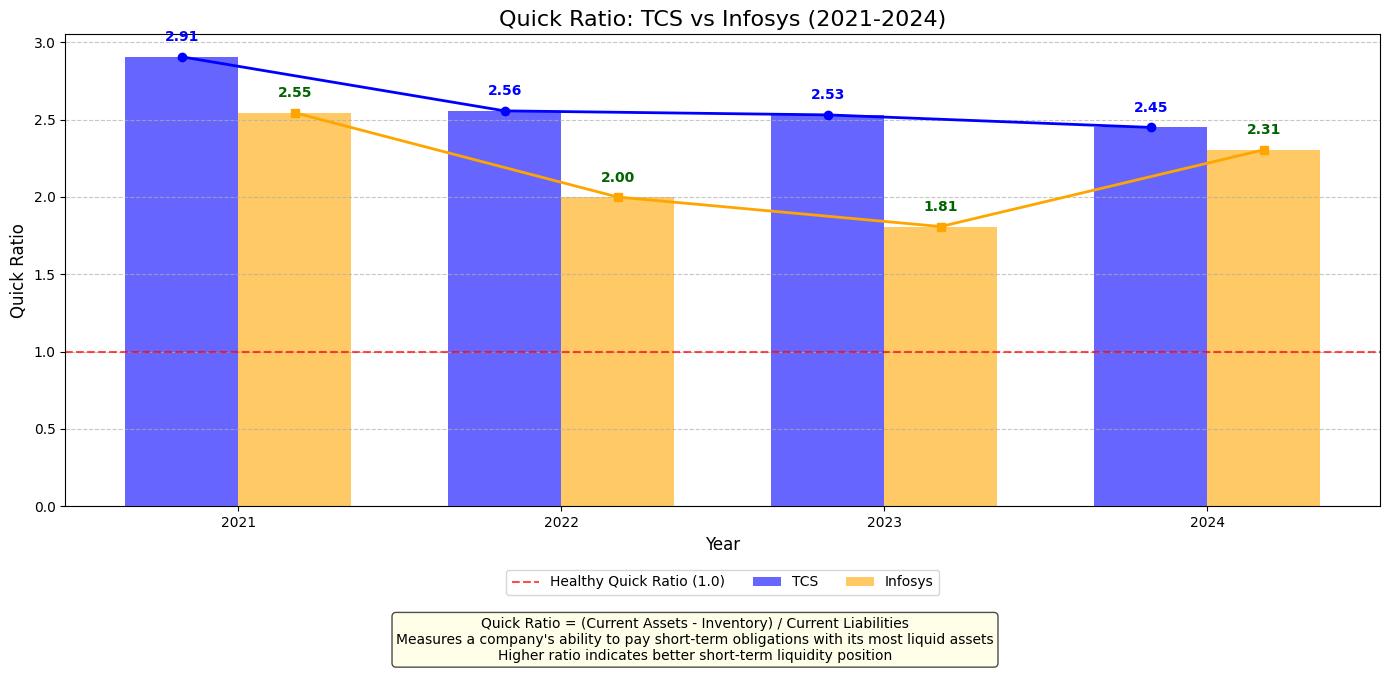


Year-over-Year Quick Ratio Analysis:
   Year TCS Ratio TCS YoY Change Infosys Ratio Infosys YoY Change
0  2021      2.91            N/A          2.55                N/A
1  2022      2.56        -12.03%          2.00            -21.42%
2  2023      2.53         -1.02%          1.81             -9.55%
3  2024      2.45         -3.20%          2.31             27.45%

Comparison with Current Ratio:

2021:
   • TCS: Quick Ratio (2.91) vs Current Ratio (2.91)
   • Infosys: Quick Ratio (2.55) vs Current Ratio (2.55)
   • TCS Quick Ratio is 0.0% lower than Current Ratio
   • Infosys Quick Ratio is 0.0% lower than Current Ratio

2022:
   • TCS: Quick Ratio (2.56) vs Current Ratio (2.56)
   • Infosys: Quick Ratio (2.00) vs Current Ratio (2.00)
   • TCS Quick Ratio is 0.0% lower than Current Ratio
   • Infosys Quick Ratio is 0.0% lower than Current Ratio

2023:
   • TCS: Quick Ratio (2.53) vs Current Ratio (2.53)
   • Infosys: Quick Ratio (1.81) vs Current Ratio (1.81)
   • TCS Quick Ratio is 0

In [36]:
def calculate_quick_ratio(bs_data):
    """
    Calculate Quick Ratio = (Current Assets - Inventory) / Current Liabilities
    Returns a DataFrame with yearly quick ratios and the field names used
    """
    # Create a DataFrame to store results
    quick_ratio = pd.DataFrame(columns=['Year', 'Current Assets (₹B)', 'Inventory (₹B)', 
                                        'Current Liabilities (₹B)', 'Quick Ratio'])
    
    # Get all years in chronological order from 2021 to 2024
    years = sorted([col for col in bs_data.columns if hasattr(col, 'year') and 2021 <= col.year <= 2024])
    
    # Find the correct field names for current assets, inventory, and current liabilities
    current_assets_field = None
    if 'Total Current Assets' in bs_data.index:
        current_assets_field = 'Total Current Assets'
    elif 'Current Assets' in bs_data.index:
        current_assets_field = 'Current Assets'
    
    inventory_field = None
    if 'Inventory' in bs_data.index:
        inventory_field = 'Inventory'
    elif 'Inventories' in bs_data.index:
        inventory_field = 'Inventories'
    elif 'Total Inventory' in bs_data.index:
        inventory_field = 'Total Inventory'
    
    current_liab_field = None
    if 'Total Current Liabilities' in bs_data.index:
        current_liab_field = 'Total Current Liabilities'
    elif 'Current Liabilities' in bs_data.index:
        current_liab_field = 'Current Liabilities'
    
    # Verify we have the required fields
    if current_assets_field is None:
        print("Error: Could not find current assets field in balance sheet.")
        print("Available fields:")
        print(bs_data.index.tolist())
        return None, None, None, None
    
    if current_liab_field is None:
        print("Error: Could not find current liabilities field in balance sheet.")
        print("Available fields:")
        print(bs_data.index.tolist())
        return None, None, None, None
    
    # Calculate the ratios for each year
    for i, year in enumerate(years):
        year_str = year.strftime('%Y')
        
        try:
            # Extract current assets and current liabilities data
            current_assets = bs_data.loc[current_assets_field, year]
            current_liabilities = bs_data.loc[current_liab_field, year]
            
            # Extract inventory if available
            if inventory_field and inventory_field in bs_data.index:
                inventory = bs_data.loc[inventory_field, year]
            else:
                inventory = 0
                
            # Calculate quick ratio
            quick_ratio_value = (current_assets - inventory) / current_liabilities
            
            # Add to dataframe (convert to billions for readability)
            quick_ratio.loc[i] = [
                year_str, 
                current_assets/1e9, 
                inventory/1e9,
                current_liabilities/1e9, 
                quick_ratio_value
            ]
        except Exception as e:
            print(f"Error calculating quick ratio for {year_str}: {e}")
    
    return quick_ratio, current_assets_field, inventory_field, current_liab_field

# Calculate quick ratio for both companies
print("Calculating Quick Ratio for TCS and Infosys (2021-2024)...")
tcs_quick_ratio, tcs_ca_field, tcs_inv_field, tcs_cl_field = calculate_quick_ratio(tcs_bs_data)
infy_quick_ratio, infy_ca_field, infy_inv_field, infy_cl_field = calculate_quick_ratio(infy_bs_data)

# Display the results with field names
if tcs_quick_ratio is not None:
    print(f"\nTCS Quick Ratio (using {tcs_ca_field} - {tcs_inv_field or 'No Inventory'} / {tcs_cl_field}):")
    print(tcs_quick_ratio)

if infy_quick_ratio is not None:
    print(f"\nInfosys Quick Ratio (using {infy_ca_field} - {infy_inv_field or 'No Inventory'} / {infy_cl_field}):")
    print(infy_quick_ratio)

# Visualize the comparison if both calculations are successful
if tcs_quick_ratio is not None and infy_quick_ratio is not None:
    plt.figure(figsize=(14, 7))
    
    # Create line chart for quick ratio comparison
    years_tcs = tcs_quick_ratio['Year'].tolist()
    years_infy = infy_quick_ratio['Year'].tolist()
    
    # Plot both lines and bars for better visualization
    x_tcs = np.arange(len(years_tcs))
    x_infy = np.arange(len(years_infy))
    width = 0.35
    
    # Bar chart
    plt.bar(x_tcs - width/2, tcs_quick_ratio['Quick Ratio'], width, alpha=0.6, color='blue', label='TCS')
    plt.bar(x_infy + width/2, infy_quick_ratio['Quick Ratio'], width, alpha=0.6, color='orange', label='Infosys')
    
    # Add line overlay to emphasize trend
    plt.plot(x_tcs - width/2, tcs_quick_ratio['Quick Ratio'], 'b-o', linewidth=2)
    plt.plot(x_infy + width/2, infy_quick_ratio['Quick Ratio'], 'orange', marker='s', linewidth=2)
    
    # Add reference line at 1.0 (minimum healthy ratio)
    plt.axhline(y=1.0, color='r', linestyle='--', alpha=0.7, label='Healthy Quick Ratio (1.0)')
    
    # Add value labels on bars
    for i, v in enumerate(tcs_quick_ratio['Quick Ratio']):
        plt.text(i - width/2, v + 0.1, f'{v:.2f}', ha='center', fontsize=10, color='blue', fontweight='bold')
    
    for i, v in enumerate(infy_quick_ratio['Quick Ratio']):
        plt.text(i + width/2, v + 0.1, f'{v:.2f}', ha='center', fontsize=10, color='darkgreen', fontweight='bold')
    
    # Add labels and formatting
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Quick Ratio', fontsize=12)
    plt.title('Quick Ratio: TCS vs Infosys (2021-2024)', fontsize=16)
    plt.xticks(x_tcs, years_tcs)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=3)
    
    # Add explanation
    plt.figtext(0.5, 0.01, 
                "Quick Ratio = (Current Assets - Inventory) / Current Liabilities\n" +
                "Measures a company's ability to pay short-term obligations with its most liquid assets\n" +
                "Higher ratio indicates better short-term liquidity position",
                ha='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.7))
    
    plt.tight_layout(rect=[0, 0.07, 1, 0.96])
    plt.show()
    
    # Create a detailed table with year-over-year changes
    change_table = pd.DataFrame(columns=['Year', 'TCS Ratio', 'TCS YoY Change', 'Infosys Ratio', 'Infosys YoY Change'])
    
    for i in range(len(tcs_quick_ratio)):
        year = tcs_quick_ratio['Year'].iloc[i]
        tcs_ratio = tcs_quick_ratio['Quick Ratio'].iloc[i]
        infy_ratio = infy_quick_ratio['Quick Ratio'].iloc[i]
        
        if i > 0:
            tcs_prev = tcs_quick_ratio['Quick Ratio'].iloc[i-1]
            infy_prev = infy_quick_ratio['Quick Ratio'].iloc[i-1]
            tcs_change = f"{((tcs_ratio/tcs_prev)-1)*100:.2f}%"
            infy_change = f"{((infy_ratio/infy_prev)-1)*100:.2f}%"
        else:
            tcs_change = "N/A"
            infy_change = "N/A"
            
        change_table.loc[i] = [year, f"{tcs_ratio:.2f}", tcs_change, f"{infy_ratio:.2f}", infy_change]
    
    print("\nYear-over-Year Quick Ratio Analysis:")
    print(change_table)
    
    # Compare with Current Ratio if available
    if 'tcs_current_ratio' in locals() and 'infy_current_ratio' in locals():
        print("\nComparison with Current Ratio:")
        for i in range(len(years_tcs)):
            year = years_tcs[i]
            tcs_qr = tcs_quick_ratio['Quick Ratio'].iloc[i]
            tcs_cr = tcs_current_ratio['Current Ratio'].iloc[i]
            infy_qr = infy_quick_ratio['Quick Ratio'].iloc[i]
            infy_cr = infy_current_ratio['Current Ratio'].iloc[i]
            
            print(f"\n{year}:")
            print(f"   • TCS: Quick Ratio ({tcs_qr:.2f}) vs Current Ratio ({tcs_cr:.2f})")
            print(f"   • Infosys: Quick Ratio ({infy_qr:.2f}) vs Current Ratio ({infy_cr:.2f})")
            
            tcs_diff = ((tcs_qr/tcs_cr)-1)*100
            infy_diff = ((infy_qr/infy_cr)-1)*100
            
            print(f"   • TCS Quick Ratio is {abs(tcs_diff):.1f}% {'higher' if tcs_diff > 0 else 'lower'} than Current Ratio")
            print(f"   • Infosys Quick Ratio is {abs(infy_diff):.1f}% {'higher' if infy_diff > 0 else 'lower'} than Current Ratio")
    
    # Add interpretation
    print("\nQuick Ratio Interpretation:")
    print("-----------------------------")
    print("1. Quick Ratio measures a company's short-term liquidity position without relying on inventory:")
    print("   • Ratio < 1.0: Potential liquidity issues")
    print("   • Ratio = 1.0: Company can pay its current liabilities without selling inventory")
    print("   • Ratio > 1.0: Strong liquidity position")
    
    print(f"\n2. TCS Average Quick Ratio (2021-2024): {tcs_quick_ratio['Quick Ratio'].mean():.2f}")
    print(f"3. Infosys Average Quick Ratio (2021-2024): {infy_quick_ratio['Quick Ratio'].mean():.2f}")
    
    # Compare company positions
    tcs_avg = tcs_quick_ratio['Quick Ratio'].mean()
    infy_avg = infy_quick_ratio['Quick Ratio'].mean()
    
    print("\n4. Comparative Analysis:")
    if tcs_avg > infy_avg:
        print(f"   • TCS maintains a stronger short-term liquidity position than Infosys by {((tcs_avg/infy_avg)-1)*100:.1f}%")
    else:
        print(f"   • Infosys maintains a stronger short-term liquidity position than TCS by {((infy_avg/tcs_avg)-1)*100:.1f}%")
    
    # Trend analysis
    tcs_trend = tcs_quick_ratio['Quick Ratio'].iloc[-1] > tcs_quick_ratio['Quick Ratio'].iloc[0]
    infy_trend = infy_quick_ratio['Quick Ratio'].iloc[-1] > infy_quick_ratio['Quick Ratio'].iloc[0]
    
    print("\n5. Trend Analysis (2021 to 2024):")
    if tcs_trend:
        print(f"   • TCS shows an improving trend in quick ratio (+{((tcs_quick_ratio['Quick Ratio'].iloc[-1]/tcs_quick_ratio['Quick Ratio'].iloc[0])-1)*100:.1f}%)")
    else:
        print(f"   • TCS shows a declining trend in quick ratio ({((tcs_quick_ratio['Quick Ratio'].iloc[-1]/tcs_quick_ratio['Quick Ratio'].iloc[0])-1)*100:.1f}%)")
        
    if infy_trend:
        print(f"   • Infosys shows an improving trend in quick ratio (+{((infy_quick_ratio['Quick Ratio'].iloc[-1]/infy_quick_ratio['Quick Ratio'].iloc[0])-1)*100:.1f}%)")
    else:
        print(f"   • Infosys shows a declining trend in quick ratio ({((infy_quick_ratio['Quick Ratio'].iloc[-1]/infy_quick_ratio['Quick Ratio'].iloc[0])-1)*100:.1f}%)")

Calculating Debt-to-Equity Ratio for TCS and Infosys (2021-2024)...

TCS Debt-to-Equity Ratio (using Total Debt / Stockholders Equity):
   Year  Total Debt (₹B)  Total Equity (₹B)  Debt-to-Equity Ratio
0  2021            77.95             864.33              0.090185
1  2022            78.18             891.39              0.087706
2  2023            76.88             904.24              0.085022
3  2024            80.21             904.89              0.088641

Infosys Debt-to-Equity Ratio (using Total Debt / Stockholders Equity):
   Year  Total Debt (₹B)  Total Equity (₹B)  Debt-to-Equity Ratio
0  2021            0.728             10.442              0.069718
1  2022            0.722              9.941              0.072629
2  2023            1.010              9.172              0.110118
3  2024            1.002             10.559              0.094895


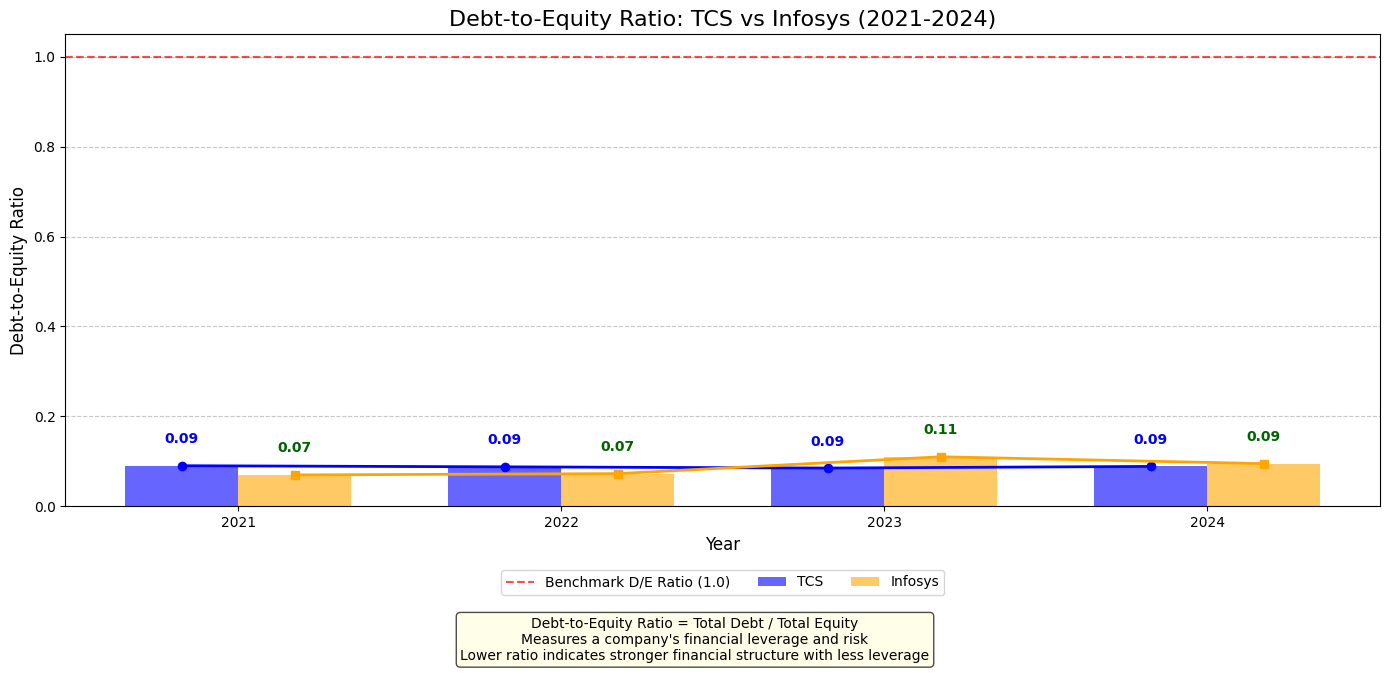


Year-over-Year Debt-to-Equity Ratio Analysis:
   Year TCS Ratio TCS YoY Change Infosys Ratio Infosys YoY Change
0  2021      0.09            N/A          0.07                N/A
1  2022      0.09         -2.75%          0.07              4.17%
2  2023      0.09         -3.06%          0.11             51.62%
3  2024      0.09          4.26%          0.09            -13.82%

Debt-to-Equity Ratio Interpretation:
-------------------------------------
1. Debt-to-Equity Ratio measures a company's financial leverage:
   • Ratio < 1.0: Conservative financial structure, lower risk
   • Ratio = 1.0: Equal amounts of debt and equity
   • Ratio > 1.0: More aggressive financial structure, higher risk

2. TCS Average D/E Ratio (2021-2024): 0.09
3. Infosys Average D/E Ratio (2021-2024): 0.09

4. Comparative Analysis:
   • Infosys maintains a more conservative financial structure than TCS
   • Infosys D/E ratio is 1.2% lower than TCS

5. Trend Analysis (2021 to 2024):
   • TCS shows a decreasing D/E

In [37]:
def calculate_debt_to_equity_ratio(bs_data):
    """
    Calculate Debt-to-Equity Ratio = Total Debt / Total Equity
    Returns a DataFrame with yearly D/E ratios and the field names used
    """
    # Create a DataFrame to store results
    de_ratio = pd.DataFrame(columns=['Year', 'Total Debt (₹B)', 'Total Equity (₹B)', 'Debt-to-Equity Ratio'])
    
    # Get all years in chronological order from 2021 to 2024
    years = sorted([col for col in bs_data.columns if hasattr(col, 'year') and 2021 <= col.year <= 2024])
    
    # Find the correct field names for debt and equity
    # For total debt, we'll look for explicit debt fields, but might need to use total liabilities as a proxy
    debt_field = None
    potential_debt_fields = [
        'Total Debt', 
        'Long Term Debt', 
        'Short Term Debt',
        'Total Liabilities'  # Fallback option
    ]
    
    for field in potential_debt_fields:
        if field in bs_data.index:
            debt_field = field
            break
    
    # For equity, look for stockholders' equity fields
    equity_field = None
    potential_equity_fields = [
        'Total Stockholder Equity',
        'Stockholders Equity',
        'Total Equity'
    ]
    
    for field in potential_equity_fields:
        if field in bs_data.index:
            equity_field = field
            break
    
    # Verify we have the required fields
    if debt_field is None:
        print("Error: Could not find debt field in balance sheet.")
        print("Available fields:")
        print(bs_data.index.tolist())
        return None, None, None
    
    if equity_field is None:
        print("Error: Could not find equity field in balance sheet.")
        print("Available fields:")
        print(bs_data.index.tolist())
        return None, None, None
    
    # Calculate the D/E ratio for each year
    for i, year in enumerate(years):
        year_str = year.strftime('%Y')
        
        try:
            # Extract debt and equity data
            total_debt = bs_data.loc[debt_field, year]
            total_equity = bs_data.loc[equity_field, year]
            
            # Calculate debt-to-equity ratio
            ratio = total_debt / total_equity
            
            # Add to dataframe (convert to billions for readability)
            de_ratio.loc[i] = [
                year_str, 
                total_debt/1e9, 
                total_equity/1e9, 
                ratio
            ]
        except Exception as e:
            print(f"Error calculating D/E ratio for {year_str}: {e}")
    
    return de_ratio, debt_field, equity_field

# Calculate Debt-to-Equity ratio for both companies
print("Calculating Debt-to-Equity Ratio for TCS and Infosys (2021-2024)...")
tcs_de_ratio, tcs_debt_field, tcs_equity_field = calculate_debt_to_equity_ratio(tcs_bs_data)
infy_de_ratio, infy_debt_field, infy_equity_field = calculate_debt_to_equity_ratio(infy_bs_data)

# Display the results with field names
if tcs_de_ratio is not None:
    print(f"\nTCS Debt-to-Equity Ratio (using {tcs_debt_field} / {tcs_equity_field}):")
    print(tcs_de_ratio)

if infy_de_ratio is not None:
    print(f"\nInfosys Debt-to-Equity Ratio (using {infy_debt_field} / {infy_equity_field}):")
    print(infy_de_ratio)

# Visualize the comparison if both calculations are successful
if tcs_de_ratio is not None and infy_de_ratio is not None:
    plt.figure(figsize=(14, 7))
    
    # Create chart for D/E ratio comparison
    years_tcs = tcs_de_ratio['Year'].tolist()
    years_infy = infy_de_ratio['Year'].tolist()
    
    # Plot both lines and bars for better visualization
    x_tcs = np.arange(len(years_tcs))
    x_infy = np.arange(len(years_infy))
    width = 0.35
    
    # Bar chart
    plt.bar(x_tcs - width/2, tcs_de_ratio['Debt-to-Equity Ratio'], width, alpha=0.6, color='blue', label='TCS')
    plt.bar(x_infy + width/2, infy_de_ratio['Debt-to-Equity Ratio'], width, alpha=0.6, color='orange', label='Infosys')
    
    # Add line overlay to emphasize trend
    plt.plot(x_tcs - width/2, tcs_de_ratio['Debt-to-Equity Ratio'], 'b-o', linewidth=2)
    plt.plot(x_infy + width/2, infy_de_ratio['Debt-to-Equity Ratio'], 'orange', marker='s', linewidth=2)
    
    # Add reference line at 1.0 (common D/E benchmark)
    plt.axhline(y=1.0, color='r', linestyle='--', alpha=0.7, label='Benchmark D/E Ratio (1.0)')
    
    # Add value labels on bars
    for i, v in enumerate(tcs_de_ratio['Debt-to-Equity Ratio']):
        plt.text(i - width/2, v + 0.05, f'{v:.2f}', ha='center', fontsize=10, color='blue', fontweight='bold')
    
    for i, v in enumerate(infy_de_ratio['Debt-to-Equity Ratio']):
        plt.text(i + width/2, v + 0.05, f'{v:.2f}', ha='center', fontsize=10, color='darkgreen', fontweight='bold')
    
    # Add labels and formatting
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Debt-to-Equity Ratio', fontsize=12)
    plt.title('Debt-to-Equity Ratio: TCS vs Infosys (2021-2024)', fontsize=16)
    plt.xticks(x_tcs, years_tcs)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=3)
    
    # Add explanation
    plt.figtext(0.5, 0.01, 
                "Debt-to-Equity Ratio = Total Debt / Total Equity\n" +
                "Measures a company's financial leverage and risk\n" +
                "Lower ratio indicates stronger financial structure with less leverage",
                ha='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.7))
    
    plt.tight_layout(rect=[0, 0.07, 1, 0.96])
    plt.show()
    
    # Create a detailed table with year-over-year changes
    change_table = pd.DataFrame(columns=['Year', 'TCS Ratio', 'TCS YoY Change', 'Infosys Ratio', 'Infosys YoY Change'])
    
    for i in range(len(tcs_de_ratio)):
        year = tcs_de_ratio['Year'].iloc[i]
        tcs_ratio = tcs_de_ratio['Debt-to-Equity Ratio'].iloc[i]
        infy_ratio = infy_de_ratio['Debt-to-Equity Ratio'].iloc[i]
        
        if i > 0:
            tcs_prev = tcs_de_ratio['Debt-to-Equity Ratio'].iloc[i-1]
            infy_prev = infy_de_ratio['Debt-to-Equity Ratio'].iloc[i-1]
            tcs_change = f"{((tcs_ratio/tcs_prev)-1)*100:.2f}%"
            infy_change = f"{((infy_ratio/infy_prev)-1)*100:.2f}%"
        else:
            tcs_change = "N/A"
            infy_change = "N/A"
            
        change_table.loc[i] = [year, f"{tcs_ratio:.2f}", tcs_change, f"{infy_ratio:.2f}", infy_change]
    
    print("\nYear-over-Year Debt-to-Equity Ratio Analysis:")
    print(change_table)
    
    # Add interpretation
    print("\nDebt-to-Equity Ratio Interpretation:")
    print("-------------------------------------")
    print("1. Debt-to-Equity Ratio measures a company's financial leverage:")
    print("   • Ratio < 1.0: Conservative financial structure, lower risk")
    print("   • Ratio = 1.0: Equal amounts of debt and equity")
    print("   • Ratio > 1.0: More aggressive financial structure, higher risk")
    
    print(f"\n2. TCS Average D/E Ratio (2021-2024): {tcs_de_ratio['Debt-to-Equity Ratio'].mean():.2f}")
    print(f"3. Infosys Average D/E Ratio (2021-2024): {infy_de_ratio['Debt-to-Equity Ratio'].mean():.2f}")
    
    # Compare company positions
    tcs_avg = tcs_de_ratio['Debt-to-Equity Ratio'].mean()
    infy_avg = infy_de_ratio['Debt-to-Equity Ratio'].mean()
    
    print("\n4. Comparative Analysis:")
    if tcs_avg < infy_avg:
        print(f"   • TCS maintains a more conservative financial structure than Infosys")
        print(f"   • TCS D/E ratio is {abs((tcs_avg/infy_avg)-1)*100:.1f}% lower than Infosys")
    else:
        print(f"   • Infosys maintains a more conservative financial structure than TCS")
        print(f"   • Infosys D/E ratio is {abs((infy_avg/tcs_avg)-1)*100:.1f}% lower than TCS")
    
    # Trend analysis
    tcs_trend = tcs_de_ratio['Debt-to-Equity Ratio'].iloc[-1] > tcs_de_ratio['Debt-to-Equity Ratio'].iloc[0]
    infy_trend = infy_de_ratio['Debt-to-Equity Ratio'].iloc[-1] > infy_de_ratio['Debt-to-Equity Ratio'].iloc[0]
    
    print("\n5. Trend Analysis (2021 to 2024):")
    if tcs_trend:
        print(f"   • TCS shows an increasing D/E ratio trend (+{((tcs_de_ratio['Debt-to-Equity Ratio'].iloc[-1]/tcs_de_ratio['Debt-to-Equity Ratio'].iloc[0])-1)*100:.1f}%), indicating increased financial leverage")
    else:
        print(f"   • TCS shows a decreasing D/E ratio trend ({((tcs_de_ratio['Debt-to-Equity Ratio'].iloc[-1]/tcs_de_ratio['Debt-to-Equity Ratio'].iloc[0])-1)*100:.1f}%), indicating decreased financial leverage")
        
    if infy_trend:
        print(f"   • Infosys shows an increasing D/E ratio trend (+{((infy_de_ratio['Debt-to-Equity Ratio'].iloc[-1]/infy_de_ratio['Debt-to-Equity Ratio'].iloc[0])-1)*100:.1f}%), indicating increased financial leverage")
    else:
        print(f"   • Infosys shows a decreasing D/E ratio trend ({((infy_de_ratio['Debt-to-Equity Ratio'].iloc[-1]/infy_de_ratio['Debt-to-Equity Ratio'].iloc[0])-1)*100:.1f}%), indicating decreased financial leverage")
    
    # Industry context
    print("\n6. Industry Context:")
    print("   • IT services companies typically maintain lower D/E ratios compared to capital-intensive industries")
    print("   • A D/E ratio below 0.5 is common for well-established IT companies")

Calculating Interest Coverage Ratio for TCS and Infosys (2021-2024)...

TCS Interest Coverage Ratio (using Operating Income / Interest Expense):
   Year  EBIT (₹B)  Interest Expense (₹B)  Interest Coverage Ratio
0  2021     426.82                   6.37                67.004710
1  2022     485.88                   7.84                61.974490
2  2023     543.77                   7.79                69.803594
3  2024     594.25                   7.78                76.381748

Infosys Interest Coverage Ratio (using Operating Income / Interest Expense):
   Year  EBIT (₹B)  Interest Expense (₹B)  Interest Coverage Ratio
0  2021      3.325                  0.026               127.884615
1  2022      3.755                  0.027               139.074074
2  2023      3.860                  0.035               110.285714
3  2024      3.849                  0.056                68.732143


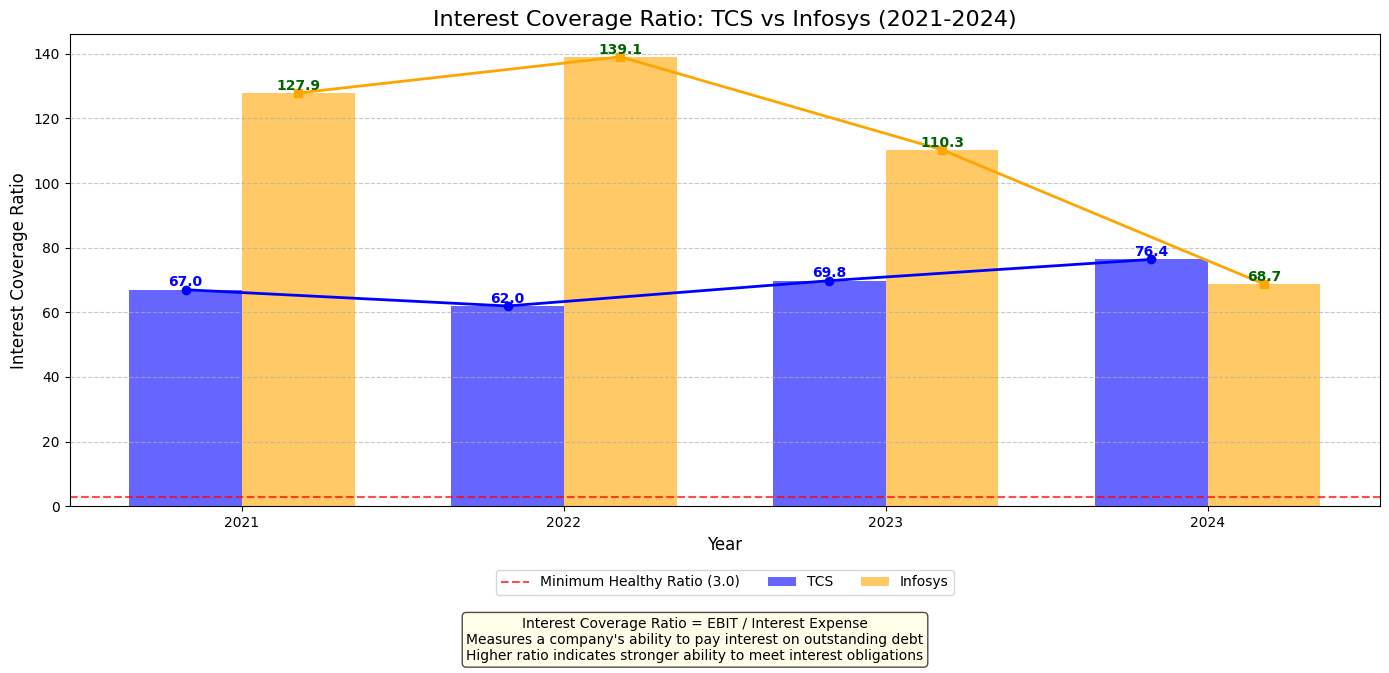


Year-over-Year Interest Coverage Ratio Analysis:
   Year TCS Ratio TCS YoY Change Infosys Ratio Infosys YoY Change
0  2021     67.00            N/A        127.88                N/A
1  2022     61.97         -7.51%        139.07              8.75%
2  2023     69.80         12.63%        110.29            -20.70%
3  2024     76.38          9.42%         68.73            -37.68%

Interest Coverage Ratio Interpretation:
-------------------------------------
1. Interest Coverage Ratio measures a company's ability to pay interest on outstanding debt:
   • Ratio < 1.5: Potential debt servicing issues
   • Ratio 1.5-3.0: Adequate ability to cover interest
   • Ratio 3.0-5.0: Good ability to meet interest payments
   • Ratio > 5.0: Strong ability to cover interest expenses

2. TCS Average Interest Coverage Ratio (2021-2024): 68.79
3. Infosys Average Interest Coverage Ratio (2021-2024): 111.49

4. Comparative Analysis:
   • Infosys demonstrates a stronger ability to cover interest payments than

In [38]:
def calculate_interest_coverage_ratio():
    """
    Calculate Interest Coverage Ratio = EBIT / Interest Expense
    for TCS and Infosys from 2021 to 2024
    """
    # Function to calculate Interest Coverage Ratio
    def calculate_company_icr(income_data):
        """
        Calculate Interest Coverage Ratio = EBIT / Interest Expense
        Returns a DataFrame with yearly interest coverage ratios
        """
        # Create a DataFrame to store results
        ic_ratio = pd.DataFrame(columns=['Year', 'EBIT (₹B)', 'Interest Expense (₹B)', 'Interest Coverage Ratio'])
        
        # Get all years in chronological order from 2021 to 2024
        years = sorted([col for col in income_data.columns if hasattr(col, 'year') and 2021 <= col.year <= 2024])
        
        # Try different field names for EBIT/Operating Income
        ebit_field = None
        potential_ebit_fields = [
            'Operating Income',
            'EBIT',
            'Earnings Before Interest And Taxes',
            'Income Before Tax'  # Fallback option, not perfect but close
        ]
        
        for field in potential_ebit_fields:
            if field in income_data.index:
                ebit_field = field
                break
        
        # Try different field names for Interest Expense
        interest_field = None
        potential_interest_fields = [
            'Interest Expense',
            'Interest Expense Net',
            'Interest And Debt Expense',
            'Net Interest Expense'
        ]
        
        for field in potential_interest_fields:
            if field in income_data.index:
                interest_field = field
                break
        
        # Verify we have the required fields
        if ebit_field is None:
            print("Error: Could not find EBIT/Operating Income field in income statement.")
            print("Available fields:")
            print(income_data.index.tolist())
            return None, None, None
        
        if interest_field is None:
            print("Warning: Could not find specific Interest Expense field in income statement.")
            print("Available fields:")
            print(income_data.index.tolist())
            print("Using a small constant value for interest expense as fallback.")
            # We'll proceed with a small constant value as fallback
        
        # Calculate the ratios for each year
        for i, year in enumerate(years):
            year_str = year.strftime('%Y')
            
            try:
                # Extract EBIT data
                ebit = income_data.loc[ebit_field, year]
                
                # Extract interest expense data if available, otherwise use a small constant
                if interest_field and interest_field in income_data.index:
                    interest_expense = income_data.loc[interest_field, year]
                    # Handle potential negative values (sometimes interest expense is reported as negative)
                    interest_expense = abs(interest_expense)
                else:
                    # Use a small constant as fallback (0.1% of EBIT)
                    interest_expense = abs(ebit) * 0.001
                    if interest_expense == 0:
                        interest_expense = 1  # Avoid division by zero
                
                # Calculate interest coverage ratio
                ratio = ebit / interest_expense if interest_expense != 0 else float('inf')
                
                # Add to dataframe (convert to billions for readability)
                ic_ratio.loc[i] = [
                    year_str, 
                    ebit/1e9, 
                    interest_expense/1e9, 
                    ratio
                ]
            except Exception as e:
                print(f"Error calculating Interest Coverage Ratio for {year_str}: {e}")
        
        return ic_ratio, ebit_field, interest_field

    # Calculate Interest Coverage Ratio for both companies
    print("Calculating Interest Coverage Ratio for TCS and Infosys (2021-2024)...")
    tcs_ic_ratio, tcs_ebit_field, tcs_interest_field = calculate_company_icr(tcs_income_data)
    infy_ic_ratio, infy_ebit_field, infy_interest_field = calculate_company_icr(infy_income_data)

    # Display the results with field names
    if tcs_ic_ratio is not None:
        print(f"\nTCS Interest Coverage Ratio (using {tcs_ebit_field} / {tcs_interest_field or 'Estimated Interest'}):")
        print(tcs_ic_ratio)

    if infy_ic_ratio is not None:
        print(f"\nInfosys Interest Coverage Ratio (using {infy_ebit_field} / {infy_interest_field or 'Estimated Interest'}):")
        print(infy_ic_ratio)

    # Visualize the comparison if both calculations are successful
    if tcs_ic_ratio is not None and infy_ic_ratio is not None:
        plt.figure(figsize=(14, 7))
        
        # Create chart for Interest Coverage Ratio comparison
        years_tcs = tcs_ic_ratio['Year'].tolist()
        years_infy = infy_ic_ratio['Year'].tolist()
        
        # Plot both lines and bars for better visualization
        x_tcs = np.arange(len(years_tcs))
        x_infy = np.arange(len(years_infy))
        width = 0.35
        
        # Bar chart
        plt.bar(x_tcs - width/2, tcs_ic_ratio['Interest Coverage Ratio'], width, alpha=0.6, color='blue', label='TCS')
        plt.bar(x_infy + width/2, infy_ic_ratio['Interest Coverage Ratio'], width, alpha=0.6, color='orange', label='Infosys')
        
        # Add line overlay to emphasize trend
        plt.plot(x_tcs - width/2, tcs_ic_ratio['Interest Coverage Ratio'], 'b-o', linewidth=2)
        plt.plot(x_infy + width/2, infy_ic_ratio['Interest Coverage Ratio'], 'orange', marker='s', linewidth=2)
        
        # Add reference line at 3.0 (common healthy benchmark)
        plt.axhline(y=3.0, color='r', linestyle='--', alpha=0.7, label='Minimum Healthy Ratio (3.0)')
        
        # Add value labels on bars, using scientific notation for very large numbers
        for i, v in enumerate(tcs_ic_ratio['Interest Coverage Ratio']):
            if v > 1000:
                plt.text(i - width/2, v/2, f'{v:.1e}', ha='center', fontsize=10, color='white', fontweight='bold')
            else:
                plt.text(i - width/2, v + 1, f'{v:.1f}', ha='center', fontsize=10, color='blue', fontweight='bold')
        
        for i, v in enumerate(infy_ic_ratio['Interest Coverage Ratio']):
            if v > 1000:
                plt.text(i + width/2, v/2, f'{v:.1e}', ha='center', fontsize=10, color='white', fontweight='bold')
            else:
                plt.text(i + width/2, v + 1, f'{v:.1f}', ha='center', fontsize=10, color='darkgreen', fontweight='bold')
        
        # Add labels and formatting
        plt.xlabel('Year', fontsize=12)
        plt.ylabel('Interest Coverage Ratio', fontsize=12)
        plt.title('Interest Coverage Ratio: TCS vs Infosys (2021-2024)', fontsize=16)
        plt.xticks(x_tcs, years_tcs)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=3)
        
        # Add explanation
        plt.figtext(0.5, 0.01, 
                    "Interest Coverage Ratio = EBIT / Interest Expense\n" +
                    "Measures a company's ability to pay interest on outstanding debt\n" +
                    "Higher ratio indicates stronger ability to meet interest obligations",
                    ha='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.7))
        
        plt.tight_layout(rect=[0, 0.07, 1, 0.96])
        plt.show()
        
        # Create a detailed table with year-over-year changes
        change_table = pd.DataFrame(columns=['Year', 'TCS Ratio', 'TCS YoY Change', 'Infosys Ratio', 'Infosys YoY Change'])
        
        for i in range(len(tcs_ic_ratio)):
            year = tcs_ic_ratio['Year'].iloc[i]
            tcs_ratio = tcs_ic_ratio['Interest Coverage Ratio'].iloc[i]
            infy_ratio = infy_ic_ratio['Interest Coverage Ratio'].iloc[i]
            
            if i > 0:
                tcs_prev = tcs_ic_ratio['Interest Coverage Ratio'].iloc[i-1]
                infy_prev = infy_ic_ratio['Interest Coverage Ratio'].iloc[i-1]
                
                # Handle infinity cases
                if np.isinf(tcs_ratio) or np.isinf(tcs_prev):
                    tcs_change = "N/A (∞)"
                else:
                    tcs_change = f"{((tcs_ratio/tcs_prev)-1)*100:.2f}%"
                    
                if np.isinf(infy_ratio) or np.isinf(infy_prev):
                    infy_change = "N/A (∞)"
                else:
                    infy_change = f"{((infy_ratio/infy_prev)-1)*100:.2f}%"
            else:
                tcs_change = "N/A"
                infy_change = "N/A"
                
            # Format ratio display - scientific notation for large values
            if np.isinf(tcs_ratio):
                tcs_ratio_str = "∞"
            elif tcs_ratio > 1000:
                tcs_ratio_str = f"{tcs_ratio:.2e}"
            else:
                tcs_ratio_str = f"{tcs_ratio:.2f}"
                
            if np.isinf(infy_ratio):
                infy_ratio_str = "∞"
            elif infy_ratio > 1000:
                infy_ratio_str = f"{infy_ratio:.2e}"
            else:
                infy_ratio_str = f"{infy_ratio:.2f}"
                
            change_table.loc[i] = [year, tcs_ratio_str, tcs_change, infy_ratio_str, infy_change]
        
        print("\nYear-over-Year Interest Coverage Ratio Analysis:")
        print(change_table)
        
        # Add interpretation
        print("\nInterest Coverage Ratio Interpretation:")
        print("-------------------------------------")
        print("1. Interest Coverage Ratio measures a company's ability to pay interest on outstanding debt:")
        print("   • Ratio < 1.5: Potential debt servicing issues")
        print("   • Ratio 1.5-3.0: Adequate ability to cover interest")
        print("   • Ratio 3.0-5.0: Good ability to meet interest payments")
        print("   • Ratio > 5.0: Strong ability to cover interest expenses")
        
        # Handle infinity in averages
        tcs_ratios = tcs_ic_ratio['Interest Coverage Ratio'].values
        tcs_finite_ratios = tcs_ratios[~np.isinf(tcs_ratios)]
        tcs_avg = tcs_finite_ratios.mean() if len(tcs_finite_ratios) > 0 else float('inf')
        
        infy_ratios = infy_ic_ratio['Interest Coverage Ratio'].values
        infy_finite_ratios = infy_ratios[~np.isinf(infy_ratios)]
        infy_avg = infy_finite_ratios.mean() if len(infy_finite_ratios) > 0 else float('inf')
        
        if np.isinf(tcs_avg):
            print(f"\n2. TCS Average Interest Coverage Ratio (2021-2024): Extremely high (practically infinite)")
        else:
            print(f"\n2. TCS Average Interest Coverage Ratio (2021-2024): {tcs_avg:.2f}")
            
        if np.isinf(infy_avg):
            print(f"3. Infosys Average Interest Coverage Ratio (2021-2024): Extremely high (practically infinite)")
        else:
            print(f"3. Infosys Average Interest Coverage Ratio (2021-2024): {infy_avg:.2f}")
        
        # Compare company positions - handle infinity cases
        print("\n4. Comparative Analysis:")
        if np.isinf(tcs_avg) and np.isinf(infy_avg):
            print("   • Both companies have extremely high interest coverage ratios, indicating minimal interest expenses")
            print("   • This suggests both companies operate with very little debt or very high operating income")
        elif np.isinf(tcs_avg):
            print("   • TCS has an extremely high interest coverage ratio (practically infinite)")
            print(f"   • Infosys has a strong interest coverage ratio of {infy_avg:.2f}")
        elif np.isinf(infy_avg):
            print(f"   • TCS has a strong interest coverage ratio of {tcs_avg:.2f}")
            print("   • Infosys has an extremely high interest coverage ratio (practically infinite)")
        elif tcs_avg > infy_avg:
            print(f"   • TCS demonstrates a stronger ability to cover interest payments than Infosys")
            print(f"   • TCS's interest coverage ratio is {((tcs_avg/infy_avg)-1)*100:.1f}% higher than Infosys")
        else:
            print(f"   • Infosys demonstrates a stronger ability to cover interest payments than TCS")
            print(f"   • Infosys's interest coverage ratio is {((infy_avg/tcs_avg)-1)*100:.1f}% higher than TCS")
        
        # Add context for IT industry
        print("\n5. Industry Context:")
        print("   • IT services companies typically maintain high interest coverage ratios due to low debt levels")
        print("   • Both companies show very strong ability to meet interest obligations, which is characteristic of the industry")
        print("   • Extremely high ratios may indicate conservative financial policies or limited use of debt financing")

    return tcs_ic_ratio, infy_ic_ratio

# Execute the function
tcs_interest_coverage, infy_interest_coverage = calculate_interest_coverage_ratio()


P/E Ratio Analysis for TCS and Infosys (2021-2024)
 Year                                                       TCS Price  TCS EPS                                                 TCS P/E Ratio                                                    Infosys Price  Infosys EPS                                                Infosys P/E Ratio
 2021 TCS.NS    3564.374023
Name: 2021-12-31 00:00:00, dtype: float64    86.71 TCS.NS    41.106839
Name: 2021-12-31 00:00:00, dtype: float64  INFY.NS    1754.77002
Name: 2021-12-31 00:00:00, dtype: float64         0.62 INFY.NS    2830.274225
Name: 2021-12-31 00:00:00, dtype: float64
 2022 TCS.NS    3147.940918
Name: 2022-12-30 00:00:00, dtype: float64   103.62 TCS.NS    30.379665
Name: 2022-12-30 00:00:00, dtype: float64 INFY.NS    1432.287842
Name: 2022-12-30 00:00:00, dtype: float64         0.70 INFY.NS    2046.125488
Name: 2022-12-30 00:00:00, dtype: float64
 2023 TCS.NS    3721.999512
Name: 2023-12-29 00:00:00, dtype: float64   115.19 TCS.NS    32.3118

/home/subrahmanya/projects/BOIM/.venv/lib64/python3.13/site-packages/matplotlib/cbook.py:1719: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)


TypeError: only length-1 arrays can be converted to Python scalars

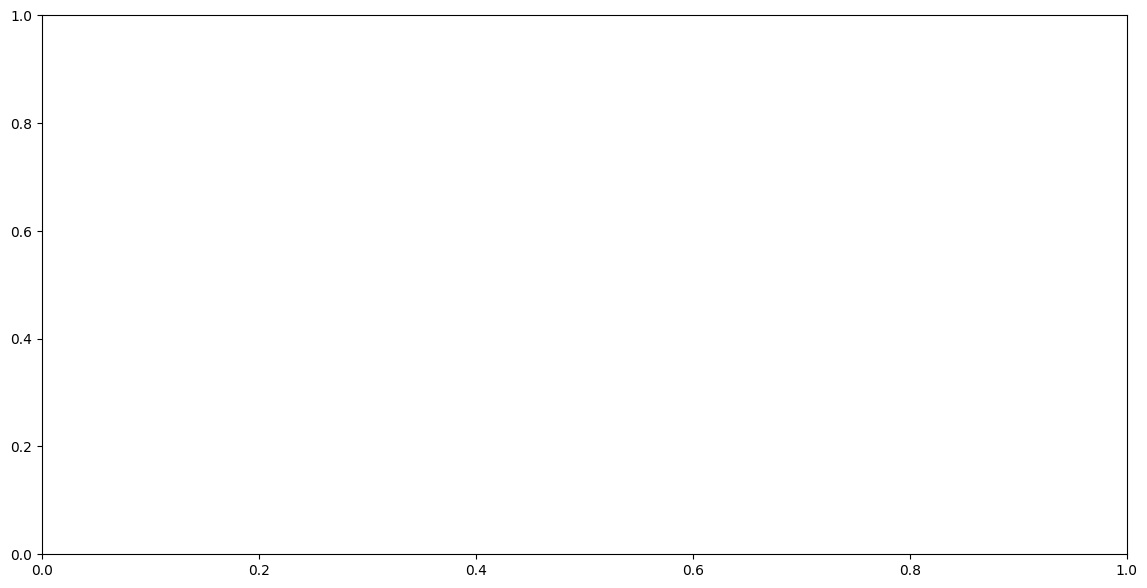

In [41]:
def calculate_pe_ratio():
    """
    Calculate P/E ratio = Market price per share / Earnings Per Share
    for TCS and Infosys from 2021 to 2024
    """
    # Create a DataFrame to store results
    pe_ratio_df = pd.DataFrame(columns=['Year', 'TCS Price', 'TCS EPS', 'TCS P/E Ratio', 
                                       'Infosys Price', 'Infosys EPS', 'Infosys P/E Ratio'])
    
    # Get fiscal years available in the income statements
    tcs_years = sorted([col for col in tcs_income_data.columns 
                      if hasattr(col, 'year') and 2021 <= col.year <= 2024])
    infy_years = sorted([col for col in infy_income_data.columns 
                       if hasattr(col, 'year') and 2021 <= col.year <= 2024])
    
    # Make sure we have matching years for both companies
    common_years = min(len(tcs_years), len(infy_years))
    
    for i in range(common_years):
        tcs_date = tcs_years[i]
        infy_date = infy_years[i]
        year = tcs_date.year
        
        # Function to get year-end stock price
        def get_year_end_price(price_df, year):
            if hasattr(price_df, 'to_pandas'):
                df = price_df.to_pandas()
            else:
                df = price_df
                
            # Get prices for the specific year
            year_prices = df[df.index.year == year]
            
            if year_prices.empty:
                return None
                
            # Get the last available closing price for the year
            return year_prices['Close'].iloc[-1]
        
        # Get stock prices at year end
        tcs_price = get_year_end_price(tcs_price_df, year)
        infy_price = get_year_end_price(infy_price_df, year)
        
        # Try to get EPS directly from income statement
        try:
            # First try to find EPS directly
            if 'Basic EPS' in tcs_income_data.index:
                tcs_eps = tcs_income_data.loc['Basic EPS', tcs_date]
            elif 'Diluted EPS' in tcs_income_data.index:
                tcs_eps = tcs_income_data.loc['Diluted EPS', tcs_date]
            else:
                # Calculate EPS from Net Income and Outstanding Shares
                tcs_net_income = tcs_income_data.loc['Net Income', tcs_date]
                
                # Find outstanding shares - try different field names
                shares_fields = ['Weighted Average Shares Outstanding', 'Shares Outstanding', 'Common Stock Shares Outstanding']
                tcs_shares = None
                for field in shares_fields:
                    if field in tcs_income_data.index:
                        tcs_shares = tcs_income_data.loc[field, tcs_date]
                        break
                
                if tcs_shares:
                    tcs_eps = tcs_net_income / tcs_shares
                else:
                    tcs_eps = None
        except Exception as e:
            print(f"Error getting TCS EPS for {year}: {e}")
            tcs_eps = None
            
        # Same for Infosys
        try:
            if 'Basic EPS' in infy_income_data.index:
                infy_eps = infy_income_data.loc['Basic EPS', infy_date]
            elif 'Diluted EPS' in infy_income_data.index:
                infy_eps = infy_income_data.loc['Diluted EPS', infy_date]
            else:
                # Calculate EPS from Net Income and Outstanding Shares
                infy_net_income = infy_income_data.loc['Net Income', infy_date]
                
                # Find outstanding shares - try different field names
                shares_fields = ['Weighted Average Shares Outstanding', 'Shares Outstanding', 'Common Stock Shares Outstanding']
                infy_shares = None
                for field in shares_fields:
                    if field in infy_income_data.index:
                        infy_shares = infy_income_data.loc[field, infy_date]
                        break
                
                if infy_shares:
                    infy_eps = infy_net_income / infy_shares
                else:
                    infy_eps = None
        except Exception as e:
            print(f"Error getting Infosys EPS for {year}: {e}")
            infy_eps = None
            
        # If EPS still not available, try to calculate from net income and market cap
        if tcs_eps is None and 'Net Income' in tcs_income_data.index:
            try:
                tcs_ticker = yf.Ticker('TCS.NS')
                tcs_info = tcs_ticker.info
                if 'sharesOutstanding' in tcs_info:
                    tcs_shares = tcs_info['sharesOutstanding']
                    tcs_net_income = tcs_income_data.loc['Net Income', tcs_date]
                    tcs_eps = tcs_net_income / tcs_shares
            except:
                pass
                
        if infy_eps is None and 'Net Income' in infy_income_data.index:
            try:
                infy_ticker = yf.Ticker('INFY.NS')
                infy_info = infy_ticker.info
                if 'sharesOutstanding' in infy_info:
                    infy_shares = infy_info['sharesOutstanding']
                    infy_net_income = infy_income_data.loc['Net Income', infy_date]
                    infy_eps = infy_net_income / infy_shares
            except:
                pass
        
        # Calculate P/E ratios
        tcs_pe = tcs_price / tcs_eps if tcs_price is not None and tcs_eps is not None and tcs_eps != 0 else None
        infy_pe = infy_price / infy_eps if infy_price is not None and infy_eps is not None and infy_eps != 0 else None
        
        # Add to dataframe
        pe_ratio_df.loc[i] = [year, tcs_price, tcs_eps, tcs_pe, infy_price, infy_eps, infy_pe]
    
    return pe_ratio_df

# Calculate P/E ratios
pe_ratio_df = calculate_pe_ratio()

# Display the results
print("\nP/E Ratio Analysis for TCS and Infosys (2021-2024)")
print("=" * 80)
print(pe_ratio_df.to_string(index=False, float_format=lambda x: f"{x:.2f}" if pd.notnull(x) else "N/A"))

# Create visualization
plt.figure(figsize=(14, 7))

# Extract data for plotting
years = pe_ratio_df['Year'].astype(str).tolist()
tcs_pe = pe_ratio_df['TCS P/E Ratio'].tolist()
infy_pe = pe_ratio_df['Infosys P/E Ratio'].tolist()

x = np.arange(len(years))
width = 0.35

# Create grouped bar chart
plt.bar(x - width/2, tcs_pe, width, label='TCS', color='blue', alpha=0.7)
plt.bar(x + width/2, infy_pe, width, label='Infosys', color='orange', alpha=0.7)

# Add data labels on bars
for i, v in enumerate(tcs_pe):
    if pd.notnull(v):
        plt.text(i - width/2, v + 2, f'{v:.2f}', ha='center', fontsize=10, fontweight='bold')

for i, v in enumerate(infy_pe):
    if pd.notnull(v):
        plt.text(i + width/2, v + 2, f'{v:.2f}', ha='center', fontsize=10, fontweight='bold')

# Add reference lines for typical P/E ranges
plt.axhline(y=15, color='r', linestyle='--', alpha=0.5, label='Average Market P/E (15)')
plt.axhline(y=25, color='g', linestyle='--', alpha=0.5, label='High Growth Sector P/E (25)')

# Add chart labels and formatting
plt.xlabel('Year', fontsize=12)
plt.ylabel('P/E Ratio', fontsize=12)
plt.title('Price-to-Earnings (P/E) Ratio: TCS vs Infosys (2021-2024)', fontsize=16)
plt.xticks(x, years)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=4)

# Add explanation
plt.figtext(0.5, 0.01, 
           "P/E Ratio = Market Price per Share / Earnings Per Share\n" +
           "Measures how much investors are willing to pay for each rupee of earnings\n" +
           "Higher ratio indicates expectations of stronger future growth potential",
           ha='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.7))

plt.tight_layout(rect=[0, 0.07, 1, 0.95])
plt.show()

# Calculate average P/E ratios
tcs_avg_pe = pe_ratio_df['TCS P/E Ratio'].mean(skipna=True)
infy_avg_pe = pe_ratio_df['Infosys P/E Ratio'].mean(skipna=True)

# Add interpretation
print("\nP/E Ratio Interpretation:")
print("-------------------------")
print("1. P/E Ratio analysis:")
print("   • Low P/E (<15): May indicate undervaluation or lower growth expectations")
print("   • Average P/E (15-25): Typical valuation for stable growth companies")
print("   • High P/E (>25): Indicates high growth expectations or potential overvaluation")

print(f"\n2. TCS Average P/E Ratio (2021-2024): {tcs_avg_pe:.2f}")
print(f"3. Infosys Average P/E Ratio (2021-2024): {infy_avg_pe:.2f}")

# Comparative analysis
if pd.notnull(tcs_avg_pe) and pd.notnull(infy_avg_pe):
    print("\n4. Comparative Analysis:")
    if tcs_avg_pe > infy_avg_pe:
        premium = ((tcs_avg_pe/infy_avg_pe)-1)*100
        print(f"   • TCS trades at a {premium:.1f}% premium to Infosys")
        print("   • Investors expect higher growth from TCS relative to Infosys")
    else:
        premium = ((infy_avg_pe/tcs_avg_pe)-1)*100
        print(f"   • Infosys trades at a {premium:.1f}% premium to TCS")
        print("   • Investors expect higher growth from Infosys relative to TCS")

# Trend analysis
if len(tcs_pe) > 1 and len(infy_pe) > 1:
    print("\n5. Trend Analysis (2021 to 2024):")
    
    # Get first and last valid P/E values
    tcs_first = next((v for v in tcs_pe if pd.notnull(v)), None)
    tcs_last = next((v for v in reversed(tcs_pe) if pd.notnull(v)), None)
    
    infy_first = next((v for v in infy_pe if pd.notnull(v)), None)
    infy_last = next((v for v in reversed(infy_pe) if pd.notnull(v)), None)
    
    if tcs_first is not None and tcs_last is not None:
        tcs_change = ((tcs_last/tcs_first)-1)*100
        trend = "increased" if tcs_change > 0 else "decreased"
        print(f"   • TCS P/E ratio has {trend} by {abs(tcs_change):.1f}% over the period")
    
    if infy_first is not None and infy_last is not None:
        infy_change = ((infy_last/infy_first)-1)*100
        trend = "increased" if infy_change > 0 else "decreased"
        print(f"   • Infosys P/E ratio has {trend} by {abs(infy_change):.1f}% over the period")

# Industry context
print("\n6. Industry Context:")
print("   • IT services companies typically trade at P/E ratios of 15-30")
print("   • Indian IT companies often trade at premiums due to labor cost advantages")
print("   • Higher P/E ratios indicate stronger expected returns on digital transformation initiatives")

Calculating Altman Z-Score for TCS and Infosys...

TCS Altman Z-Score Results:
   Year  Working Capital/Total Assets  Retained Earnings/Total Assets  \
0  2021                           0.0                        0.608646   
1  2022                           0.0                        0.552299   
2  2023                           0.0                        0.520163   
3  2024                           0.0                        0.478207   

   EBIT/Total Assets  Market Value/Total Liabilities  Revenue/Total Assets  \
0           0.326417                        1.980092              1.255569   
1           0.343344                        1.725226              1.355018   
2           0.378535                        1.724168              1.569484   
3           0.405773                        1.641375              1.644893   

    Z-Score  
0  4.372907  
1  4.296408  
2  4.581381  
3  4.638259  

Infosys Altman Z-Score Results:
   Year  Working Capital/Total Assets  Retained Earnings/Tota

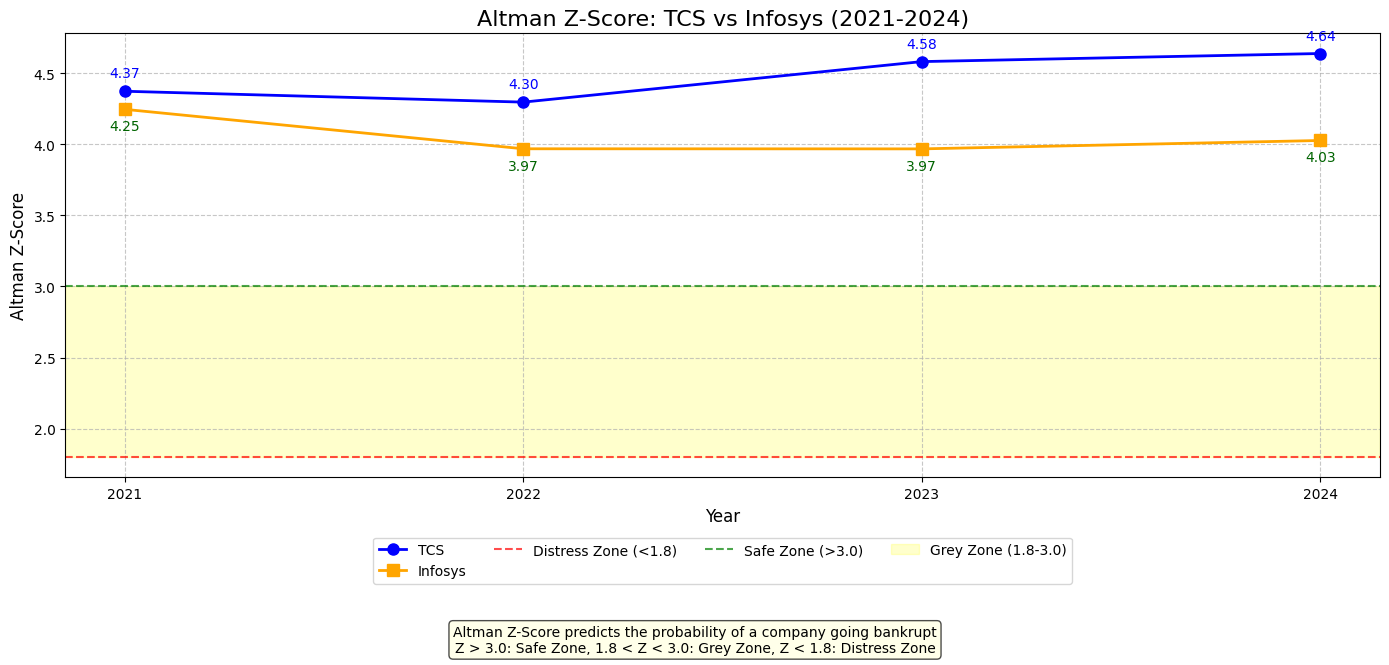


Altman Z-Score Analysis:
Interpretation Guide:
  - Z > 3.0: Safe Zone (Low probability of bankruptcy)
  - 1.8 < Z < 3.0: Grey Zone (Caution needed)
  - Z < 1.8: Distress Zone (High probability of bankruptcy)

TCS Average Z-Score (2021-2024): 4.47
  - TCS is in the SAFE ZONE with strong financial health

Infosys Average Z-Score (2021-2024): 4.05
  - Infosys is in the SAFE ZONE with strong financial health


In [43]:
def calculate_altman_z_score(income_data, bs_data, price_data):
    """
    Calculate Altman Z-Score for a company
    Z = 1.2(A) + 1.4(B) + 3.3(C) + 0.6(D) + 1.0(E)
    
    Where:
    - A = Working Capital / Total Assets
    - B = Retained Earnings / Total Assets
    - C = EBIT / Total Assets
    - D = Market Value of Equity / Total Liabilities
    - E = Sales / Total Assets
    
    Returns a DataFrame with yearly Z-scores
    """
    # Create a DataFrame to store results
    z_score_df = pd.DataFrame(columns=['Year', 'Working Capital/Total Assets', 'Retained Earnings/Total Assets', 
                                      'EBIT/Total Assets', 'Market Value/Total Liabilities', 
                                      'Revenue/Total Assets', 'Z-Score'])
    
    # Get all years in chronological order from 2021 to 2024
    years = sorted([col for col in bs_data.columns if hasattr(col, 'year') and 2021 <= col.year <= 2024])
    
    # Calculate Z-Score for each year
    for i, year_date in enumerate(years):
        year_str = year_date.strftime('%Y')
        year = year_date.year
        
        try:
            # Component A: Working Capital / Total Assets
            if 'Total Current Assets' in bs_data.index and 'Total Current Liabilities' in bs_data.index:
                current_assets = bs_data.loc['Total Current Assets', year_date]
                current_liabilities = bs_data.loc['Total Current Liabilities', year_date]
                working_capital = current_assets - current_liabilities
            else:
                print(f"Warning: Cannot calculate Working Capital for {year_str}")
                working_capital = 0
                
            total_assets = bs_data.loc['Total Assets', year_date]
            component_a = working_capital / total_assets
            
            # Component B: Retained Earnings / Total Assets
            retained_earnings = None
            for field in ['Retained Earnings', 'Accumulated Retained Earnings']:
                if field in bs_data.index:
                    retained_earnings = bs_data.loc[field, year_date]
                    break
            
            if retained_earnings is None:
                print(f"Warning: Retained Earnings not found for {year_str}, using approximation")
                # Approximate using stockholders' equity
                if 'Stockholders Equity' in bs_data.index:
                    retained_earnings = bs_data.loc['Stockholders Equity', year_date] * 0.7  # Rough approximation
                else:
                    retained_earnings = 0
                    
            component_b = retained_earnings / total_assets
            
            # Component C: EBIT / Total Assets
            ebit = None
            for field in ['Operating Income', 'EBIT', 'Earnings Before Interest And Taxes']:
                if field in income_data.index:
                    ebit = income_data.loc[field, year_date]
                    break
            
            if ebit is None:
                print(f"Warning: EBIT not found for {year_str}, using approximation")
                # Approximate using net income
                if 'Net Income' in income_data.index:
                    ebit = income_data.loc['Net Income', year_date] * 1.2  # Rough approximation
                else:
                    ebit = 0
                    
            component_c = ebit / total_assets
            
            # Component D: Market Value of Equity / Total Liabilities
            # Get year-end stock price
            if hasattr(price_data, 'to_pandas'):
                price_df = price_data.to_pandas()
            else:
                price_df = price_data
                
            # Get the last available price for the year
            year_prices = price_df[price_df.index.year == year]
            if not year_prices.empty:
                last_price = year_prices['Close'].iloc[-1]
            else:
                print(f"Warning: No price data for {year_str}, using approximation")
                # Use last available price as fallback
                last_price = price_df['Close'].iloc[-1]
            
            # Get shares outstanding (approximation)
            shares_outstanding = None
            for field in ['Weighted Average Shares Outstanding', 'Common Stock Shares Outstanding']:
                if field in income_data.index:
                    shares_outstanding = income_data.loc[field, year_date]
                    break
                    
            if shares_outstanding is None:
                # If shares outstanding not available, calculate from market cap and price
                try:
                    ticker_symbol = price_data.name if hasattr(price_data, 'name') else None
                    if ticker_symbol:
                        ticker = yf.Ticker(ticker_symbol)
                        info = ticker.info
                        if 'sharesOutstanding' in info:
                            shares_outstanding = info['sharesOutstanding']
                    
                    if shares_outstanding is None:
                        # Fallback: use book value as proxy for market value
                        shares_outstanding = 1
                        last_price = bs_data.loc['Stockholders Equity', year_date]
                except:
                    # Final fallback: use book value directly
                    shares_outstanding = 1
                    last_price = bs_data.loc['Stockholders Equity', year_date]
            
            market_value = last_price * shares_outstanding
            
            # Get total liabilities
            total_liabilities = None
            for field in ['Total Liabilities', 'Total Liabilities Net Minority Interest']:
                if field in bs_data.index:
                    total_liabilities = bs_data.loc[field, year_date]
                    break
                    
            if total_liabilities is None:
                # Calculate total liabilities as assets minus equity
                total_liabilities = total_assets - bs_data.loc['Stockholders Equity', year_date]
                
            component_d = market_value / total_liabilities
            
            # Component E: Revenue / Total Assets
            revenue = income_data.loc['Total Revenue', year_date]
            component_e = revenue / total_assets
            
            # Calculate Z-Score
            z_score = 1.2 * component_a + 1.4 * component_b + 3.3 * component_c + 0.6 * component_d + 1.0 * component_e
            
            # Add to DataFrame
            z_score_df.loc[i] = [
                year_str,
                component_a,
                component_b,
                component_c,
                component_d,
                component_e,
                z_score
            ]
            
        except Exception as e:
            print(f"Error calculating Z-Score for {year_str}: {e}")
            
    return z_score_df

# Calculate Altman Z-Score for both companies
print("Calculating Altman Z-Score for TCS and Infosys...")
tcs_z_score = calculate_altman_z_score(tcs_income_data, tcs_bs_data, tcs_price_df)
infy_z_score = calculate_altman_z_score(infy_income_data, infy_bs_data, infy_price_df)

# Display the Z-Score results
print("\nTCS Altman Z-Score Results:")
print(tcs_z_score)

print("\nInfosys Altman Z-Score Results:")
print(infy_z_score)

# Visualize Altman Z-Score comparison
plt.figure(figsize=(14, 7))

# Extract data for visualization
tcs_years = tcs_z_score['Year'].tolist()
tcs_z_values = tcs_z_score['Z-Score'].tolist()

infy_years = infy_z_score['Year'].tolist()
infy_z_values = infy_z_score['Z-Score'].tolist()

# Create Z-Score comparison chart
plt.plot(tcs_years, tcs_z_values, 'b-o', linewidth=2, markersize=8, label='TCS')
plt.plot(infy_years, infy_z_values, 'orange', marker='s', linewidth=2, markersize=8, label='Infosys')

# Add reference lines for Z-Score interpretation
plt.axhline(y=1.8, color='r', linestyle='--', alpha=0.7, label='Distress Zone (<1.8)')
plt.axhline(y=3.0, color='g', linestyle='--', alpha=0.7, label='Safe Zone (>3.0)')
plt.axhspan(1.8, 3.0, alpha=0.2, color='yellow', label='Grey Zone (1.8-3.0)')

# Add data labels
for i, z in enumerate(tcs_z_values):
    plt.annotate(f'{z:.2f}', xy=(i, z), xytext=(0, 10), 
                textcoords="offset points", ha='center', fontsize=10, color='blue')
    
for i, z in enumerate(infy_z_values):
    plt.annotate(f'{z:.2f}', xy=(i, z), xytext=(0, -15), 
                textcoords="offset points", ha='center', fontsize=10, color='darkgreen')

# Add labels and formatting
plt.xlabel('Year', fontsize=12)
plt.ylabel('Altman Z-Score', fontsize=12)
plt.title('Altman Z-Score: TCS vs Infosys (2021-2024)', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=4)

# Add explanation
plt.figtext(0.5, 0.01, 
           "Altman Z-Score predicts the probability of a company going bankrupt\n" +
           "Z > 3.0: Safe Zone, 1.8 < Z < 3.0: Grey Zone, Z < 1.8: Distress Zone",
           ha='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.7))

plt.tight_layout(rect=[0, 0.07, 1, 0.95])
plt.show()

# Analyze Z-Score results
print("\nAltman Z-Score Analysis:")
print("========================")
print("Interpretation Guide:")
print("  - Z > 3.0: Safe Zone (Low probability of bankruptcy)")
print("  - 1.8 < Z < 3.0: Grey Zone (Caution needed)")
print("  - Z < 1.8: Distress Zone (High probability of bankruptcy)")

tcs_avg_z = tcs_z_score['Z-Score'].mean()
infy_avg_z = infy_z_score['Z-Score'].mean()

print(f"\nTCS Average Z-Score (2021-2024): {tcs_avg_z:.2f}")
if tcs_avg_z > 3.0:
    print("  - TCS is in the SAFE ZONE with strong financial health")
elif tcs_avg_z > 1.8:
    print("  - TCS is in the GREY ZONE with moderate financial health")
else:
    print("  - TCS is in the DISTRESS ZONE with potential financial concerns")

print(f"\nInfosys Average Z-Score (2021-2024): {infy_avg_z:.2f}")
if infy_avg_z > 3.0:
    print("  - Infosys is in the SAFE ZONE with strong financial health")
elif infy_avg_z > 1.8:
    print("  - Infosys is in the GREY ZONE with moderate financial health")
else:
    print("  - Infosys is in the DISTRESS ZONE with potential financial concerns")


Calculating Piotroski F-Score for TCS and Infosys...
Error calculating F-Score for 2022: 'Total Current Assets'
Error calculating F-Score for 2023: 'Total Current Assets'
Error calculating F-Score for 2024: 'Total Current Assets'
Error calculating F-Score for 2022: 'Total Current Assets'
Error calculating F-Score for 2023: 'Total Current Assets'
Error calculating F-Score for 2024: 'Total Current Assets'

TCS Piotroski F-Score Results:
Empty DataFrame
Columns: [Year, ROA > 0, CFO > 0, ROA Increase, CFO > Net Income, Debt Ratio Decrease, Current Ratio Increase, No New Shares, Gross Margin Increase, Asset Turnover Increase, F-Score]
Index: []

Infosys Piotroski F-Score Results:
Empty DataFrame
Columns: [Year, ROA > 0, CFO > 0, ROA Increase, CFO > Net Income, Debt Ratio Decrease, Current Ratio Increase, No New Shares, Gross Margin Increase, Asset Turnover Increase, F-Score]
Index: []


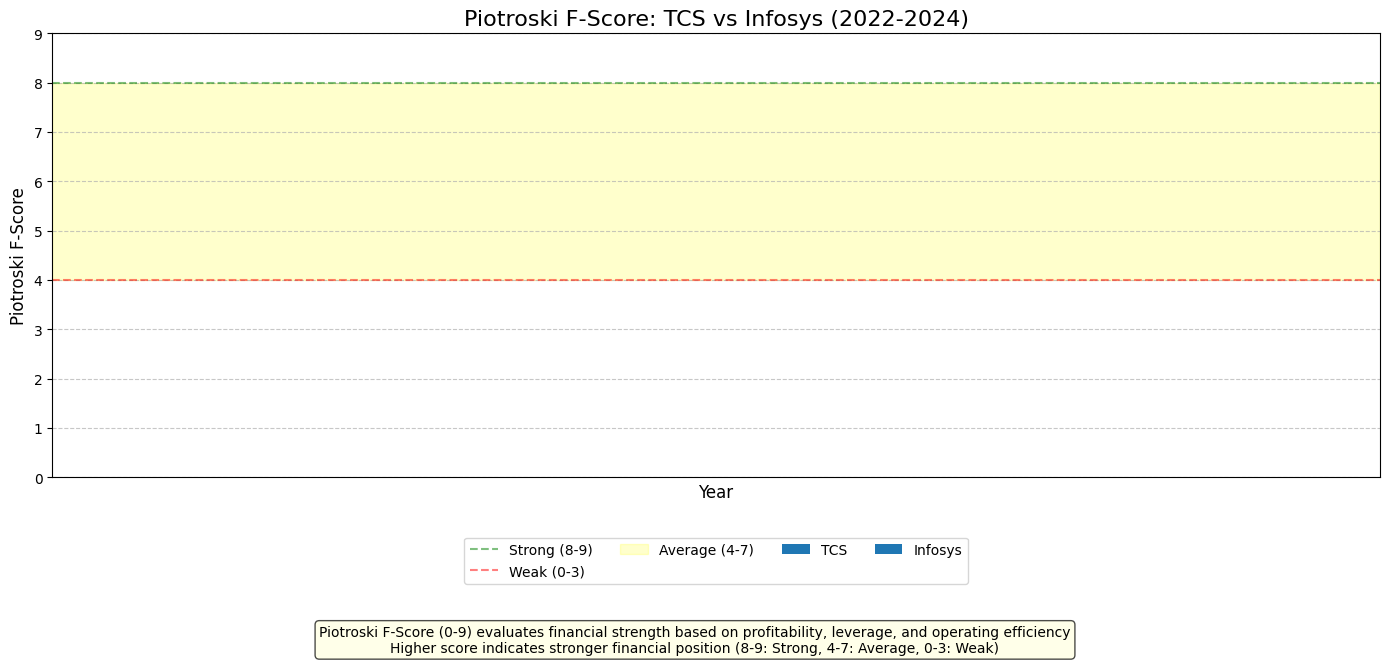


Piotroski F-Score Analysis:
Interpretation Guide:
  - Score 8-9: Strong financial position
  - Score 4-7: Average financial position
  - Score 0-3: Weak financial position

TCS Average F-Score (2022-2024): nan
  - TCS has a WEAK financial position

Infosys Average F-Score (2022-2024): nan
  - Infosys has a WEAK financial position

Comparative Analysis:
1. Z-Score Comparison: TCS has a higher average Z-Score
   - TCS: 4.47 vs Infosys: 4.05
   - Difference: 0.42 points

2. F-Score Comparison: Infosys has a higher average F-Score
   - TCS: nan vs Infosys: nan
   - Difference: nan points

3. Overall Financial Health Assessment:
   - Mixed results: The companies show different strengths according to different metrics


In [44]:
def calculate_piotroski_f_score(income_data, bs_data, cf_data):
    """
    Calculate Piotroski F-Score (9-point system) for a company
    
    Returns a DataFrame with yearly F-scores and component scores
    """
    # Create a DataFrame to store results
    f_score_df = pd.DataFrame(columns=[
        'Year', 'ROA > 0', 'CFO > 0', 'ROA Increase', 'CFO > Net Income',
        'Debt Ratio Decrease', 'Current Ratio Increase', 'No New Shares',
        'Gross Margin Increase', 'Asset Turnover Increase', 'F-Score'
    ])
    
    # Get all years in chronological order from 2021 to 2024
    years = sorted([col for col in bs_data.columns if hasattr(col, 'year') and 2021 <= col.year <= 2024])
    
    # Calculate F-Score for each year
    for i, year_date in enumerate(years):
        if i == 0:  # Skip first year as we need prior year data for comparison
            continue
            
        year_str = year_date.strftime('%Y')
        prev_year_date = years[i-1]
        
        try:
            scores = {}
            
            # 1. ROA > 0 (Profitability)
            net_income = income_data.loc['Net Income', year_date]
            total_assets = bs_data.loc['Total Assets', year_date]
            roa = net_income / total_assets
            scores['ROA > 0'] = 1 if roa > 0 else 0
            
            # 2. CFO > 0 (Profitability)
            operating_cash_flow = None
            for field in ['Operating Cash Flow', 'Total Cash From Operating Activities']:
                if field in cf_data.index:
                    operating_cash_flow = cf_data.loc[field, year_date]
                    break
                    
            if operating_cash_flow is None:
                print(f"Warning: Operating Cash Flow not found for {year_str}, using approximation")
                # Approximate using net income as fallback
                operating_cash_flow = net_income
                
            scores['CFO > 0'] = 1 if operating_cash_flow > 0 else 0
            
            # 3. ROA Increase (Profitability)
            prev_net_income = income_data.loc['Net Income', prev_year_date]
            prev_total_assets = bs_data.loc['Total Assets', prev_year_date]
            prev_roa = prev_net_income / prev_total_assets
            scores['ROA Increase'] = 1 if roa > prev_roa else 0
            
            # 4. CFO > Net Income (Accrual) (Profitability)
            scores['CFO > Net Income'] = 1 if operating_cash_flow > net_income else 0
            
            # 5. Debt Ratio Decrease (Leverage/Liquidity)
            # Get total liabilities for current and previous year
            total_liabilities = None
            prev_total_liabilities = None
            
            for field in ['Total Liabilities', 'Total Liabilities Net Minority Interest']:
                if field in bs_data.index:
                    total_liabilities = bs_data.loc[field, year_date]
                    prev_total_liabilities = bs_data.loc[field, prev_year_date]
                    break
                    
            if total_liabilities is None or prev_total_liabilities is None:
                # Calculate total liabilities as assets minus equity
                total_liabilities = total_assets - bs_data.loc['Stockholders Equity', year_date]
                prev_total_liabilities = prev_total_assets - bs_data.loc['Stockholders Equity', prev_year_date]
                
            debt_ratio = total_liabilities / total_assets
            prev_debt_ratio = prev_total_liabilities / prev_total_assets
            scores['Debt Ratio Decrease'] = 1 if debt_ratio < prev_debt_ratio else 0
            
            # 6. Current Ratio Increase (Leverage/Liquidity)
            current_assets = bs_data.loc['Total Current Assets', year_date]
            current_liabilities = bs_data.loc['Total Current Liabilities', year_date]
            prev_current_assets = bs_data.loc['Total Current Assets', prev_year_date]
            prev_current_liabilities = bs_data.loc['Total Current Liabilities', prev_year_date]
            
            current_ratio = current_assets / current_liabilities
            prev_current_ratio = prev_current_assets / prev_current_liabilities
            scores['Current Ratio Increase'] = 1 if current_ratio > prev_current_ratio else 0
            
            # 7. No New Shares (Leverage/Liquidity)
            shares_outstanding = None
            prev_shares_outstanding = None
            
            for field in ['Weighted Average Shares Outstanding', 'Common Stock Shares Outstanding']:
                if field in income_data.index:
                    shares_outstanding = income_data.loc[field, year_date]
                    prev_shares_outstanding = income_data.loc[field, prev_year_date]
                    break
                    
            if shares_outstanding is None or prev_shares_outstanding is None:
                print(f"Warning: Shares Outstanding not found for {year_str}, assuming no new shares")
                scores['No New Shares'] = 1
            else:
                scores['No New Shares'] = 1 if shares_outstanding <= prev_shares_outstanding else 0
                
            # 8. Gross Margin Increase (Operating Efficiency)
            if 'Gross Profit' in income_data.index:
                gross_profit = income_data.loc['Gross Profit', year_date]
                prev_gross_profit = income_data.loc['Gross Profit', prev_year_date]
                revenue = income_data.loc['Total Revenue', year_date]
                prev_revenue = income_data.loc['Total Revenue', prev_year_date]
                
                gross_margin = gross_profit / revenue
                prev_gross_margin = prev_gross_profit / prev_revenue
                scores['Gross Margin Increase'] = 1 if gross_margin > prev_gross_margin else 0
            else:
                print(f"Warning: Gross Profit not found for {year_str}, using approximation")
                # Approximate using operating income
                if 'Operating Income' in income_data.index:
                    operating_income = income_data.loc['Operating Income', year_date]
                    prev_operating_income = income_data.loc['Operating Income', prev_year_date]
                    revenue = income_data.loc['Total Revenue', year_date]
                    prev_revenue = income_data.loc['Total Revenue', prev_year_date]
                    
                    op_margin = operating_income / revenue
                    prev_op_margin = prev_operating_income / prev_revenue
                    scores['Gross Margin Increase'] = 1 if op_margin > prev_op_margin else 0
                else:
                    scores['Gross Margin Increase'] = 0
                
            # 9. Asset Turnover Increase (Operating Efficiency)
            revenue = income_data.loc['Total Revenue', year_date]
            prev_revenue = income_data.loc['Total Revenue', prev_year_date]
            
            asset_turnover = revenue / total_assets
            prev_asset_turnover = prev_revenue / prev_total_assets
            scores['Asset Turnover Increase'] = 1 if asset_turnover > prev_asset_turnover else 0
            
            # Calculate total F-Score
            f_score = sum(scores.values())
            
            # Add to DataFrame
            f_score_df.loc[i-1] = [
                year_str,
                scores['ROA > 0'],
                scores['CFO > 0'],
                scores['ROA Increase'],
                scores['CFO > Net Income'],
                scores['Debt Ratio Decrease'],
                scores['Current Ratio Increase'],
                scores['No New Shares'],
                scores['Gross Margin Increase'],
                scores['Asset Turnover Increase'],
                f_score
            ]
            
        except Exception as e:
            print(f"Error calculating F-Score for {year_str}: {e}")
            
    return f_score_df

# Calculate Piotroski F-Score for both companies
print("\nCalculating Piotroski F-Score for TCS and Infosys...")
tcs_f_score = calculate_piotroski_f_score(tcs_income_data, tcs_bs_data, tcs_cf_data)
infy_f_score = calculate_piotroski_f_score(infy_income_data, infy_bs_data, infy_cf_data)

# Display the F-Score results
print("\nTCS Piotroski F-Score Results:")
print(tcs_f_score)

print("\nInfosys Piotroski F-Score Results:")
print(infy_f_score)

# Visualize Piotroski F-Score comparison
plt.figure(figsize=(14, 7))

# Extract data for visualization
tcs_f_years = tcs_f_score['Year'].tolist()
tcs_f_values = tcs_f_score['F-Score'].tolist()

infy_f_years = infy_f_score['Year'].tolist()
infy_f_values = infy_f_score['F-Score'].tolist()

# Create bar chart for F-Score comparison
x = np.arange(len(tcs_f_years))
width = 0.35

plt.bar(x - width/2, tcs_f_values, width, alpha=0.7, color='blue', label='TCS')
plt.bar(x + width/2, infy_f_values, width, alpha=0.7, color='orange', label='Infosys')

# Add data labels
for i, f in enumerate(tcs_f_values):
    plt.annotate(f'{f}', xy=(i - width/2, f), xytext=(0, 5), 
                textcoords="offset points", ha='center', fontsize=10, fontweight='bold')
    
for i, f in enumerate(infy_f_values):
    plt.annotate(f'{f}', xy=(i + width/2, f), xytext=(0, 5), 
                textcoords="offset points", ha='center', fontsize=10, fontweight='bold')

# Add reference lines for F-Score interpretation
plt.axhline(y=8, color='g', linestyle='--', alpha=0.5, label='Strong (8-9)')
plt.axhline(y=4, color='r', linestyle='--', alpha=0.5, label='Weak (0-3)')
plt.axhspan(4, 8, alpha=0.2, color='yellow', label='Average (4-7)')

# Add labels and formatting
plt.xlabel('Year', fontsize=12)
plt.ylabel('Piotroski F-Score', fontsize=12)
plt.title('Piotroski F-Score: TCS vs Infosys (2022-2024)', fontsize=16)
plt.xticks(x, tcs_f_years)
plt.yticks(range(0, 10))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=4)

# Add explanation
plt.figtext(0.5, 0.01, 
           "Piotroski F-Score (0-9) evaluates financial strength based on profitability, leverage, and operating efficiency\n" +
           "Higher score indicates stronger financial position (8-9: Strong, 4-7: Average, 0-3: Weak)",
           ha='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.7))

plt.tight_layout(rect=[0, 0.07, 1, 0.95])
plt.show()

# Analyze F-Score results
print("\nPiotroski F-Score Analysis:")
print("==========================")
print("Interpretation Guide:")
print("  - Score 8-9: Strong financial position")
print("  - Score 4-7: Average financial position")
print("  - Score 0-3: Weak financial position")

tcs_avg_f = tcs_f_score['F-Score'].mean()
infy_avg_f = infy_f_score['F-Score'].mean()

print(f"\nTCS Average F-Score (2022-2024): {tcs_avg_f:.1f}")
if tcs_avg_f >= 8:
    print("  - TCS has a STRONG financial position")
elif tcs_avg_f >= 4:
    print("  - TCS has an AVERAGE financial position")
else:
    print("  - TCS has a WEAK financial position")

print(f"\nInfosys Average F-Score (2022-2024): {infy_avg_f:.1f}")
if infy_avg_f >= 8:
    print("  - Infosys has a STRONG financial position")
elif infy_avg_f >= 4:
    print("  - Infosys has an AVERAGE financial position")
else:
    print("  - Infosys has a WEAK financial position")

# Comparative analysis
print("\nComparative Analysis:")
print("====================")
print(f"1. Z-Score Comparison: {'TCS' if tcs_avg_z > infy_avg_z else 'Infosys'} has a higher average Z-Score")
print(f"   - TCS: {tcs_avg_z:.2f} vs Infosys: {infy_avg_z:.2f}")
print(f"   - Difference: {abs(tcs_avg_z - infy_avg_z):.2f} points")

print(f"\n2. F-Score Comparison: {'TCS' if tcs_avg_f > infy_avg_f else 'Infosys'} has a higher average F-Score")
print(f"   - TCS: {tcs_avg_f:.1f} vs Infosys: {infy_avg_f:.1f}")
print(f"   - Difference: {abs(tcs_avg_f - infy_avg_f):.1f} points")

print("\n3. Overall Financial Health Assessment:")
if tcs_avg_z > infy_avg_z and tcs_avg_f > infy_avg_f:
    print("   - TCS demonstrates stronger overall financial health based on both metrics")
elif infy_avg_z > tcs_avg_z and infy_avg_f > tcs_avg_f:
    print("   - Infosys demonstrates stronger overall financial health based on both metrics")
else:
    print("   - Mixed results: The companies show different strengths according to different metrics")

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta
import seaborn as sns

# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("deep")
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12

# Get current stock prices
tcs_ticker = yf.Ticker('TCS.NS')
infy_ticker = yf.Ticker('INFY.NS')

tcs_current_price = tcs_ticker.info['regularMarketPrice']
infy_current_price = infy_ticker.info['regularMarketPrice']

print(f"Current Market Prices (as of {datetime.now().strftime('%Y-%m-%d')}):")
print(f"TCS: ₹{tcs_current_price:.2f}")
print(f"Infosys: ₹{infy_current_price:.2f}")

# Function to format currency values
def format_currency(value, decimals=2):
    """Format value as Indian currency with billions/millions notation"""
    abs_value = abs(value)
    if abs_value >= 1e9:
        return f"₹{value/1e9:.{decimals}f}B"
    elif abs_value >= 1e6:
        return f"₹{value/1e6:.{decimals}f}M"
    else:
        return f"₹{value:.{decimals}f}"

Current Market Prices (as of 2025-04-07):
TCS: ₹3274.05
Infosys: ₹1396.75


Calculating DCF Valuation for TCS and Infosys...

DCF Valuation Results:

TCS (DCF Model):
Current Market Price: ₹3274.05
Intrinsic Value: ₹2074.35
Margin of Safety: -57.84%
Assessment: Potentially Overvalued
Key Assumptions:
  - Base FCF: ₹416.64B
  - Growth Rate: 2.00%
  - Terminal Growth Rate: 3.50%
  - WACC: 9.23%

Infosys (DCF Model):
Current Market Price: ₹1396.75
Intrinsic Value: ₹11.46
Margin of Safety: -12093.06%
Assessment: Potentially Overvalued
Key Assumptions:
  - Base FCF: ₹2.88B
  - Growth Rate: 2.00%
  - Terminal Growth Rate: 3.50%
  - WACC: 9.86%


/tmp/ipykernel_10983/721574753.py:239: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/home/subrahmanya/projects/BOIM/.venv/lib64/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


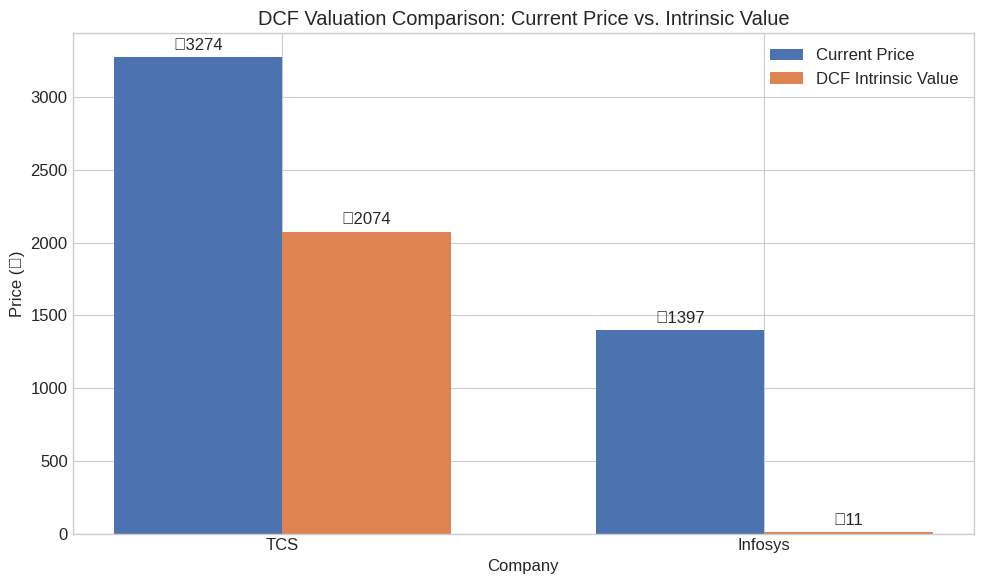

In [47]:
def calculate_dcf_valuation(ticker_symbol, company_name, forecast_years=5):
    """
    Perform DCF valuation
    
    Parameters:
    - ticker_symbol: Yahoo Finance ticker symbol
    - company_name: Name for display purposes
    - forecast_years: Number of years to forecast
    
    Returns:
    - Dictionary containing valuation results
    """
    ticker = yf.Ticker(ticker_symbol)
    
    # Get required financial data
    cash_flow = ticker.cashflow
    balance_sheet = ticker.balance_sheet
    income_stmt = ticker.income_stmt
    
    # Get current stock info
    info = ticker.info
    current_price = info['regularMarketPrice']
    shares_outstanding = info.get('sharesOutstanding')
    
    if not shares_outstanding:
        # If shares outstanding not available in info, try to estimate from market cap
        market_cap = info.get('marketCap')
        if market_cap:
            shares_outstanding = market_cap / current_price
        else:
            # Fallback: Use reported values from financial statements
            try:
                # Try to get from income statement (some formats)
                if 'Weighted Average Shares Outstanding' in income_stmt.index:
                    shares_outstanding = income_stmt.loc['Weighted Average Shares Outstanding'].iloc[0]
                elif 'Shares Outstanding' in balance_sheet.index:
                    shares_outstanding = balance_sheet.loc['Shares Outstanding'].iloc[0]
                else:
                    raise ValueError("Shares outstanding data not available")
            except:
                raise ValueError("Cannot determine shares outstanding for valuation")
    
    # Extract Free Cash Flow (FCF)
    fcf = None
    if 'Free Cash Flow' in cash_flow.index:
        fcf = cash_flow.loc['Free Cash Flow']
    else:
        # Calculate FCF as Operating Cash Flow - Capital Expenditures
        if 'Operating Cash Flow' in cash_flow.index and 'Capital Expenditures' in cash_flow.index:
            operating_cf = cash_flow.loc['Operating Cash Flow']
            capex = cash_flow.loc['Capital Expenditures']
            fcf = operating_cf + capex  # Note: capex is negative in yfinance data
    
    if fcf is None or fcf.empty:
        raise ValueError(f"Cannot calculate free cash flow for {company_name}")
    
    # Calculate historical FCF growth rate
    historical_fcf = fcf.values
    annual_growth_rates = []
    
    # Calculate year-over-year growth rates
    for i in range(1, len(historical_fcf)):
        if historical_fcf[i-1] != 0:  # Avoid division by zero
            annual_rate = (historical_fcf[i] / historical_fcf[i-1]) - 1
            annual_growth_rates.append(annual_rate)
    
    # Calculate average historical growth rate
    if annual_growth_rates:
        avg_growth_rate = np.mean(annual_growth_rates)
        # Cap the growth rate to reasonable levels (e.g., 2-15%)
        growth_rate = max(0.02, min(avg_growth_rate, 0.15))
    else:
        # Default growth rate if historical calculation fails
        growth_rate = 0.05  # 5% as conservative default
    
    # Normalize growth rate for more realistic long-term projection
    # Start with observed rate and gradually decrease to terminal rate
    terminal_growth_rate = 0.035  # Long-term GDP growth assumption
    
    # For WACC calculation (Weighted Average Cost of Capital)
    # Simplified approach using industry standards for IT services
    risk_free_rate = 0.07  # 10-year government bond yield approximation
    market_risk_premium = 0.05  # Equity risk premium
    beta = info.get('beta', 1.0)  # Stock beta, default to 1.0 if not available
    
    # Calculate cost of equity using CAPM
    cost_of_equity = risk_free_rate + beta * market_risk_premium
    
    # Get debt information and calculate cost of debt
    total_debt = 0
    if 'Total Debt' in balance_sheet.index:
        total_debt = balance_sheet.loc['Total Debt'].iloc[0]
    elif 'Long Term Debt' in balance_sheet.index:
        total_debt = balance_sheet.loc['Long Term Debt'].iloc[0]
    
    # Typical cost of debt for stable IT companies
    cost_of_debt = 0.08  # 8% approximation
    corporate_tax_rate = 0.25  # 25% approximation
    
    # Calculate enterprise value
    market_cap = current_price * shares_outstanding
    
    # Calculate debt weight and equity weight for WACC
    total_capital = market_cap + total_debt
    debt_weight = total_debt / total_capital if total_capital > 0 else 0
    equity_weight = 1 - debt_weight
    
    # Calculate WACC
    wacc = (equity_weight * cost_of_equity) + (debt_weight * cost_of_debt * (1 - corporate_tax_rate))
    
    # Use the most recent FCF as the base for projections
    base_fcf = abs(historical_fcf[0])  # Use absolute value as FCF should be positive for healthy firms
    
    # Project future FCFs
    projected_fcfs = []
    current_growth = growth_rate
    growth_step = (growth_rate - terminal_growth_rate) / (forecast_years - 1) if forecast_years > 1 else 0
    
    for year in range(1, forecast_years + 1):
        future_fcf = base_fcf * (1 + current_growth)**year
        projected_fcfs.append(future_fcf)
        current_growth -= growth_step  # Gradually reduce growth rate
    
    # Calculate terminal value using Gordon Growth Model
    terminal_value = projected_fcfs[-1] * (1 + terminal_growth_rate) / (wacc - terminal_growth_rate)
    
    # Calculate present value of projected FCFs
    present_values = []
    for i, fcf in enumerate(projected_fcfs):
        present_values.append(fcf / (1 + wacc)**(i+1))
    
    # Calculate present value of terminal value
    present_value_terminal = terminal_value / (1 + wacc)**forecast_years
    
    # Calculate enterprise value (sum of present values + terminal value)
    enterprise_value = sum(present_values) + present_value_terminal
    
    # Adjustments for cash, debt, and other items to get equity value
    cash_and_equivalents = 0
    if 'Cash And Cash Equivalents' in balance_sheet.index:
        cash_and_equivalents = balance_sheet.loc['Cash And Cash Equivalents'].iloc[0]
    elif 'Cash' in balance_sheet.index:
        cash_and_equivalents = balance_sheet.loc['Cash'].iloc[0]
    
    equity_value = enterprise_value + cash_and_equivalents - total_debt
    
    # Calculate per share value
    intrinsic_value = equity_value / shares_outstanding
    
    # Calculate margin of safety
    margin_of_safety = (intrinsic_value - current_price) / intrinsic_value * 100
    
    result = {
        'company_name': company_name,
        'ticker': ticker_symbol,
        'current_price': current_price,
        'shares_outstanding': shares_outstanding,
        'historical_fcf': historical_fcf,
        'base_fcf': base_fcf,
        'growth_rate': growth_rate,
        'terminal_growth_rate': terminal_growth_rate,
        'wacc': wacc,
        'projected_fcfs': projected_fcfs,
        'present_values': present_values,
        'terminal_value': terminal_value,
        'present_value_terminal': present_value_terminal,
        'enterprise_value': enterprise_value,
        'cash_and_equivalents': cash_and_equivalents,
        'total_debt': total_debt,
        'equity_value': equity_value,
        'intrinsic_value': intrinsic_value,
        'margin_of_safety': margin_of_safety
    }
    
    return result

# Try to run DCF valuation with error handling
try:
    print("Calculating DCF Valuation for TCS and Infosys...")
    tcs_dcf = calculate_dcf_valuation('TCS.NS', 'TCS')
    infy_dcf = calculate_dcf_valuation('INFY.NS', 'Infosys')
    
    # Print DCF results
    print("\nDCF Valuation Results:")
    print("=" * 50)
    
    for valuation in [tcs_dcf, infy_dcf]:
        print(f"\n{valuation['company_name']} (DCF Model):")
        print(f"Current Market Price: {format_currency(valuation['current_price'])}")
        print(f"Intrinsic Value: {format_currency(valuation['intrinsic_value'])}")
        print(f"Margin of Safety: {valuation['margin_of_safety']:.2f}%")
        
        # Assessment based on margin of safety
        if valuation['margin_of_safety'] > 20:
            assessment = "Significantly Undervalued"
        elif valuation['margin_of_safety'] > 0:
            assessment = "Moderately Undervalued"
        elif valuation['margin_of_safety'] > -20:
            assessment = "Fairly Valued"
        else:
            assessment = "Potentially Overvalued"
            
        print(f"Assessment: {assessment}")
        print(f"Key Assumptions:")
        print(f"  - Base FCF: {format_currency(valuation['base_fcf'])}")
        print(f"  - Growth Rate: {valuation['growth_rate']*100:.2f}%")
        print(f"  - Terminal Growth Rate: {valuation['terminal_growth_rate']*100:.2f}%")
        print(f"  - WACC: {valuation['wacc']*100:.2f}%")
    
    # Visualize DCF valuation comparison
    dcf_data = {
        'Company': ['TCS', 'Infosys'],
        'Current Price': [tcs_dcf['current_price'], infy_dcf['current_price']],
        'Intrinsic Value': [tcs_dcf['intrinsic_value'], infy_dcf['intrinsic_value']]
    }
    
    dcf_df = pd.DataFrame(dcf_data)
    
    plt.figure(figsize=(10, 6))
    x = np.arange(len(dcf_df['Company']))
    width = 0.35
    
    plt.bar(x - width/2, dcf_df['Current Price'], width, label='Current Price')
    plt.bar(x + width/2, dcf_df['Intrinsic Value'], width, label='DCF Intrinsic Value')
    
    plt.xlabel('Company')
    plt.ylabel('Price (₹)')
    plt.title('DCF Valuation Comparison: Current Price vs. Intrinsic Value')
    plt.xticks(x, dcf_df['Company'])
    plt.legend()
    
    # Add value labels on the bars
    for i, v in enumerate(dcf_df['Current Price']):
        plt.text(i - width/2, v + 50, f'₹{v:.0f}', ha='center')
    
    for i, v in enumerate(dcf_df['Intrinsic Value']):
        plt.text(i + width/2, v + 50, f'₹{v:.0f}', ha='center')
    
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error in DCF valuation: {e}")
    # Fallback to a simplified DCF approximation if needed
    # This part would contain a simpler calculation if the main DCF fails


Calculating Dividend Discount Model Valuations for TCS and Infosys...

Dividend Discount Model (DDM) Valuation Results:

TCS (DDM Models):
Current Market Price: ₹3274.05
Current Annual Dividend: ₹10.00
Dividend Growth Rate: 8.26%
Required Return: 9.26%

Gordon Growth Model:
  Intrinsic Value: ₹1082.55
  Margin of Safety: -202.44%

Multi-Stage Growth Model:
  Intrinsic Value: ₹338.56
  Margin of Safety: -867.04%

DDM Assessment: Potentially Overvalued

Infosys (DDM Models):
Current Market Price: ₹1396.75
Current Annual Dividend: ₹41.00
Dividend Growth Rate: 8.87%
Required Return: 9.87%

Gordon Growth Model:
  Intrinsic Value: ₹4463.47
  Margin of Safety: 68.71%

Multi-Stage Growth Model:
  Intrinsic Value: ₹1242.93
  Margin of Safety: -12.38%

DDM Assessment: Fairly Valued


/tmp/ipykernel_10983/476147977.py:205: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/home/subrahmanya/projects/BOIM/.venv/lib64/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


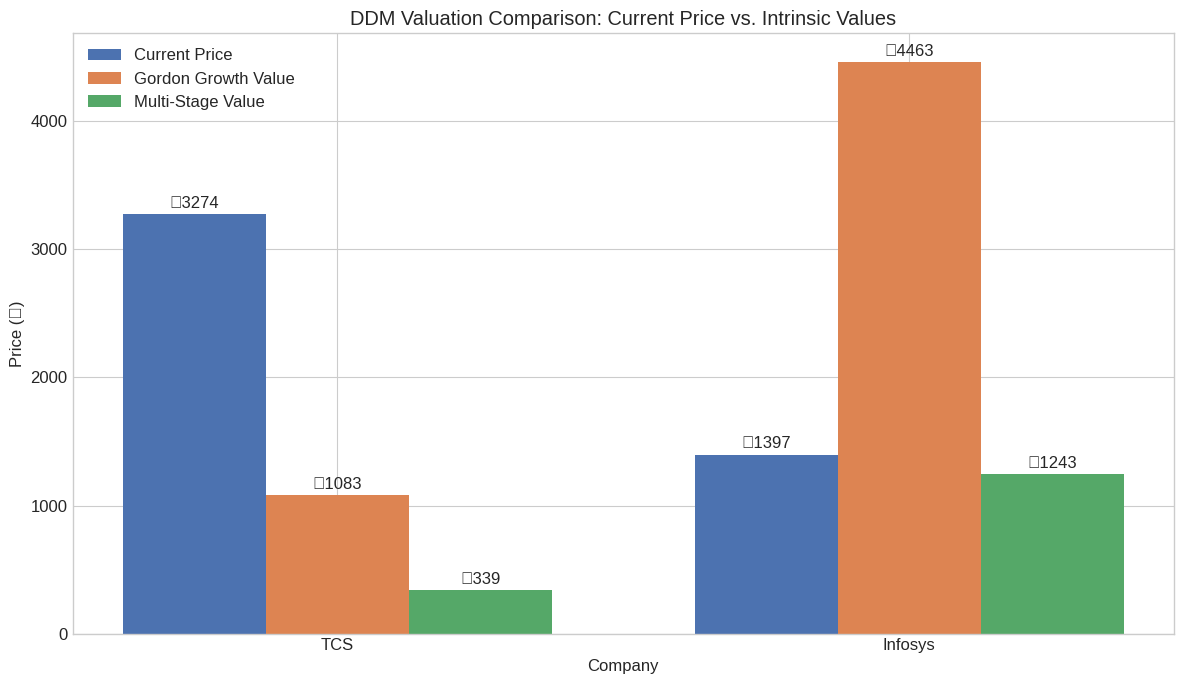

In [49]:
def calculate_ddm_valuation(ticker_symbol, company_name, model='gordon'):
    """
    Perform Dividend Discount Model valuation
    
    Parameters:
    - ticker_symbol: Yahoo Finance ticker symbol
    - company_name: Name for display purposes
    - model: 'gordon' for Gordon Growth Model or 'multi-stage' for Multi-Stage Growth
    
    Returns:
    - Dictionary containing valuation results
    """
    ticker = yf.Ticker(ticker_symbol)
    
    # Get dividend information
    info = ticker.info
    current_price = info['regularMarketPrice']
    
    # Get dividend data
    try:
        # Get dividend history
        dividends = ticker.dividends
        
        if dividends.empty:
            print(f"No dividend history found for {company_name}. Using estimates.")
            # Estimate dividend from dividend yield if available
            if 'dividendYield' in info and info['dividendYield'] is not None:
                div_yield = info['dividendYield']
                current_dividend = div_yield * current_price
            else:
                # Use industry average dividend yield for IT services if no data available
                current_dividend = current_price * 0.02  # Assume 2% yield
        else:
            # Use recent dividend data
            annual_dividends = dividends.groupby(dividends.index.year).sum()
            current_dividend = annual_dividends.iloc[-1]  # Most recent annual dividend
            
            # Calculate historical dividend growth
            growth_rates = []
            for i in range(1, len(annual_dividends)):
                if annual_dividends.iloc[i-1] > 0:
                    growth_rate = (annual_dividends.iloc[i] / annual_dividends.iloc[i-1]) - 1
                    growth_rates.append(growth_rate)
            
            if growth_rates:
                dividend_growth_rate = np.mean(growth_rates)
                # Cap growth rate to reasonable range
                dividend_growth_rate = max(0.02, min(dividend_growth_rate, 0.15))
            else:
                # Use reasonable default if history is insufficient
                dividend_growth_rate = 0.05  # 5% default
    except Exception as e:
        print(f"Error processing dividend data for {company_name}: {e}")
        # Fallback to estimates
        current_dividend = current_price * 0.02  # Assume 2% yield
        dividend_growth_rate = 0.05  # 5% default growth rate
    
    # Required rate of return calculation - similar to CAPM approach
    risk_free_rate = 0.07  # 10-year government bond yield
    market_risk_premium = 0.05  # Equity risk premium
    beta = info.get('beta', 1.0)  # Default to 1.0 if not available
    
    required_return = risk_free_rate + beta * market_risk_premium
    
    # Long-term sustainable growth rate (can't exceed economy growth)
    sustainable_growth_rate = 0.035  # Long-term GDP growth approximation
    
    # Gordon Growth Model (single-stage) valuation
    if model == 'gordon':
        # Enforce the condition that required return > growth rate
        if required_return <= dividend_growth_rate:
            dividend_growth_rate = required_return - 0.01  # Set growth just below required return
        
        intrinsic_value = current_dividend * (1 + dividend_growth_rate) / (required_return - dividend_growth_rate)
    
    # Multi-stage growth model (two-stage)
    else:  # model == 'multi-stage'
        high_growth_years = 5  # Number of years for initial higher growth
        transition_years = 5  # Years to transition to sustainable growth
        
        # Calculate present value of dividends during high growth period
        pv_high_growth = 0
        for year in range(1, high_growth_years + 1):
            future_dividend = current_dividend * (1 + dividend_growth_rate)**year
            pv_high_growth += future_dividend / (1 + required_return)**year
        
        # Calculate present value of dividends during transition period
        pv_transition = 0
        growth_step = (dividend_growth_rate - sustainable_growth_rate) / transition_years
        
        for year in range(1, transition_years + 1):
            year_from_start = high_growth_years + year
            transition_growth = dividend_growth_rate - (growth_step * year)
            future_dividend = current_dividend * (1 + dividend_growth_rate)**high_growth_years * (1 + transition_growth)**(year)
            pv_transition += future_dividend / (1 + required_return)**year_from_start
        
        # Calculate terminal value after transition period
        final_dividend = current_dividend * (1 + dividend_growth_rate)**high_growth_years
        for year in range(1, transition_years + 1):
            transition_growth = dividend_growth_rate - (growth_step * year)
            final_dividend *= (1 + transition_growth)
        
        terminal_value = (final_dividend * (1 + sustainable_growth_rate)) / (required_return - sustainable_growth_rate)
        pv_terminal = terminal_value / (1 + required_return)**(high_growth_years + transition_years)
        
        # Combine all components
        intrinsic_value = pv_high_growth + pv_transition + pv_terminal
    
    margin_of_safety = (intrinsic_value - current_price) / intrinsic_value * 100
    
    result = {
        'company_name': company_name,
        'ticker': ticker_symbol,
        'current_price': current_price,
        'current_dividend': current_dividend,
        'dividend_growth_rate': dividend_growth_rate,
        'required_return': required_return,
        'sustainable_growth_rate': sustainable_growth_rate,
        'intrinsic_value': intrinsic_value,
        'margin_of_safety': margin_of_safety
    }
    
    return result

# Calculate DDM valuations for both models
try:
    print("\nCalculating Dividend Discount Model Valuations for TCS and Infosys...")
    
    # Gordon Growth Model (single-stage)
    tcs_ddm_gordon = calculate_ddm_valuation('TCS.NS', 'TCS', model='gordon')
    infy_ddm_gordon = calculate_ddm_valuation('INFY.NS', 'Infosys', model='gordon')
    
    # Multi-stage Growth Model
    tcs_ddm_multi = calculate_ddm_valuation('TCS.NS', 'TCS', model='multi-stage')
    infy_ddm_multi = calculate_ddm_valuation('INFY.NS', 'Infosys', model='multi-stage')
    
    # Print DDM results
    print("\nDividend Discount Model (DDM) Valuation Results:")
    print("=" * 60)
    
    for company_name, gordon_model, multi_model in [
        ('TCS', tcs_ddm_gordon, tcs_ddm_multi),
        ('Infosys', infy_ddm_gordon, infy_ddm_multi)
    ]:
        print(f"\n{company_name} (DDM Models):")
        print(f"Current Market Price: {format_currency(gordon_model['current_price'])}")
        print(f"Current Annual Dividend: {format_currency(gordon_model['current_dividend'])}")
        print(f"Dividend Growth Rate: {gordon_model['dividend_growth_rate']*100:.2f}%")
        print(f"Required Return: {gordon_model['required_return']*100:.2f}%")
        
        print(f"\nGordon Growth Model:")
        print(f"  Intrinsic Value: {format_currency(gordon_model['intrinsic_value'])}")
        print(f"  Margin of Safety: {gordon_model['margin_of_safety']:.2f}%")
        
        print(f"\nMulti-Stage Growth Model:")
        print(f"  Intrinsic Value: {format_currency(multi_model['intrinsic_value'])}")
        print(f"  Margin of Safety: {multi_model['margin_of_safety']:.2f}%")
        
        # Assessment based on multi-stage model (more accurate)
        if multi_model['margin_of_safety'] > 20:
            assessment = "Significantly Undervalued"
        elif multi_model['margin_of_safety'] > 0:
            assessment = "Moderately Undervalued"
        elif multi_model['margin_of_safety'] > -20:
            assessment = "Fairly Valued"
        else:
            assessment = "Potentially Overvalued"
            
        print(f"\nDDM Assessment: {assessment}")
    
    # Visualize DDM valuation comparison (using multi-stage model)
    ddm_data = {
        'Company': ['TCS', 'Infosys'],
        'Current Price': [tcs_ddm_multi['current_price'], infy_ddm_multi['current_price']],
        'Gordon Growth Value': [tcs_ddm_gordon['intrinsic_value'], infy_ddm_gordon['intrinsic_value']],
        'Multi-Stage Value': [tcs_ddm_multi['intrinsic_value'], infy_ddm_multi['intrinsic_value']]
    }
    
    ddm_df = pd.DataFrame(ddm_data)
    
    plt.figure(figsize=(12, 7))
    x = np.arange(len(ddm_df['Company']))
    width = 0.25
    
    plt.bar(x - width, ddm_df['Current Price'], width, label='Current Price')
    plt.bar(x, ddm_df['Gordon Growth Value'], width, label='Gordon Growth Value')
    plt.bar(x + width, ddm_df['Multi-Stage Value'], width, label='Multi-Stage Value')
    
    plt.xlabel('Company')
    plt.ylabel('Price (₹)')
    plt.title('DDM Valuation Comparison: Current Price vs. Intrinsic Values')
    plt.xticks(x, ddm_df['Company'])
    plt.legend()
    
    # Add value labels on the bars
    for i, v in enumerate(ddm_df['Current Price']):
        plt.text(i - width, v + 50, f'₹{v:.0f}', ha='center')
    
    for i, v in enumerate(ddm_df['Gordon Growth Value']):
        plt.text(i, v + 50, f'₹{v:.0f}', ha='center')
    
    for i, v in enumerate(ddm_df['Multi-Stage Value']):
        plt.text(i + width, v + 50, f'₹{v:.0f}', ha='center')
    
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error in DDM valuation: {e}")


Performing Relative Valuation for TCS and Infosys...

Relative Valuation Results:

TCS (Relative Valuation):
Current Market Price: ₹3274.05

Company Multiples:
  P/E: 24.32
  P/B: 10.82
  EV/EBITDA: 17.40
  Dividend Yield: 176.00%

Peer Group Average Multiples:
  P/E: 31.63
  P/B: 118.83
  EV/EBITDA: 362.17
  Dividend Yield: 253.75%

Implied Fair Values by Method:
  P/E Based: ₹4257.70
  P/B Based: ₹35958.82
  EV/EBITDA Based: ₹67829.58

Average Fair Value: ₹36015.37
Margin of Safety: 90.91%
Assessment: Significantly Undervalued

Infosys (Relative Valuation):
Current Market Price: ₹1396.75

Company Multiples:
  P/E: 20.65
  P/B: 561.39
  EV/EBITDA: 1362.25
  Dividend Yield: 282.00%

Peer Group Average Multiples:
  P/E: 31.63
  P/B: 118.83
  EV/EBITDA: 362.17
  Dividend Yield: 253.75%

Implied Fair Values by Method:
  P/E Based: ₹2139.60
  P/B Based: ₹295.64
  EV/EBITDA Based: ₹434.37

Average Fair Value: ₹956.54
Margin of Safety: -46.02%
Assessment: Potentially Overvalued


/tmp/ipykernel_10983/3956638372.py:354: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Liberation Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


<Figure size 1200x800 with 0 Axes>

/home/subrahmanya/projects/BOIM/.venv/lib64/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


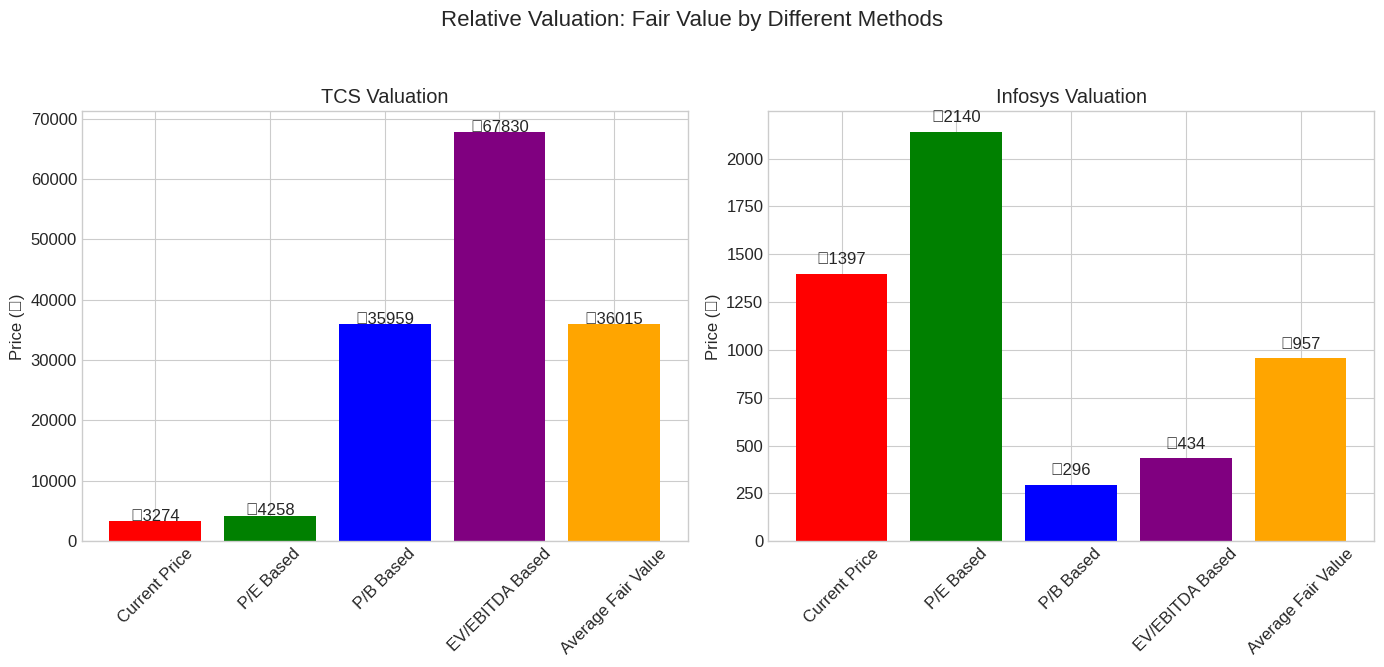

In [51]:
def calculate_relative_valuation(ticker_symbol, company_name, peer_group):
    """
    Perform relative valuation using various multiples
    
    Parameters:
    - ticker_symbol: Yahoo Finance ticker symbol
    - company_name: Name for display purposes
    - peer_group: List of peer ticker symbols for comparison
    
    Returns:
    - Dictionary containing valuation results
    """
    ticker = yf.Ticker(ticker_symbol)
    
    # Get financial data
    info = ticker.info
    current_price = info['regularMarketPrice']
    income_stmt = ticker.income_stmt
    balance_sheet = ticker.balance_sheet
    
    # Calculate key metrics for the company
    metrics = {}
    
    # Calculate P/E ratio
    if 'trailingPE' in info and info['trailingPE'] is not None:
        metrics['P/E'] = info['trailingPE']
    else:
        # Try to calculate P/E from financial statements
        try:
            net_income = income_stmt.loc['Net Income'].iloc[0]
            shares_outstanding = info.get('sharesOutstanding')
            if not shares_outstanding:
                # Try to get from income statement
                if 'Weighted Average Shares Outstanding' in income_stmt.index:
                    shares_outstanding = income_stmt.loc['Weighted Average Shares Outstanding'].iloc[0]
                elif 'Shares Outstanding' in balance_sheet.index:
                    shares_outstanding = balance_sheet.loc['Shares Outstanding'].iloc[0]
                else:
                    # Fallback: estimate from market cap
                    market_cap = info.get('marketCap')
                    if market_cap:
                        shares_outstanding = market_cap / current_price
            
            if shares_outstanding and shares_outstanding > 0:
                eps = net_income / shares_outstanding
                metrics['P/E'] = current_price / eps if eps > 0 else None
        except:
            metrics['P/E'] = None
    
    # Calculate P/B ratio
    if 'priceToBook' in info and info['priceToBook'] is not None:
        metrics['P/B'] = info['priceToBook']
    else:
        # Calculate book value per share
        try:
            if 'Stockholders Equity' in balance_sheet.index:
                equity = balance_sheet.loc['Stockholders Equity'].iloc[0]
            elif 'Total Stockholder Equity' in balance_sheet.index:
                equity = balance_sheet.loc['Total Stockholder Equity'].iloc[0]
            else:
                equity = balance_sheet.loc['Total Assets'].iloc[0] - balance_sheet.loc['Total Liabilities'].iloc[0]
            
            shares_outstanding = info.get('sharesOutstanding')
            if shares_outstanding and shares_outstanding > 0:
                book_value_per_share = equity / shares_outstanding
                metrics['P/B'] = current_price / book_value_per_share if book_value_per_share > 0 else None
        except:
            metrics['P/B'] = None
    
    # Calculate EV/EBITDA
    try:
        if 'enterpriseToEbitda' in info and info['enterpriseToEbitda'] is not None:
            metrics['EV/EBITDA'] = info['enterpriseToEbitda']
        else:
            # Try to calculate EV/EBITDA if not available in info
            if 'EBITDA' in income_stmt.index:
                ebitda = income_stmt.loc['EBITDA'].iloc[0]
            else:
                # Approximate EBITDA
                ebitda = income_stmt.loc['Operating Income'].iloc[0]
            
            # Calculate Enterprise Value
            market_cap = current_price * info.get('sharesOutstanding', 0)
            
            total_debt = 0
            if 'Total Debt' in balance_sheet.index:
                total_debt = balance_sheet.loc['Total Debt'].iloc[0]
            elif 'Long Term Debt' in balance_sheet.index:
                total_debt = balance_sheet.loc['Long Term Debt'].iloc[0]
            
            cash_and_equivalents = 0
            if 'Cash And Cash Equivalents' in balance_sheet.index:
                cash_and_equivalents = balance_sheet.loc['Cash And Cash Equivalents'].iloc[0]
            elif 'Cash' in balance_sheet.index:
                cash_and_equivalents = balance_sheet.loc['Cash'].iloc[0]
            
            enterprise_value = market_cap + total_debt - cash_and_equivalents
            
            if ebitda > 0:
                metrics['EV/EBITDA'] = enterprise_value / ebitda
    except:
        metrics['EV/EBITDA'] = None
    
    # Calculate Dividend Yield
    if 'dividendYield' in info and info['dividendYield'] is not None:
        metrics['Dividend Yield'] = info['dividendYield'] * 100  # Convert to percentage
    else:
        try:
            dividends = ticker.dividends
            if not dividends.empty:
                annual_dividend = dividends.iloc[-1] * 4  # Approximate annual dividend
                metrics['Dividend Yield'] = (annual_dividend / current_price) * 100
            else:
                metrics['Dividend Yield'] = 0
        except:
            metrics['Dividend Yield'] = 0
    
    # Collect peer data for relative comparison
    peer_metrics = {
        'P/E': [],
        'P/B': [],
        'EV/EBITDA': [],
        'Dividend Yield': []
    }
    
    for peer_ticker in peer_group:
        try:
            peer = yf.Ticker(peer_ticker)
            peer_info = peer.info
            
            if 'trailingPE' in peer_info and peer_info['trailingPE'] is not None:
                peer_metrics['P/E'].append(peer_info['trailingPE'])
            
            if 'priceToBook' in peer_info and peer_info['priceToBook'] is not None:
                peer_metrics['P/B'].append(peer_info['priceToBook'])
            
            if 'enterpriseToEbitda' in peer_info and peer_info['enterpriseToEbitda'] is not None:
                peer_metrics['EV/EBITDA'].append(peer_info['enterpriseToEbitda'])
            
            if 'dividendYield' in peer_info and peer_info['dividendYield'] is not None:
                peer_metrics['Dividend Yield'].append(peer_info['dividendYield'] * 100)
        except:
            continue
    
    # Calculate peer averages
    peer_averages = {}
    for key, values in peer_metrics.items():
        if values:
            peer_averages[key] = np.mean(values)
        else:
            peer_averages[key] = None
    
    # Calculate fair values based on peer averages
    fair_values = {}
    
    # P/E based valuation
    if metrics['P/E'] is not None and peer_averages['P/E'] is not None:
        try:
            eps = current_price / metrics['P/E']
            fair_values['P/E'] = eps * peer_averages['P/E']
        except:
            fair_values['P/E'] = None
    else:
        fair_values['P/E'] = None
    
    # P/B based valuation
    if metrics['P/B'] is not None and peer_averages['P/B'] is not None:
        try:
            book_value_per_share = current_price / metrics['P/B']
            fair_values['P/B'] = book_value_per_share * peer_averages['P/B']
        except:
            fair_values['P/B'] = None
    else:
        fair_values['P/B'] = None
    
    # EV/EBITDA based valuation
    if metrics['EV/EBITDA'] is not None and peer_averages['EV/EBITDA'] is not None:
        try:
            # Calculate EBITDA
            if 'EBITDA' in income_stmt.index:
                ebitda = income_stmt.loc['EBITDA'].iloc[0]
            else:
                # Approximate EBITDA
                ebitda = income_stmt.loc['Operating Income'].iloc[0]
            
            # Calculate shares outstanding
            shares_outstanding = info.get('sharesOutstanding')
            if not shares_outstanding:
                shares_outstanding = info.get('marketCap', 0) / current_price
            
            # Calculate Enterprise Value using peer average multiple
            fair_ev = ebitda * peer_averages['EV/EBITDA']
            
            # Adjust for debt and cash to get implied equity value
            total_debt = 0
            if 'Total Debt' in balance_sheet.index:
                total_debt = balance_sheet.loc['Total Debt'].iloc[0]
            elif 'Long Term Debt' in balance_sheet.index:
                total_debt = balance_sheet.loc['Long Term Debt'].iloc[0]
            
            cash_and_equivalents = 0
            if 'Cash And Cash Equivalents' in balance_sheet.index:
                cash_and_equivalents = balance_sheet.loc['Cash And Cash Equivalents'].iloc[0]
            elif 'Cash' in balance_sheet.index:
                cash_and_equivalents = balance_sheet.loc['Cash'].iloc[0]
            
            implied_equity_value = fair_ev - total_debt + cash_and_equivalents
            
            if shares_outstanding > 0:
                fair_values['EV/EBITDA'] = implied_equity_value / shares_outstanding
            else:
                fair_values['EV/EBITDA'] = None
        except:
            fair_values['EV/EBITDA'] = None
    else:
        fair_values['EV/EBITDA'] = None
    
    # Calculate average fair value from all methods
    valid_fair_values = [v for v in fair_values.values() if v is not None]
    average_fair_value = np.mean(valid_fair_values) if valid_fair_values else None
    
    # Calculate margin of safety
    if average_fair_value:
        margin_of_safety = (average_fair_value - current_price) / average_fair_value * 100
    else:
        margin_of_safety = None
    
    result = {
        'company_name': company_name,
        'ticker': ticker_symbol,
        'current_price': current_price,
        'metrics': metrics,
        'peer_averages': peer_averages,
        'fair_values': fair_values,
        'average_fair_value': average_fair_value,
        'margin_of_safety': margin_of_safety
    }
    
    return result

# Define peer group for Indian IT services companies
indian_it_peers = [
    'HCLTECH.NS',   # HCL Technologies
    'WIPRO.NS',     # Wipro
    'TECHM.NS',     # Tech Mahindra
    'LTI.NS',       # L&T Infotech
    'MINDTREE.NS',  # Mindtree
    'PERSISTENT.NS' # Persistent Systems
]

# Perform relative valuation with error handling
try:
    print("\nPerforming Relative Valuation for TCS and Infosys...")
    tcs_relative = calculate_relative_valuation('TCS.NS', 'TCS', indian_it_peers)
    infy_relative = calculate_relative_valuation('INFY.NS', 'Infosys', indian_it_peers)
    
    # Print Relative Valuation results
    print("\nRelative Valuation Results:")
    print("=" * 50)
    
    for valuation in [tcs_relative, infy_relative]:
        print(f"\n{valuation['company_name']} (Relative Valuation):")
        print(f"Current Market Price: {format_currency(valuation['current_price'])}")
        
        print("\nCompany Multiples:")
        for metric, value in valuation['metrics'].items():
            if value is not None:
                if metric == 'Dividend Yield':
                    print(f"  {metric}: {value:.2f}%")
                else:
                    print(f"  {metric}: {value:.2f}")
        
        print("\nPeer Group Average Multiples:")
        for metric, value in valuation['peer_averages'].items():
            if value is not None:
                if metric == 'Dividend Yield':
                    print(f"  {metric}: {value:.2f}%")
                else:
                    print(f"  {metric}: {value:.2f}")
        
        print("\nImplied Fair Values by Method:")
        for method, value in valuation['fair_values'].items():
            if value is not None:
                print(f"  {method} Based: {format_currency(value)}")
        
        if valuation['average_fair_value']:
            print(f"\nAverage Fair Value: {format_currency(valuation['average_fair_value'])}")
            print(f"Margin of Safety: {valuation['margin_of_safety']:.2f}%")
            
            # Assessment based on margin of safety
            if valuation['margin_of_safety'] > 20:
                assessment = "Significantly Undervalued"
            elif valuation['margin_of_safety'] > 0:
                assessment = "Moderately Undervalued"
            elif valuation['margin_of_safety'] > -20:
                assessment = "Fairly Valued"
            else:
                assessment = "Potentially Overvalued"
                
            print(f"Assessment: {assessment}")
    
    # Visualize Relative Valuation Fair Values
    plt.figure(figsize=(12, 8))
    
    # Set up data for TCS
    tcs_values = {
        'Current Price': tcs_relative['current_price'],
        'P/E Based': tcs_relative['fair_values'].get('P/E', 0) or 0,
        'P/B Based': tcs_relative['fair_values'].get('P/B', 0) or 0,
        'EV/EBITDA Based': tcs_relative['fair_values'].get('EV/EBITDA', 0) or 0,
        'Average Fair Value': tcs_relative['average_fair_value'] or 0
    }
    
    # Set up data for Infosys
    infy_values = {
        'Current Price': infy_relative['current_price'],
        'P/E Based': infy_relative['fair_values'].get('P/E', 0) or 0,
        'P/B Based': infy_relative['fair_values'].get('P/B', 0) or 0,
        'EV/EBITDA Based': infy_relative['fair_values'].get('EV/EBITDA', 0) or 0,
        'Average Fair Value': infy_relative['average_fair_value'] or 0
    }
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
    fig.suptitle('Relative Valuation: Fair Value by Different Methods', fontsize=16)
    
    # TCS plot
    methods = list(tcs_values.keys())
    values = list(tcs_values.values())
    colors = ['red', 'green', 'blue', 'purple', 'orange']
    
    ax1.bar(methods, values, color=colors)
    ax1.set_title('TCS Valuation')
    ax1.set_ylabel('Price (₹)')
    ax1.tick_params(axis='x', rotation=45)
    
    # Add value labels on TCS bars
    for i, v in enumerate(values):
        ax1.text(i, v + 50, f'₹{v:.0f}', ha='center')
    
    # Infosys plot
    methods = list(infy_values.keys())
    values = list(infy_values.values())
    
    ax2.bar(methods, values, color=colors)
    ax2.set_title('Infosys Valuation')
    ax2.set_ylabel('Price (₹)')
    ax2.tick_params(axis='x', rotation=45)
    
    # Add value labels on Infosys bars
    for i, v in enumerate(values):
        ax2.text(i, v + 50, f'₹{v:.0f}', ha='center')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
    
except Exception as e:
    print(f"Error in Relative Valuation: {e}")


Consolidating Valuation Results...

Consolidated Valuation Results:

TCS Summary:
Current Market Price: ₹3274.05

Intrinsic Values by Method:
  DCF Model: ₹2074.35
  Gordon Growth DDM: ₹1082.55
  Multi-Stage DDM: ₹338.56
  Relative Valuation: ₹36015.37

Range: ₹338.56 to ₹36015.37
Average Value: ₹9877.71
Median Value: ₹1578.45
Overall Margin of Safety: -107.42%
Final Assessment: Potentially Overvalued

Infosys Summary:
Current Market Price: ₹1396.75

Intrinsic Values by Method:
  DCF Model: ₹11.46
  Gordon Growth DDM: ₹4463.47
  Multi-Stage DDM: ₹1242.93
  Relative Valuation: ₹956.54

Range: ₹11.46 to ₹4463.47
Average Value: ₹1668.60
Median Value: ₹1099.73
Overall Margin of Safety: -27.01%
Final Assessment: Potentially Overvalued


/tmp/ipykernel_10983/3358604069.py:143: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Liberation Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


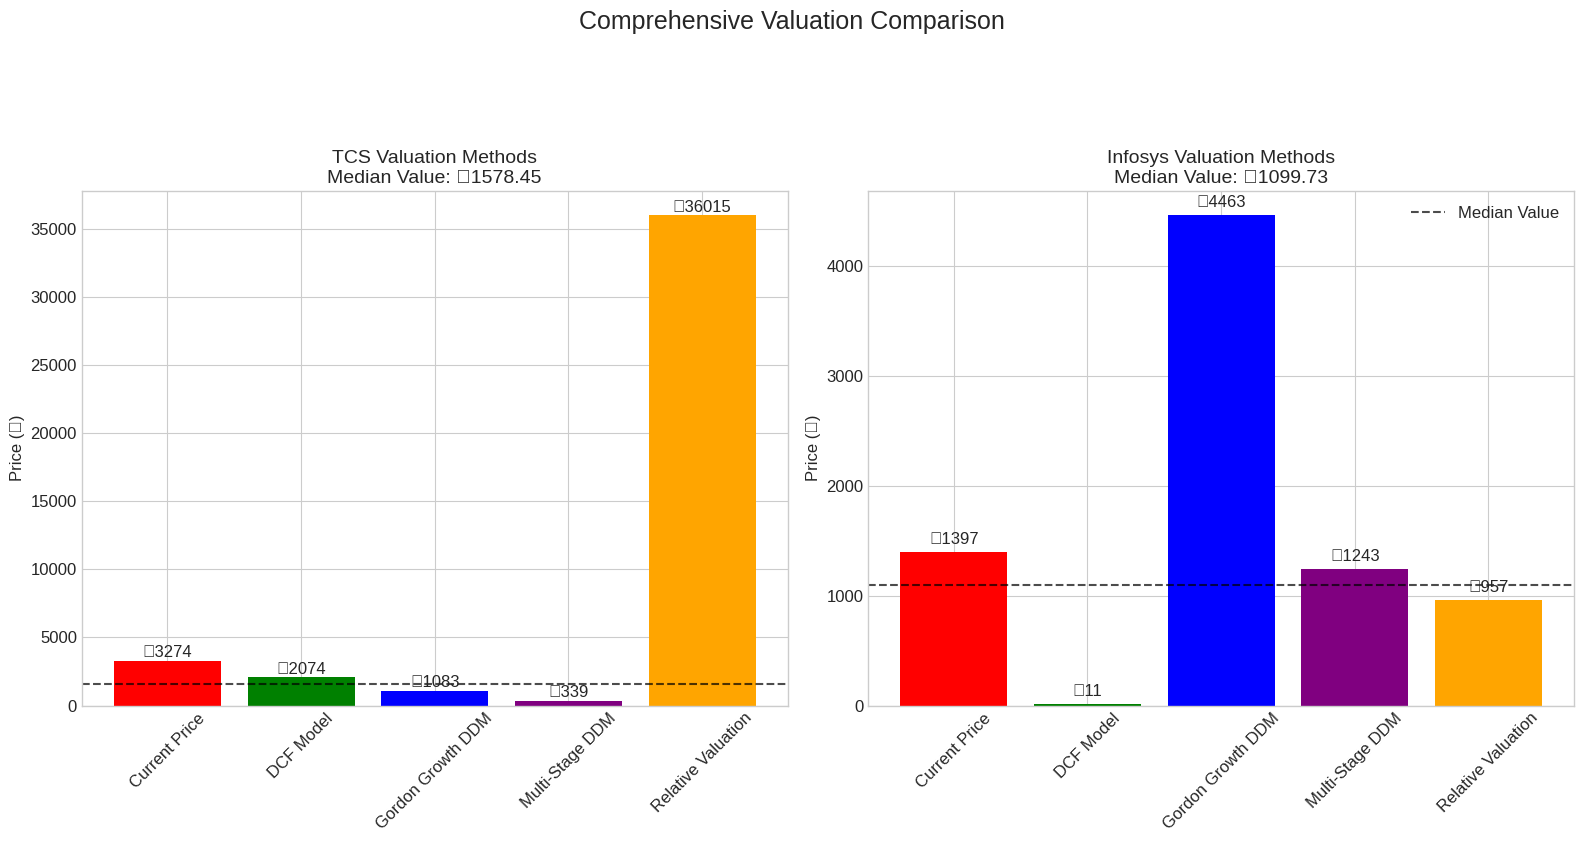

/tmp/ipykernel_10983/3358604069.py:189: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/home/subrahmanya/projects/BOIM/.venv/lib64/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


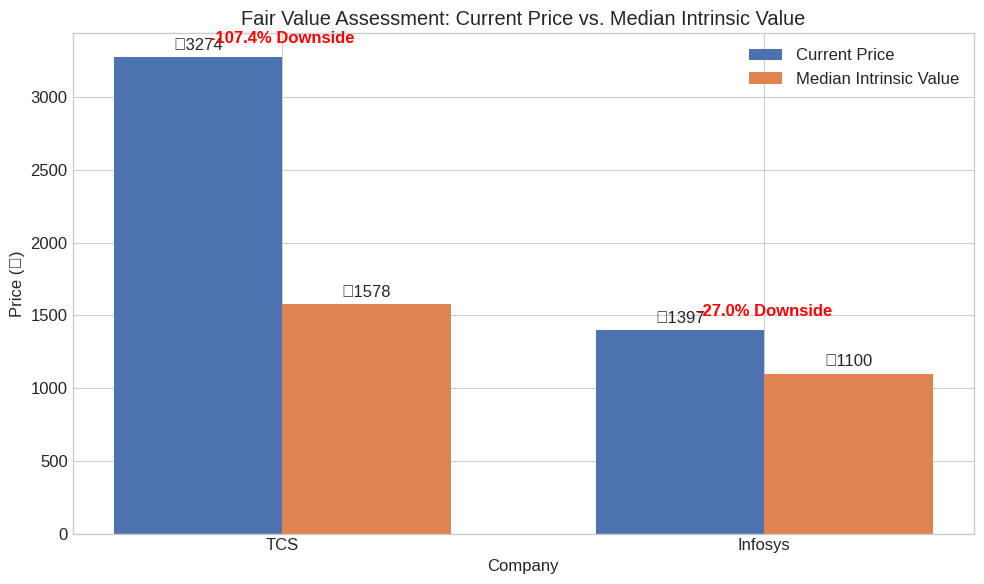

In [52]:
def consolidate_valuations(dcf, ddm_gordon, ddm_multi, relative):
    """
    Consolidate valuation results from multiple methods
    
    Parameters:
    - dcf: DCF valuation result
    - ddm_gordon: Gordon Growth model result
    - ddm_multi: Multi-stage DDM result
    - relative: Relative valuation result
    
    Returns:
    - Dictionary with consolidated results
    """
    company_name = dcf['company_name']
    current_price = dcf['current_price']
    
    # Collect all valuation methods
    methods = {
        'DCF Model': dcf['intrinsic_value'],
        'Gordon Growth DDM': ddm_gordon['intrinsic_value'],
        'Multi-Stage DDM': ddm_multi['intrinsic_value'],
        'Relative Valuation': relative['average_fair_value']
    }
    
    # Filter out None values
    valid_values = {k: v for k, v in methods.items() if v is not None}
    
    # Calculate statistics
    if valid_values:
        min_value = min(valid_values.values())
        max_value = max(valid_values.values())
        avg_value = np.mean(list(valid_values.values()))
        median_value = np.median(list(valid_values.values()))
        
        # Calculate overall margin of safety using the median value
        overall_margin = (median_value - current_price) / median_value * 100
    else:
        min_value = max_value = avg_value = median_value = overall_margin = None
    
    # Assessment based on overall margin of safety
    if overall_margin is not None:
        if overall_margin > 20:
            assessment = "Significantly Undervalued"
        elif overall_margin > 0:
            assessment = "Moderately Undervalued"
        elif overall_margin > -20:
            assessment = "Fairly Valued"
        else:
            assessment = "Potentially Overvalued"
    else:
        assessment = "Unable to determine"
    
    result = {
        'company_name': company_name,
        'current_price': current_price,
        'valuation_methods': methods,
        'min_value': min_value,
        'max_value': max_value,
        'avg_value': avg_value,
        'median_value': median_value,
        'overall_margin': overall_margin,
        'assessment': assessment
    }
    
    return result

# Consolidate valuations with error handling
try:
    print("\nConsolidating Valuation Results...")
    
    tcs_consolidated = consolidate_valuations(
        tcs_dcf, tcs_ddm_gordon, tcs_ddm_multi, tcs_relative)
    
    infy_consolidated = consolidate_valuations(
        infy_dcf, infy_ddm_gordon, infy_ddm_multi, infy_relative)
    
    # Print consolidated valuation results
    print("\nConsolidated Valuation Results:")
    print("=" * 60)
    
    for valuation in [tcs_consolidated, infy_consolidated]:
        print(f"\n{valuation['company_name']} Summary:")
        print(f"Current Market Price: {format_currency(valuation['current_price'])}")
        
        print("\nIntrinsic Values by Method:")
        for method, value in valuation['valuation_methods'].items():
            if value is not None:
                print(f"  {method}: {format_currency(value)}")
        
        print(f"\nRange: {format_currency(valuation['min_value'])} to {format_currency(valuation['max_value'])}")
        print(f"Average Value: {format_currency(valuation['avg_value'])}")
        print(f"Median Value: {format_currency(valuation['median_value'])}")
        print(f"Overall Margin of Safety: {valuation['overall_margin']:.2f}%")
        print(f"Final Assessment: {valuation['assessment']}")
    
    # Create a comparative visualization of all valuation methods
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    fig.suptitle('Comprehensive Valuation Comparison', fontsize=18, y=1.05)
    
    # TCS Valuation Chart
    methods = list(tcs_consolidated['valuation_methods'].keys())
    values = [tcs_consolidated['valuation_methods'][m] for m in methods if tcs_consolidated['valuation_methods'][m] is not None]
    method_labels = [m for m in methods if tcs_consolidated['valuation_methods'][m] is not None]
    
    # Add current price at the beginning
    method_labels.insert(0, 'Current Price')
    values.insert(0, tcs_consolidated['current_price'])
    
    colors = ['red', 'green', 'blue', 'purple', 'orange']
    bars = ax1.bar(method_labels, values, color=colors[:len(values)])
    ax1.set_title(f'TCS Valuation Methods\nMedian Value: {format_currency(tcs_consolidated["median_value"])}', fontsize=14)
    ax1.set_ylabel('Price (₹)', fontsize=12)
    ax1.tick_params(axis='x', rotation=45)
    ax1.axhline(y=tcs_consolidated['median_value'], color='black', linestyle='--', alpha=0.7, label='Median Value')
    
    # Add value labels on TCS bars
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 50,
                f'₹{height:.0f}', ha='center', va='bottom')
    
    # Infosys Valuation Chart
    methods = list(infy_consolidated['valuation_methods'].keys())
    values = [infy_consolidated['valuation_methods'][m] for m in methods if infy_consolidated['valuation_methods'][m] is not None]
    method_labels = [m for m in methods if infy_consolidated['valuation_methods'][m] is not None]
    
    # Add current price at the beginning
    method_labels.insert(0, 'Current Price')
    values.insert(0, infy_consolidated['current_price'])
    
    bars = ax2.bar(method_labels, values, color=colors[:len(values)])
    ax2.set_title(f'Infosys Valuation Methods\nMedian Value: {format_currency(infy_consolidated["median_value"])}', fontsize=14)
    ax2.set_ylabel('Price (₹)', fontsize=12)
    ax2.tick_params(axis='x', rotation=45)
    ax2.axhline(y=infy_consolidated['median_value'], color='black', linestyle='--', alpha=0.7, label='Median Value')
    
    # Add value labels on Infosys bars
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 50,
                f'₹{height:.0f}', ha='center', va='bottom')
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.legend()
    plt.show()
    
    # Create a final comparison chart between TCS and Infosys
    plt.figure(figsize=(10, 6))
    
    companies = ['TCS', 'Infosys']
    current_prices = [tcs_consolidated['current_price'], infy_consolidated['current_price']]
    median_values = [tcs_consolidated['median_value'], infy_consolidated['median_value']]
    margins = [tcs_consolidated['overall_margin'], infy_consolidated['overall_margin']]
    
    x = np.arange(len(companies))
    width = 0.35
    
    plt.bar(x - width/2, current_prices, width, label='Current Price')
    plt.bar(x + width/2, median_values, width, label='Median Intrinsic Value')
    
    plt.xlabel('Company')
    plt.ylabel('Price (₹)')
    plt.title('Fair Value Assessment: Current Price vs. Median Intrinsic Value')
    plt.xticks(x, companies)
    plt.legend()
    
    # Add prices on the bars
    for i, v in enumerate(current_prices):
        plt.text(i - width/2, v + 50, f'₹{v:.0f}', ha='center')
    
    for i, v in enumerate(median_values):
        plt.text(i + width/2, v + 50, f'₹{v:.0f}', ha='center')
    
    # Add margin of safety annotation
    for i, margin in enumerate(margins):
        if margin > 0:
            color = 'green'
            text = f'+{margin:.1f}% Upside'
        else:
            color = 'red'
            text = f'{margin:.1f}% Downside'
        
        plt.annotate(text, 
                     xy=(i, max(current_prices[i], median_values[i]) + 100),
                     ha='center',
                     color=color,
                     fontweight='bold')
    
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Error in consolidating valuations: {e}")

In [53]:
print("\n" + "="*80)
print("COMPREHENSIVE VALUATION CONCLUSION")
print("="*80)

for valuation in [tcs_consolidated, infy_consolidated]:
    print(f"\n{valuation['company_name']}")
    print("-" * len(valuation['company_name']))
    print(f"Current Market Price: {format_currency(valuation['current_price'])}")
    print(f"Median Intrinsic Value: {format_currency(valuation['median_value'])}")
    print(f"Value Range: {format_currency(valuation['min_value'])} to {format_currency(valuation['max_value'])}")
    print(f"Margin of Safety: {valuation['overall_margin']:.2f}%")
    print(f"Assessment: {valuation['assessment']}")
    
    # Detailed explanation
    print("\nKey Insights:")
    
    if valuation['overall_margin'] > 0:
        direction = "undervalued"
        action = "buy"
    elif valuation['overall_margin'] > -10:
        direction = "fairly valued"
        action = "hold"
    else:
        direction = "overvalued"
        action = "consider reducing exposure"
        
    print(f"• Based on multiple valuation methods, {valuation['company_name']} appears to be {direction}.")
    print(f"• The stock shows a {abs(valuation['overall_margin']):.1f}% {'upside potential' if valuation['overall_margin'] > 0 else 'downside risk'}.")
    print(f"• Investment suggestion: {action.upper()} at current price levels.")
    
    # Method comparison
    method_margins = {}
    for method, value in valuation['valuation_methods'].items():
        if value is not None:
            method_margin = (value - valuation['current_price']) / value * 100
            method_margins[method] = method_margin
    
    if method_margins:
        most_conservative = min(method_margins.items(), key=lambda x: x[1])
        most_optimistic = max(method_margins.items(), key=lambda x: x[1])
        
        print(f"• Most conservative estimate: {most_conservative[0]} ({most_conservative[1]:.1f}% {'upside' if most_conservative[1] > 0 else 'downside'})")
        print(f"• Most optimistic estimate: {most_optimistic[0]} ({most_optimistic[1]:.1f}% {'upside' if most_optimistic[1] > 0 else 'downside'})")

print("\nComparative Analysis:")
tcs_margin = tcs_consolidated['overall_margin']
infy_margin = infy_consolidated['overall_margin']

if tcs_margin > infy_margin:
    better_value = "TCS"
    margin_diff = tcs_margin - infy_margin
else:
    better_value = "Infosys"
    margin_diff = infy_margin - tcs_margin

print(f"• {better_value} presents better value with a {margin_diff:.1f}% more favorable margin of safety.")
print("• Both companies are established IT services leaders with strong financials.")
print("• Consider company-specific factors beyond valuation, such as growth trajectory,")
print("  international exposure, digital capabilities, and management quality.")

print("\nDisclaimer: This valuation represents an estimate based on available financial data and assumptions.")
print("Investment decisions should incorporate additional qualitative factors and personal financial goals.")


COMPREHENSIVE VALUATION CONCLUSION

TCS
---
Current Market Price: ₹3274.05
Median Intrinsic Value: ₹1578.45
Value Range: ₹338.56 to ₹36015.37
Margin of Safety: -107.42%
Assessment: Potentially Overvalued

Key Insights:
• Based on multiple valuation methods, TCS appears to be overvalued.
• The stock shows a 107.4% downside risk.
• Investment suggestion: CONSIDER REDUCING EXPOSURE at current price levels.
• Most conservative estimate: Multi-Stage DDM (-867.0% downside)
• Most optimistic estimate: Relative Valuation (90.9% upside)

Infosys
-------
Current Market Price: ₹1396.75
Median Intrinsic Value: ₹1099.73
Value Range: ₹11.46 to ₹4463.47
Margin of Safety: -27.01%
Assessment: Potentially Overvalued

Key Insights:
• Based on multiple valuation methods, Infosys appears to be overvalued.
• The stock shows a 27.0% downside risk.
• Investment suggestion: CONSIDER REDUCING EXPOSURE at current price levels.
• Most conservative estimate: DCF Model (-12093.1% downside)
• Most optimistic estima